# Crime in Toronto: Visualizations by Year, Month, Area & Offence Counts

## Dataframe Collection & Reading

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
#Study data files
assault_metadata_path = "Assault_Open_Data.csv"
break_and_enter_metadata_path = "Break_and_Enter_Open_Data.csv"
robbery_metadata_path = "Robbery_Open_Data.csv"
theft_over_open_metadata_path = "Theft_Over_Open_Data.csv"

In [4]:
#Read data files
assault_metadata = pd.read_csv(assault_metadata_path)
break_and_enter_metadata = pd.read_csv(break_and_enter_metadata_path)
robbery_metadata = pd.read_csv(robbery_metadata_path)
theft_over_open_metadata = pd.read_csv(theft_over_open_metadata_path)

In [5]:
assault_metadata.head(10)

X          Y  OBJECTID EVENT_UNIQUE_ID             REPORT_DATE  \
0 -79.425896  43.757346         1  GO-20141262074  2014/01/01 05:00:00+00   
1 -79.376497  43.666423         2  GO-20141260889  2014/01/01 05:00:00+00   
2 -79.344839  43.678946         3  GO-20141261050  2014/01/01 05:00:00+00   
3 -79.391841  43.646639         4  GO-20141259344  2014/01/01 05:00:00+00   
4 -85.488744   0.000000         5  GO-20141260537  2014/01/01 05:00:00+00   
5 -79.416594  43.654753         6  GO-20141260618  2014/01/01 05:00:00+00   
6 -79.391279  43.671127         7  GO-20141260056  2014/01/01 05:00:00+00   
7 -79.345795  43.703684         8  GO-20141259834  2014/01/01 05:00:00+00   
8 -79.132919  43.780412         9  GO-20141260264  2014/01/01 05:00:00+00   
9 -79.455586  43.677308        10  GO-20141260715  2014/01/01 05:00:00+00   

                 OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  \
0  1998/06/01 04:00:00+00         2014      January           1           1   
1  2014/01/01 05:00:00+00         2014      January           1           1   
2  2014/01/01 05:00:00+00         2014      January           1           1   
3  2014/01/01 05:00:00+00         2014      January           1           1   
4  2014/01/01 05:00:00+00         2014      January           1           1   
5  2014/01/01 05:00:00+00         2014      January           1           1   
6  2014/01/01 05:00:00+00         2014      January           1           1   
7  2014/01/01 05:00:00+00         2014      January           1           1   
8  2014/01/01 05:00:00+00         2014      January           1           1   
9  2014/01/01 05:00:00+00         2014      January           1           1   

   ... UCR_CODE  UCR_EXT                      OFFENCE MCI_CATEGORY  HOOD_158  \
0  ...     1480      110  Administering Noxious Thing      Assault        38   
1  ...     1430      100                      Assault      Assault        74   
2  ...     1430      100                      Assault      Assault        69   
3  ...     1420      110          Assault Bodily Harm      Assault       164   
4  ...     1430      100                      Assault      Assault       NSA   
5  ...     1430      100                      Assault      Assault        81   
6  ...     1430      100                      Assault      Assault        95   
7  ...     1420      100          Assault With Weapon      Assault        55   
8  ...     1430      100                      Assault      Assault       143   
9  ...     1430      100                      Assault      Assault        92   

        NEIGHBOURHOOD_158 HOOD_140                       NEIGHBOURHOOD_140  \
0        Lansing-Westgate       38                   Lansing-Westgate (38)   
1     North St.James Town       74                North St.James Town (74)   
2             Blake-Jones       66                           Danforth (66)   
3        Wellington Place       77  Waterfront Communities-The Island (77)   
4                     NSA      NSA                                     NSA   
5       Trinity-Bellwoods       81                  Trinity-Bellwoods (81)   
6                   Annex       95                              Annex (95)   
7        Thorncliffe Park       55                   Thorncliffe Park (55)   
8              West Rouge      131                             Rouge (131)   
9  Corso Italia-Davenport       92             Corso Italia-Davenport (92)   

  LONG_WGS84  LAT_WGS84  
0 -79.425896  43.757346  
1 -79.376497  43.666423  
2 -79.344839  43.678946  
3 -79.391841  43.646639  
4 -85.488744   0.000000  
5 -79.416594  43.654753  
6 -79.391279  43.671127  
7 -79.345795  43.703684  
8 -79.132919  43.780412  
9 -79.455586  43.677308  

[10 rows x 31 columns]

In [6]:
break_and_enter_metadata.head(10)

X          Y  OBJECTID EVENT_UNIQUE_ID             REPORT_DATE  \
0 -79.350229  43.646293         1  GO-20141260701  2014/01/01 05:00:00+00   
1 -79.281075  43.765796         2  GO-20141260233  2014/01/01 05:00:00+00   
2 -79.174033  43.761393         3  GO-20141260831  2014/01/01 05:00:00+00   
3 -79.413387  43.650800         4  GO-20141260521  2014/01/01 05:00:00+00   
4 -79.421673  43.792324         5  GO-20141261478  2014/01/01 05:00:00+00   
5 -79.437919  43.640327         6  GO-20141261592  2014/01/01 05:00:00+00   
6 -79.308987  43.708674         7  GO-20141261949  2014/01/01 05:00:00+00   
7 -79.383026  43.646599         8  GO-20141262372  2014/01/01 05:00:00+00   
8 -79.251924  43.705310         9  GO-20141262997  2014/01/01 05:00:00+00   
9 -79.414575  43.771698        10  GO-20141263143  2014/01/01 05:00:00+00   

                 OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  \
0  2014/01/01 05:00:00+00         2014      January           1           1   
1  2014/01/01 05:00:00+00         2014      January           1           1   
2  2014/01/01 05:00:00+00         2014      January           1           1   
3  2014/01/01 05:00:00+00         2014      January           1           1   
4  2014/01/01 05:00:00+00         2014      January           1           1   
5  2014/01/01 05:00:00+00         2014      January           1           1   
6  2014/01/01 05:00:00+00         2014      January           1           1   
7  2014/01/01 05:00:00+00         2014      January           1           1   
8  2014/01/01 05:00:00+00         2014      January           1           1   
9  2014/01/01 05:00:00+00         2014      January           1           1   

   ... UCR_CODE  UCR_EXT                       OFFENCE     MCI_CATEGORY  \
0  ...     2120      200                           B&E  Break and Enter   
1  ...     2120      220                  B&E W'Intent  Break and Enter   
2  ...     2120      220                  B&E W'Intent  Break and Enter   
3  ...     2120      200                           B&E  Break and Enter   
4  ...     2120      200                           B&E  Break and Enter   
5  ...     2120      220                  B&E W'Intent  Break and Enter   
6  ...     2120      220                  B&E W'Intent  Break and Enter   
7  ...     2120      200                           B&E  Break and Enter   
8  ...     2120      200                           B&E  Break and Enter   
9  ...     2120      210  Unlawfully In Dwelling-House  Break and Enter   

   HOOD_158      NEIGHBOURHOOD_158 HOOD_140            NEIGHBOURHOOD_140  \
0        70        South Riverdale       70         South Riverdale (70)   
1       126            Dorset Park      126            Dorset Park (126)   
2       136              West Hill      136              West Hill (136)   
3        81      Trinity-Bellwoods       81       Trinity-Bellwoods (81)   
4        36       Newtonbrook West       36        Newtonbrook West (36)   
5        85         South Parkdale       85          South Parkdale (85)   
6        54      O'Connor-Parkview       54       O'Connor-Parkview (54)   
7       170     Yonge-Bay Corridor       76     Bay Street Corridor (76)   
8       122  Birchcliffe-Cliffside      122  Birchcliffe-Cliffside (122)   
9        37        Willowdale West       37         Willowdale West (37)   

  LONG_WGS84  LAT_WGS84  
0 -79.350229  43.646293  
1 -79.281075  43.765796  
2 -79.174033  43.761393  
3 -79.413387  43.650800  
4 -79.421673  43.792324  
5 -79.437919  43.640327  
6 -79.308987  43.708674  
7 -79.383026  43.646599  
8 -79.251924  43.705310  
9 -79.414575  43.771698  

[10 rows x 31 columns]

In [7]:
robbery_metadata.head(10)

X          Y  OBJECTID EVENT_UNIQUE_ID             REPORT_DATE  \
0 -85.488744   0.000000         1  GO-20141260577  2014/01/01 05:00:00+00   
1 -79.401998  43.647607         2  GO-20141260912  2014/01/01 05:00:00+00   
2 -79.516198  43.700152         3  GO-20141262644  2014/01/01 05:00:00+00   
3 -79.384154  43.663898         4  GO-20141262818  2014/01/01 05:00:00+00   
4 -85.488744   0.000000         5  GO-20141260577  2014/01/01 05:00:00+00   
5 -79.298604  43.722856         6  GO-20141266749  2014/01/02 05:00:00+00   
6 -79.302263  43.769472         7  GO-20141265410  2014/01/02 05:00:00+00   
7 -79.343719  43.775829         8  GO-20141270022  2014/01/02 05:00:00+00   
8 -85.488744   0.000000         9  GO-20141270511  2014/01/02 05:00:00+00   
9 -79.216861  43.803875        10  GO-20141269818  2014/01/02 05:00:00+00   

                 OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  \
0  2014/01/01 05:00:00+00         2014      January           1           1   
1  2014/01/01 05:00:00+00         2014      January           1           1   
2  2014/01/01 05:00:00+00         2014      January           1           1   
3  2014/01/01 05:00:00+00         2014      January           1           1   
4  2014/01/01 05:00:00+00         2014      January           1           1   
5  2014/01/02 05:00:00+00         2014      January           2           2   
6  2013/12/31 05:00:00+00         2014      January           2           2   
7  2014/01/02 05:00:00+00         2014      January           2           2   
8  2014/01/02 05:00:00+00         2014      January           2           2   
9  2014/01/02 05:00:00+00         2014      January           2           2   

   ... UCR_CODE  UCR_EXT                 OFFENCE MCI_CATEGORY  HOOD_158  \
0  ...     1610      200       Robbery - Mugging      Robbery       NSA   
1  ...     1610      100     Robbery With Weapon      Robbery       164   
2  ...     1610      150  Robbery - Purse Snatch      Robbery       113   
3  ...     1610      210      Robbery - Business      Robbery       167   
4  ...     1610      180      Robbery - Swarming      Robbery       NSA   
5  ...     1610      100     Robbery With Weapon      Robbery       120   
6  ...     1610      200       Robbery - Mugging      Robbery       119   
7  ...     1610      150  Robbery - Purse Snatch      Robbery        47   
8  ...     1610      220         Robbery - Other      Robbery       NSA   
9  ...     1610      180      Robbery - Swarming      Robbery       146   

     NEIGHBOURHOOD_158 HOOD_140           NEIGHBOURHOOD_140 LONG_WGS84  \
0                  NSA      NSA                         NSA -85.488744   
1     Wellington Place       78   Kensington-Chinatown (78) -79.401998   
2               Weston      113                Weston (113) -79.516198   
3     Church-Wellesley       75  Church-Yonge Corridor (75) -79.384154   
4                  NSA      NSA                         NSA -85.488744   
5  Clairlea-Birchmount      120   Clairlea-Birchmount (120) -79.298604   
6     Wexford/Maryvale      119      Wexford/Maryvale (119) -79.302263   
7   Don Valley Village       47     Don Valley Village (47) -79.343719   
8                  NSA      NSA                         NSA -85.488744   
9         Malvern East      132               Malvern (132) -79.216861   

   LAT_WGS84  
0   0.000000  
1  43.647607  
2  43.700152  
3  43.663898  
4   0.000000  
5  43.722856  
6  43.769472  
7  43.775829  
8   0.000000  
9  43.803875  

[10 rows x 31 columns]

In [8]:
theft_over_open_metadata.head(10)

X          Y  OBJECTID EVENT_UNIQUE_ID             REPORT_DATE  \
0 -85.488744   0.000000         1  GO-20141260973  2014/01/01 05:00:00+00   
1 -79.259170  43.778438         2  GO-20141264862  2014/01/01 05:00:00+00   
2 -79.414381  43.775151         3  GO-20141267602  2014/01/02 05:00:00+00   
3 -79.342167  43.666153         4  GO-20141269604  2014/01/02 05:00:00+00   
4 -79.343719  43.775829         5  GO-20141270156  2014/01/02 05:00:00+00   
5 -79.419964  43.654116         6  GO-20141275836  2014/01/03 05:00:00+00   
6 -79.382421  43.651755         7  GO-20141274610  2014/01/03 05:00:00+00   
7 -79.345795  43.703684         8  GO-20141276966  2014/01/03 05:00:00+00   
8 -79.419964  43.654116         9  GO-20141277440  2014/01/04 05:00:00+00   
9 -79.272635  43.806687        10  GO-20141279197  2014/01/04 05:00:00+00   

                 OCC_DATE  REPORT_YEAR REPORT_MONTH  REPORT_DAY  REPORT_DOY  \
0  2014/01/01 05:00:00+00         2014      January           1           1   
1  2014/01/01 05:00:00+00         2014      January           1           1   
2  2013/12/24 05:00:00+00         2014      January           2           2   
3  2014/01/02 05:00:00+00         2014      January           2           2   
4  2014/01/02 05:00:00+00         2014      January           2           2   
5  2013/12/31 05:00:00+00         2014      January           3           3   
6  2014/01/03 05:00:00+00         2014      January           3           3   
7  2014/01/03 05:00:00+00         2014      January           3           3   
8  2014/01/01 05:00:00+00         2014      January           4           4   
9  2014/01/03 05:00:00+00         2014      January           4           4   

   ... UCR_CODE  UCR_EXT                        OFFENCE MCI_CATEGORY  \
0  ...     2130      210                     Theft Over   Theft Over   
1  ...     2130      210                     Theft Over   Theft Over   
2  ...     2130      210                     Theft Over   Theft Over   
3  ...     2130      210                     Theft Over   Theft Over   
4  ...     2130      210                     Theft Over   Theft Over   
5  ...     2132      200  Theft From Motor Vehicle Over   Theft Over   
6  ...     2130      210                     Theft Over   Theft Over   
7  ...     2130      210                     Theft Over   Theft Over   
8  ...     2132      200  Theft From Motor Vehicle Over   Theft Over   
9  ...     2132      200  Theft From Motor Vehicle Over   Theft Over   

   HOOD_158    NEIGHBOURHOOD_158 HOOD_140         NEIGHBOURHOOD_140  \
0       NSA                  NSA      NSA                       NSA   
1       156  Bendale-Glen Andrew      127             Bendale (127)   
2       151          Yonge-Doris       51      Willowdale East (51)   
3        70      South Riverdale       70      South Riverdale (70)   
4        47   Don Valley Village       47   Don Valley Village (47)   
5        81    Trinity-Bellwoods       81    Trinity-Bellwoods (81)   
6       170   Yonge-Bay Corridor       76  Bay Street Corridor (76)   
7        55     Thorncliffe Park       55     Thorncliffe Park (55)   
8        81    Trinity-Bellwoods       81    Trinity-Bellwoods (81)   
9       129      Agincourt North      129     Agincourt North (129)   

  LONG_WGS84  LAT_WGS84  
0 -85.488744   0.000000  
1 -79.259170  43.778438  
2 -79.414381  43.775151  
3 -79.342167  43.666153  
4 -79.343719  43.775829  
5 -79.419964  43.654116  
6 -79.382421  43.651755  
7 -79.345795  43.703684  
8 -79.419964  43.654116  
9 -79.272635  43.806687  

[10 rows x 31 columns]

## Assault Visualizations

In [9]:
# Generate a bar plot showing the total number of assaults by offence type
offence_count = assault_metadata["OFFENCE"].value_counts()
offence_count

Assault                           118353
Assault With Weapon                29267
Assault Bodily Harm                 7544
Assault Peace Officer               5510
Assault - Resist/ Prevent Seiz      3115
Aggravated Assault                  2637
Discharge Firearm With Intent       2082
Discharge Firearm - Recklessly      1514
Pointing A Firearm                  1173
Assault Peace Officer Wpn/Cbh        636
Administering Noxious Thing          506
Assault - Force/Thrt/Impede          391
Use Firearm / Immit Commit Off       192
Disarming Peace/Public Officer       122
Crim Negligence Bodily Harm          106
Air Gun Or Pistol: Bodily Harm        27
Aggravated Aslt Peace Officer         26
Aggravated Assault Avails Pros        19
Unlawfully Causing Bodily Harm        13
Traps Likely Cause Bodily Harm         2
Set/Place Trap/Intend Death/Bh         2
Hoax Terrorism Causing Bodily          1
Name: OFFENCE, dtype: int64

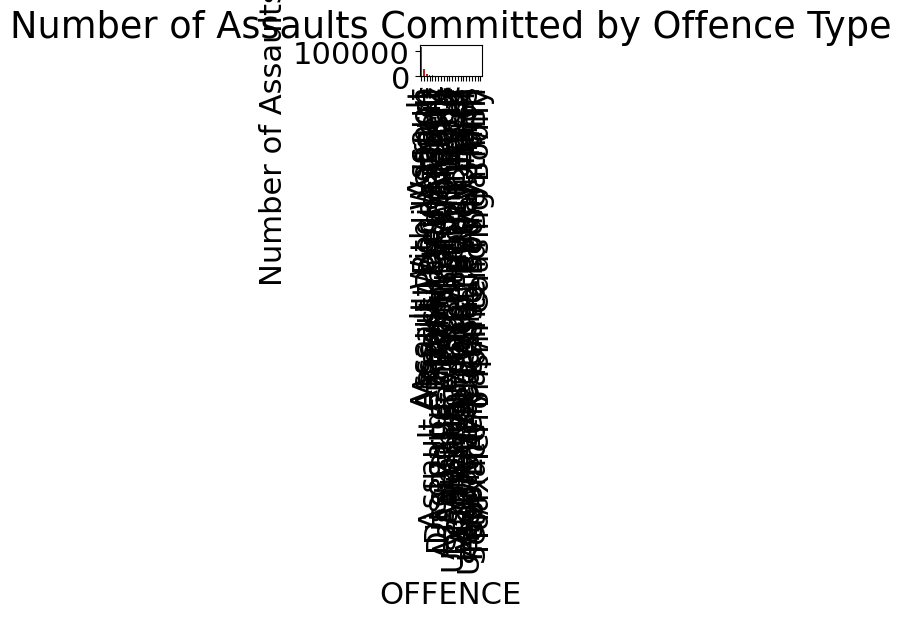

In [14]:
plot_pandas1 = offence_count.plot.bar(color='firebrick')  
plt.xlabel("OFFENCE")
plt.ylabel("Number of Assaults (by type)")
plt.title("Number of Assaults Committed by Offence Type")
plt.rcParams["figure.figsize"] = (0.8, 0.4)
plt.rcParams.update({'font.size': 22})

In [15]:
# Generate a bar plot showing the total number of general assaults by month
offence_by_month_count = assault_metadata["REPORT_MONTH"].value_counts()
offence_by_month_count

July         15861
August       15603
June         15454
May          15378
October      15013
September    14976
November     14620
December     13849
March        13781
April        13531
January      12816
February     12356
Name: REPORT_MONTH, dtype: int64

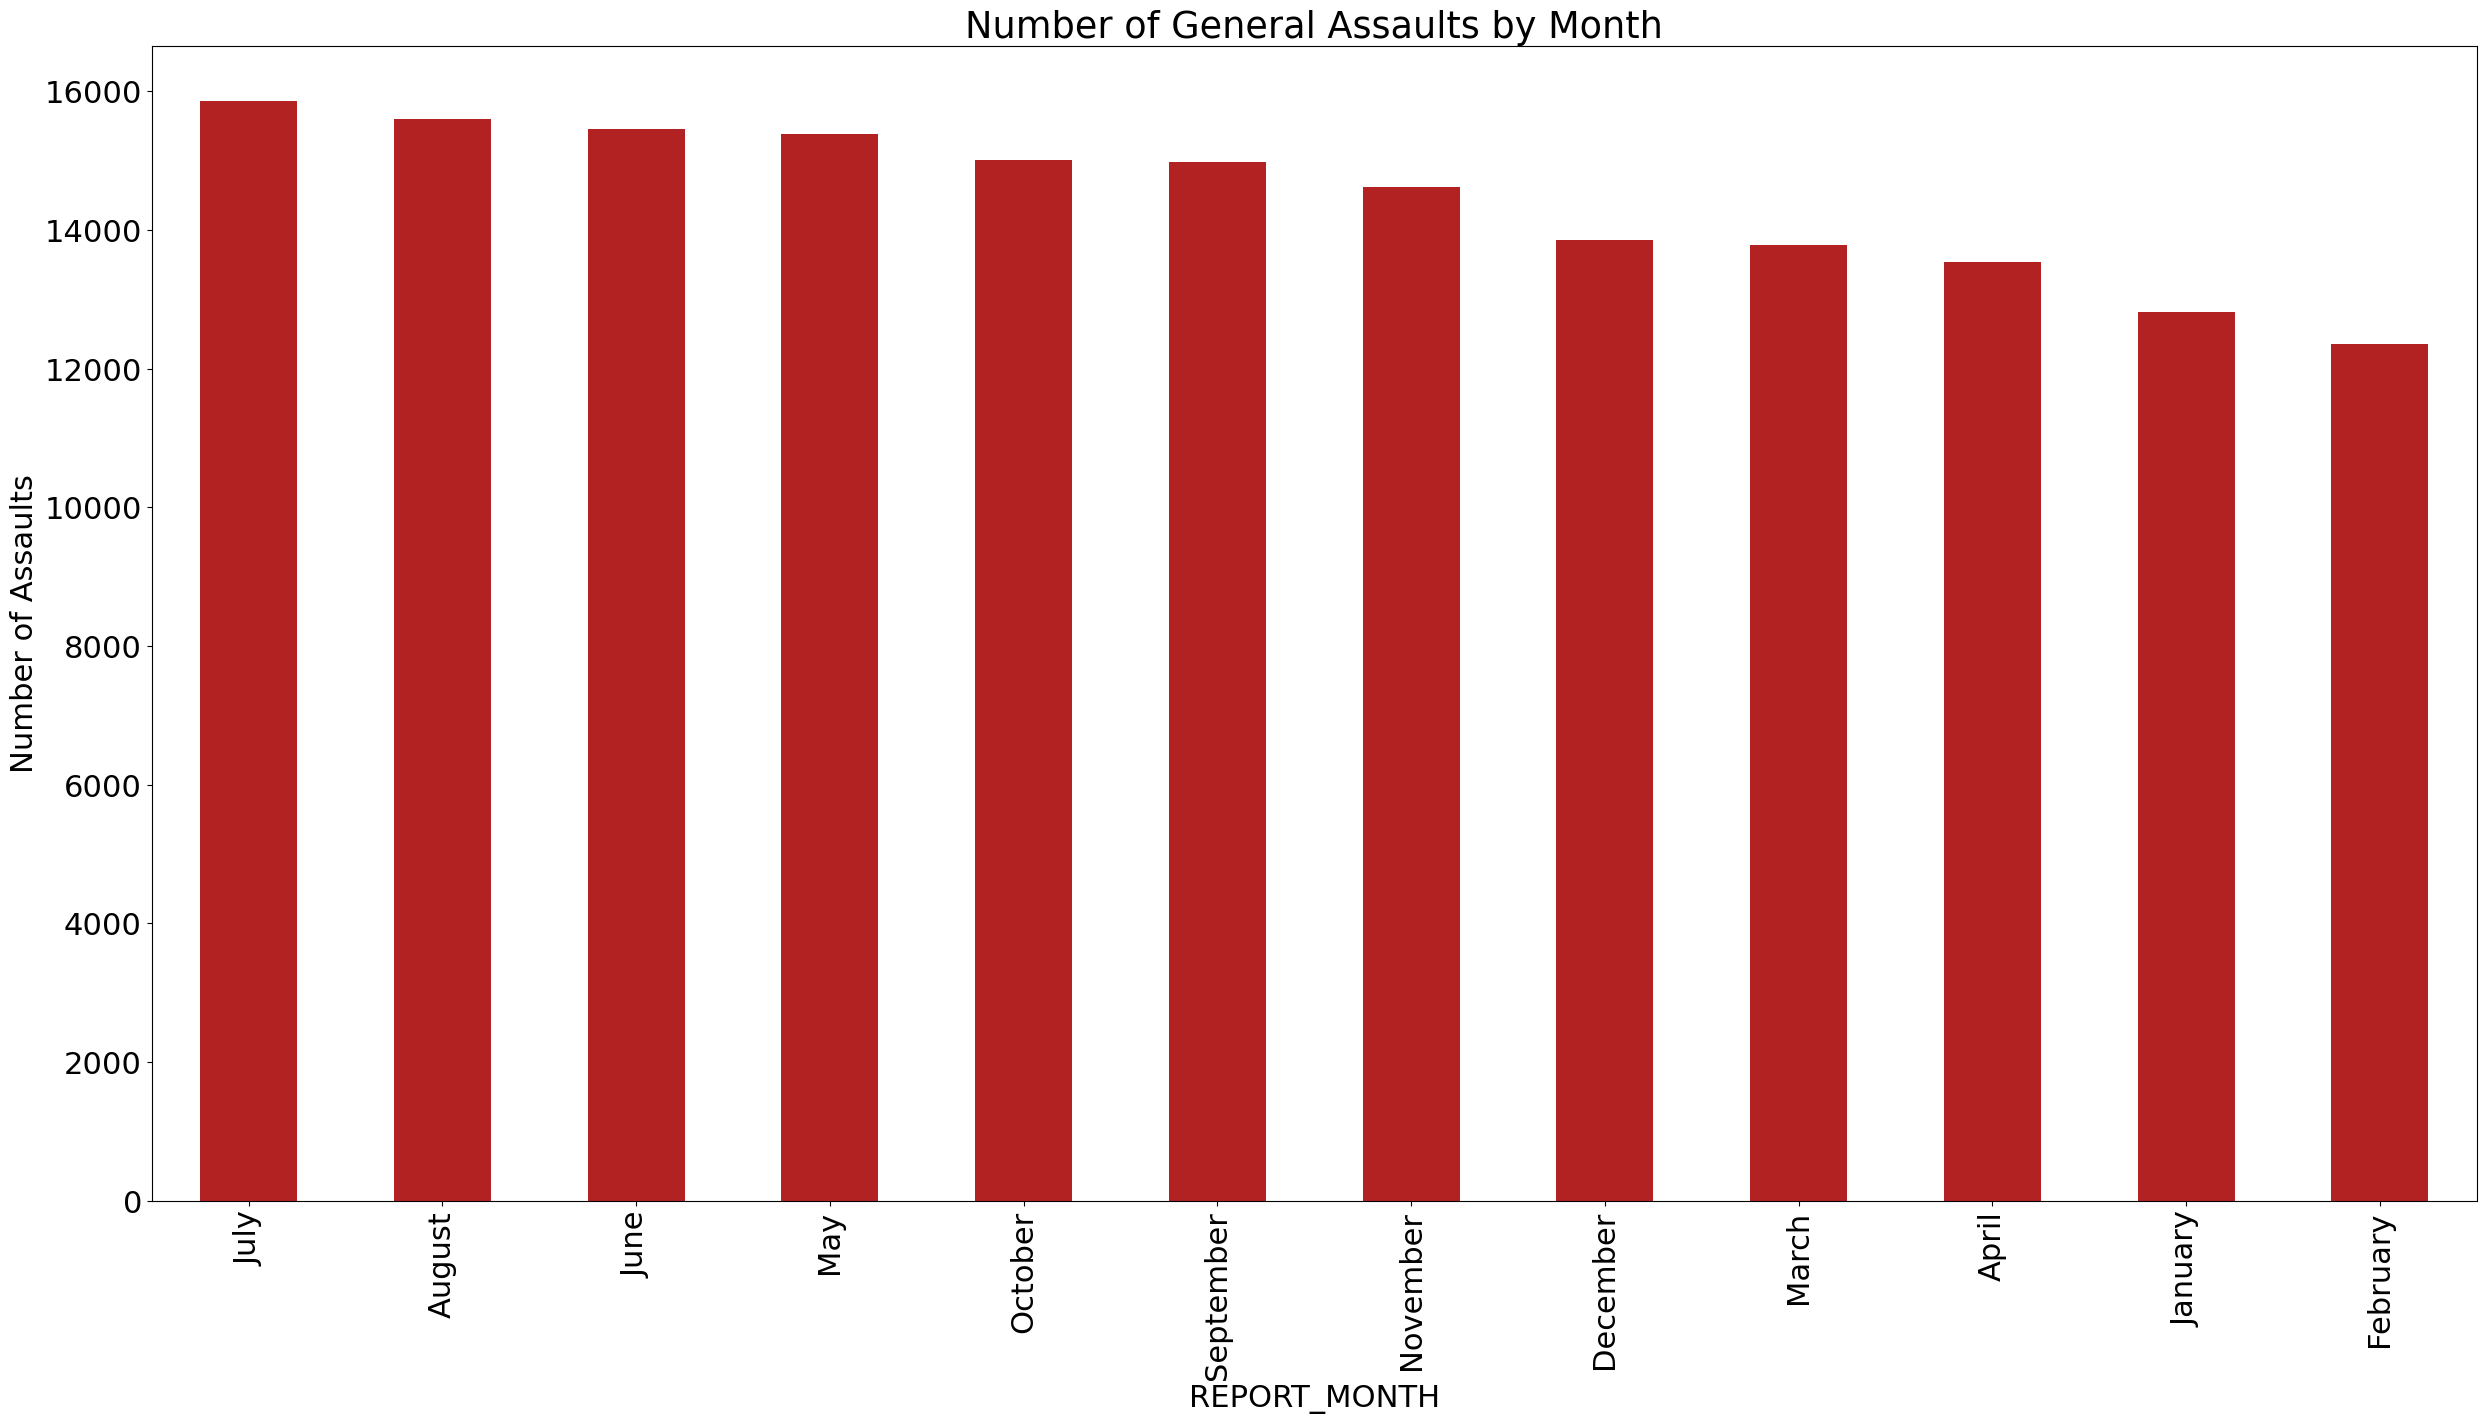

In [17]:
plot_pandas2 = offence_by_month_count.plot.bar(color='firebrick')  
plt.xlabel("REPORT_MONTH")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Month")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [18]:
# Generate a bar plot showing the total number of general assaults by year
offence_by_year_count = assault_metadata["REPORT_YEAR"].value_counts()
offence_by_year_count

2022    21394
2019    21093
2018    19925
2021    19383
2017    19299
2016    18919
2020    18322
2015    18079
2014    16824
Name: REPORT_YEAR, dtype: int64

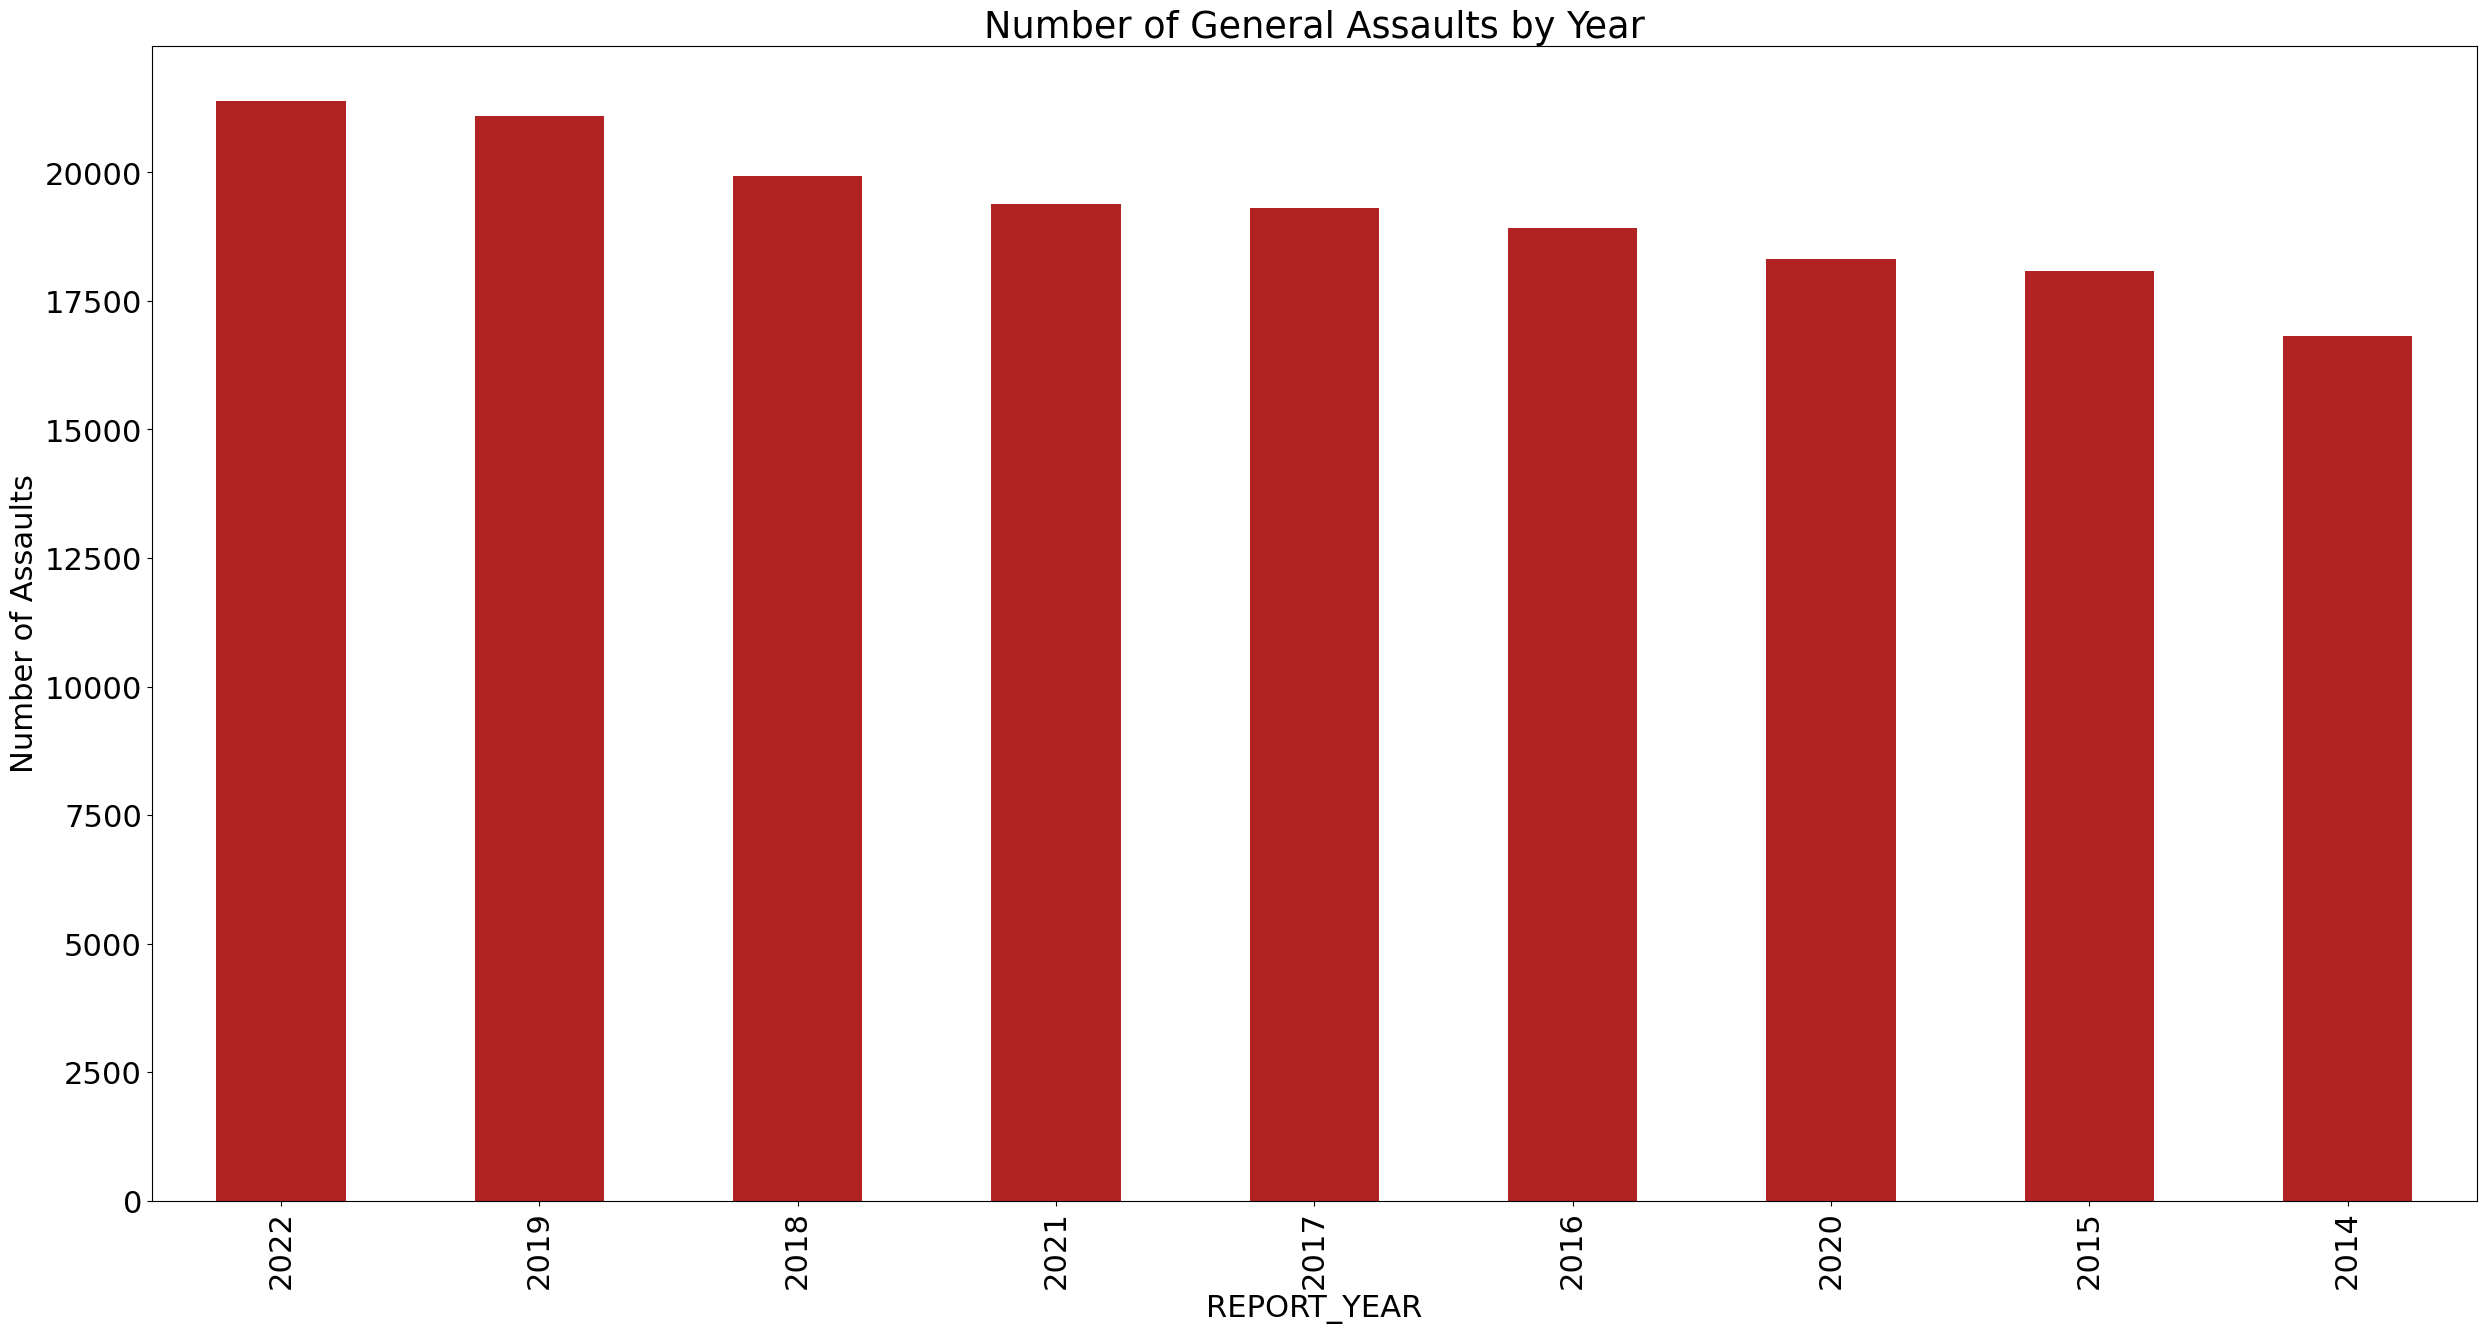

In [19]:
plot_pandas3 = offence_by_year_count.plot.bar(color='firebrick')  
plt.xlabel("REPORT_YEAR")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Year")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [20]:
# Generate a bar plot showing the total number of general assaults by Neighbourhood Code
offence_by_hood_count = assault_metadata["NEIGHBOURHOOD_140"].value_counts()
offence_by_hood_count

Waterfront Communities-The Island (77)    7900
Church-Yonge Corridor (75)                7168
Bay Street Corridor (76)                  5532
Moss Park (73)                            4755
Kensington-Chinatown (78)                 3676
                                          ... 
Kingsway South (15)                        241
Markland Wood (12)                         225
Princess-Rosethorn (10)                    211
Lawrence Park South (103)                  205
Forest Hill South (101)                    180
Name: NEIGHBOURHOOD_140, Length: 141, dtype: int64

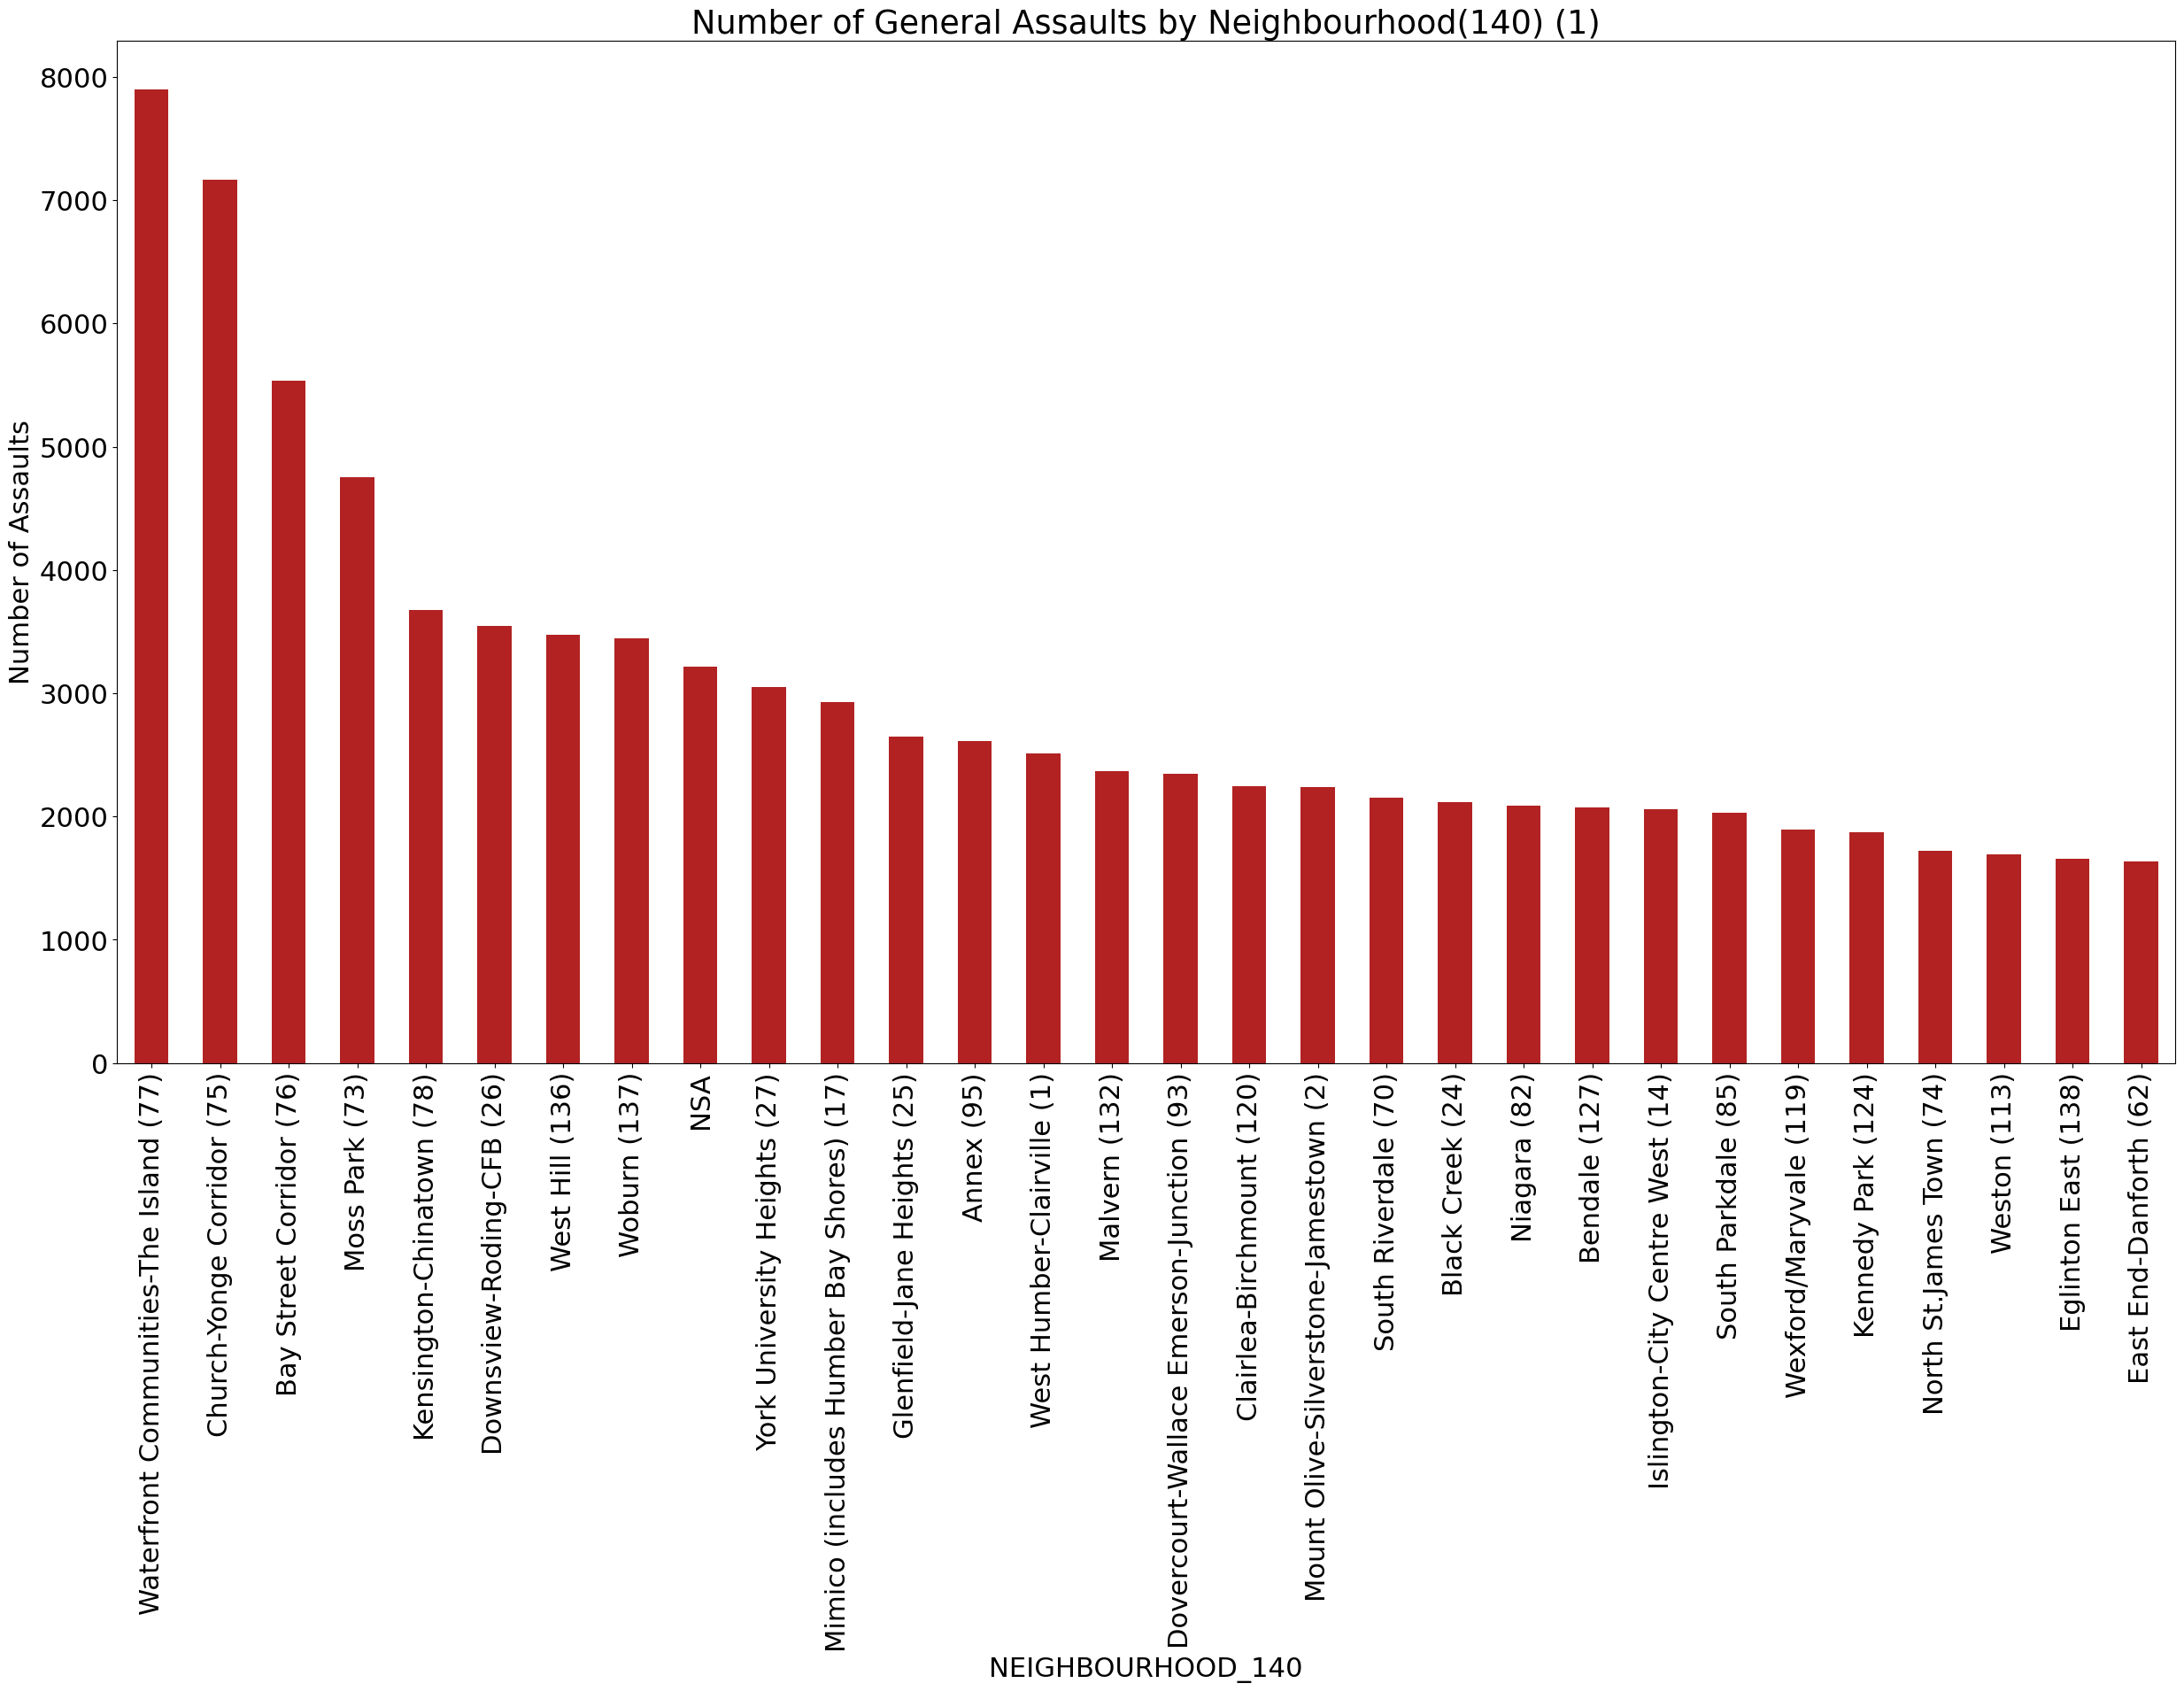

In [21]:
plot_pandas4 = offence_by_hood_count[0:30].plot.bar(color='firebrick')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Neighbourhood(140) (1)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

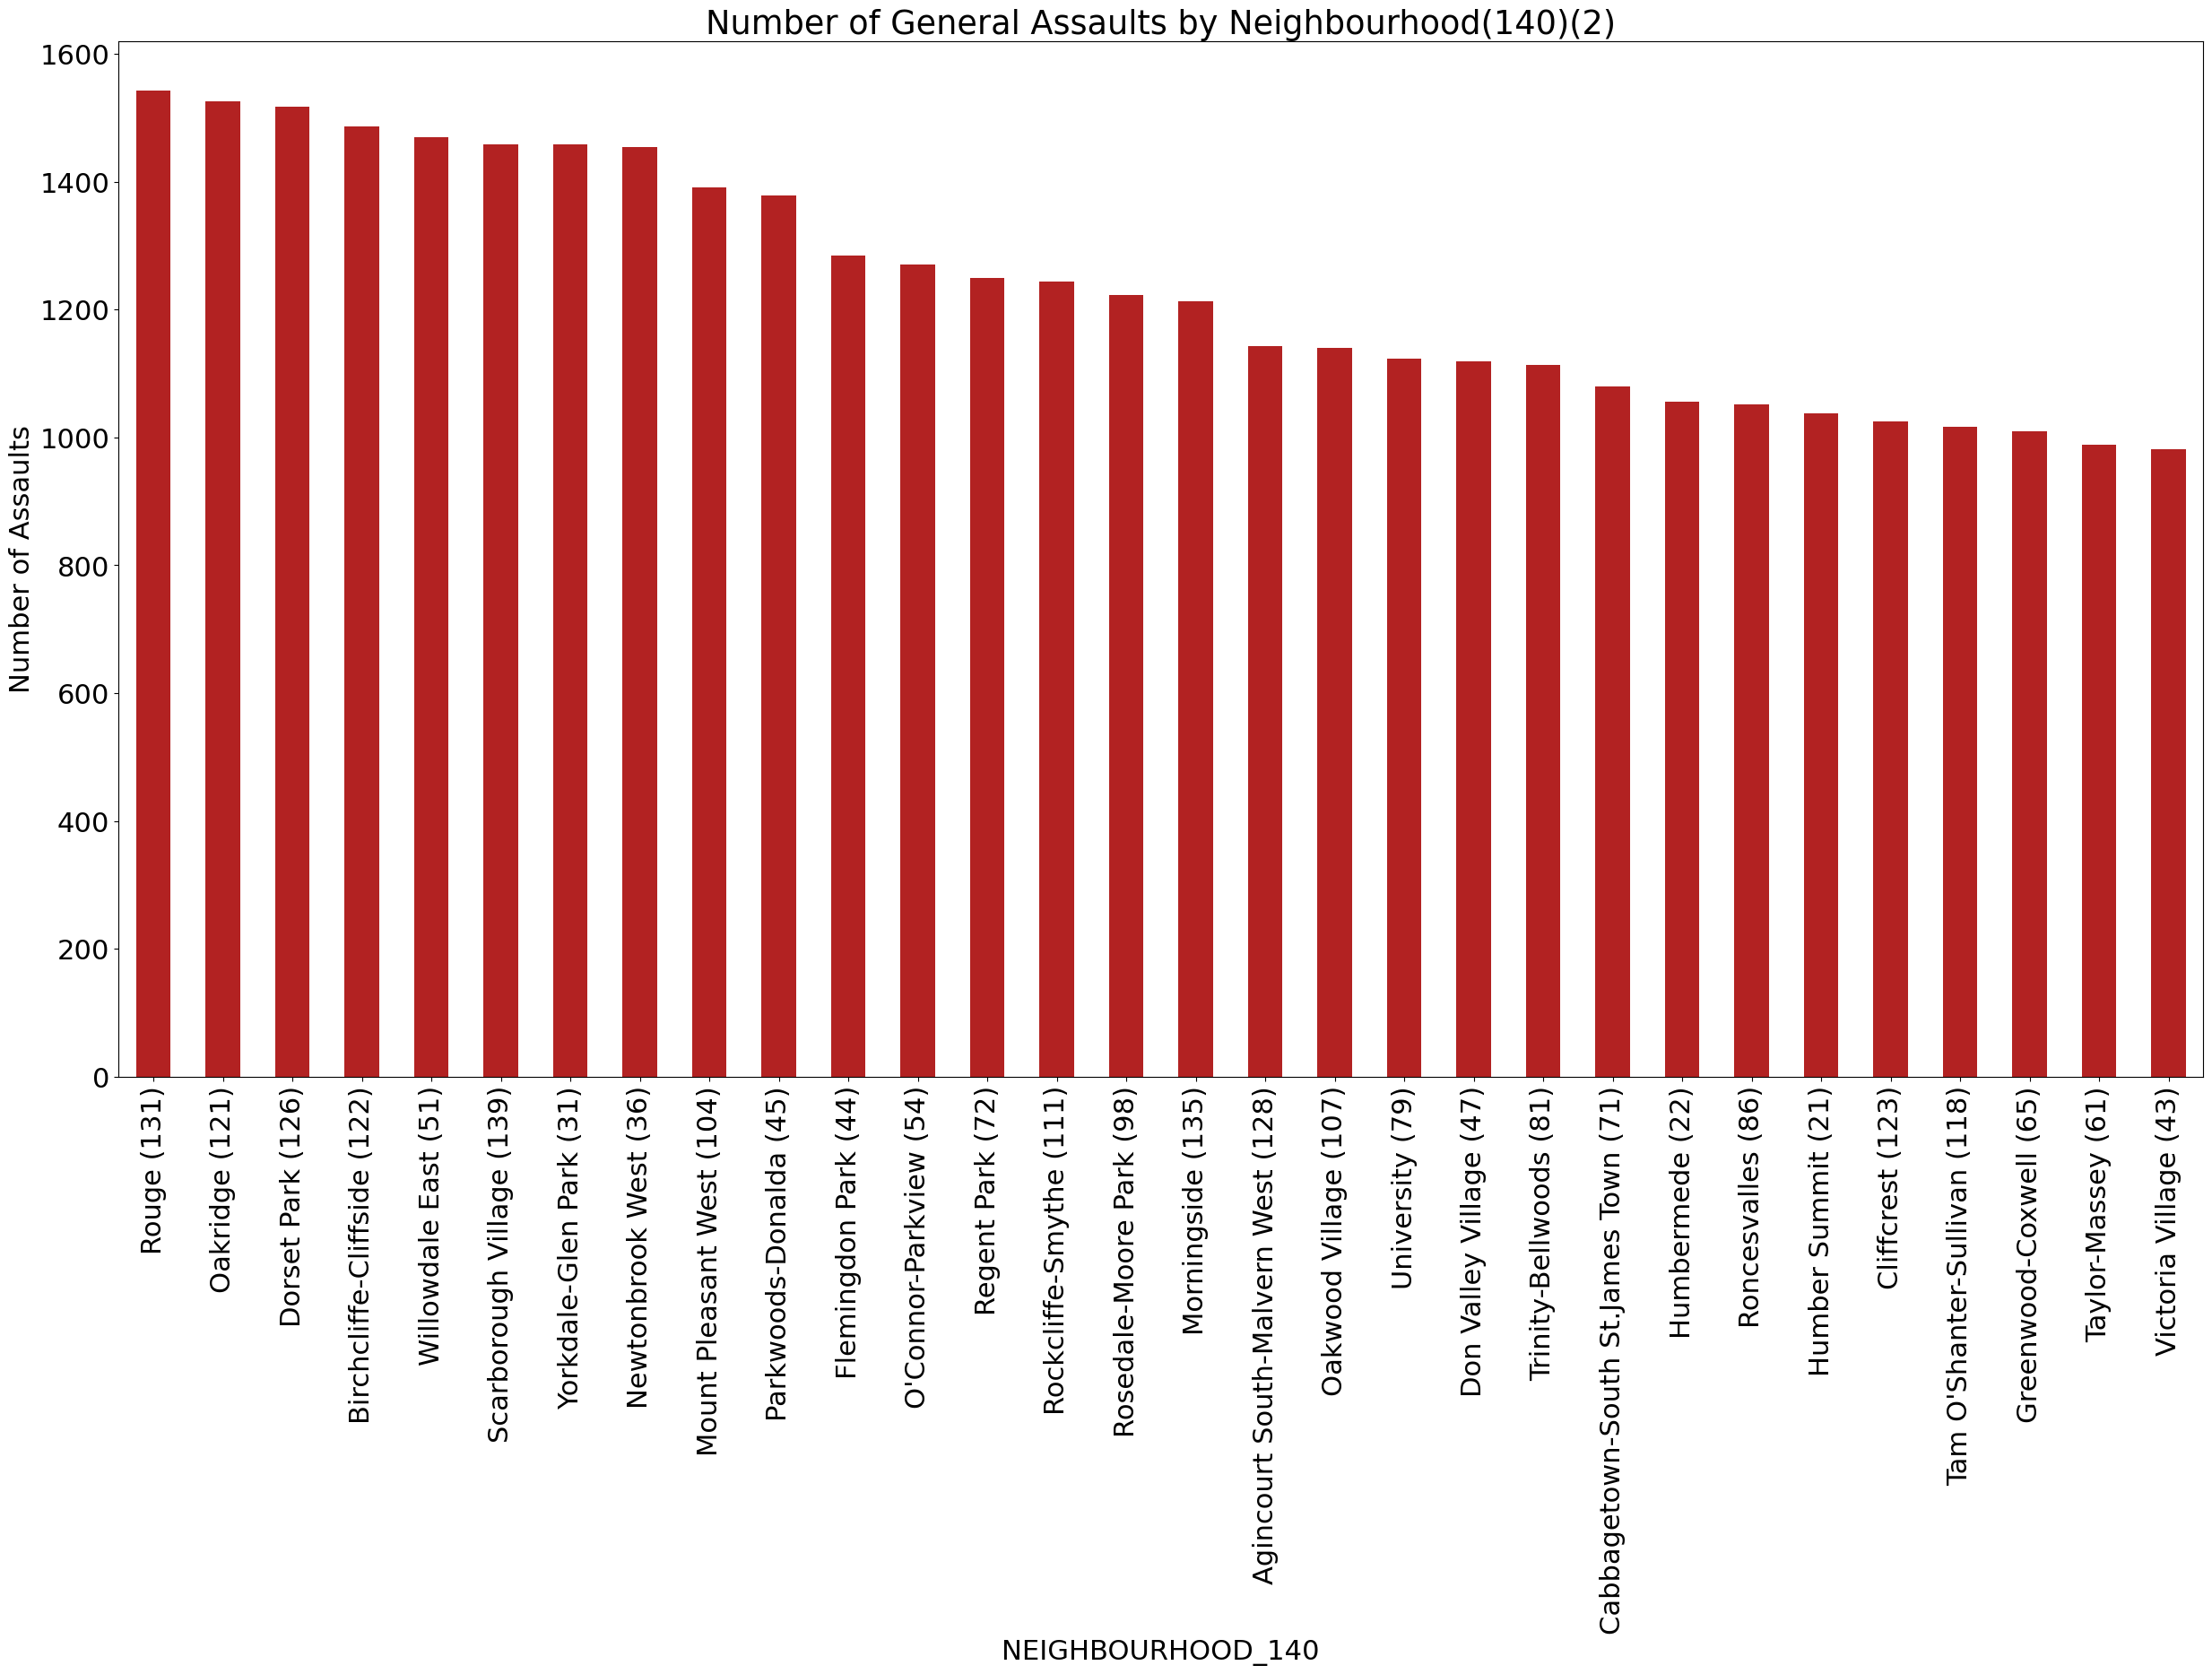

In [22]:
plot_pandas5 = offence_by_hood_count[31:61].plot.bar(color='firebrick')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Neighbourhood(140)(2)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

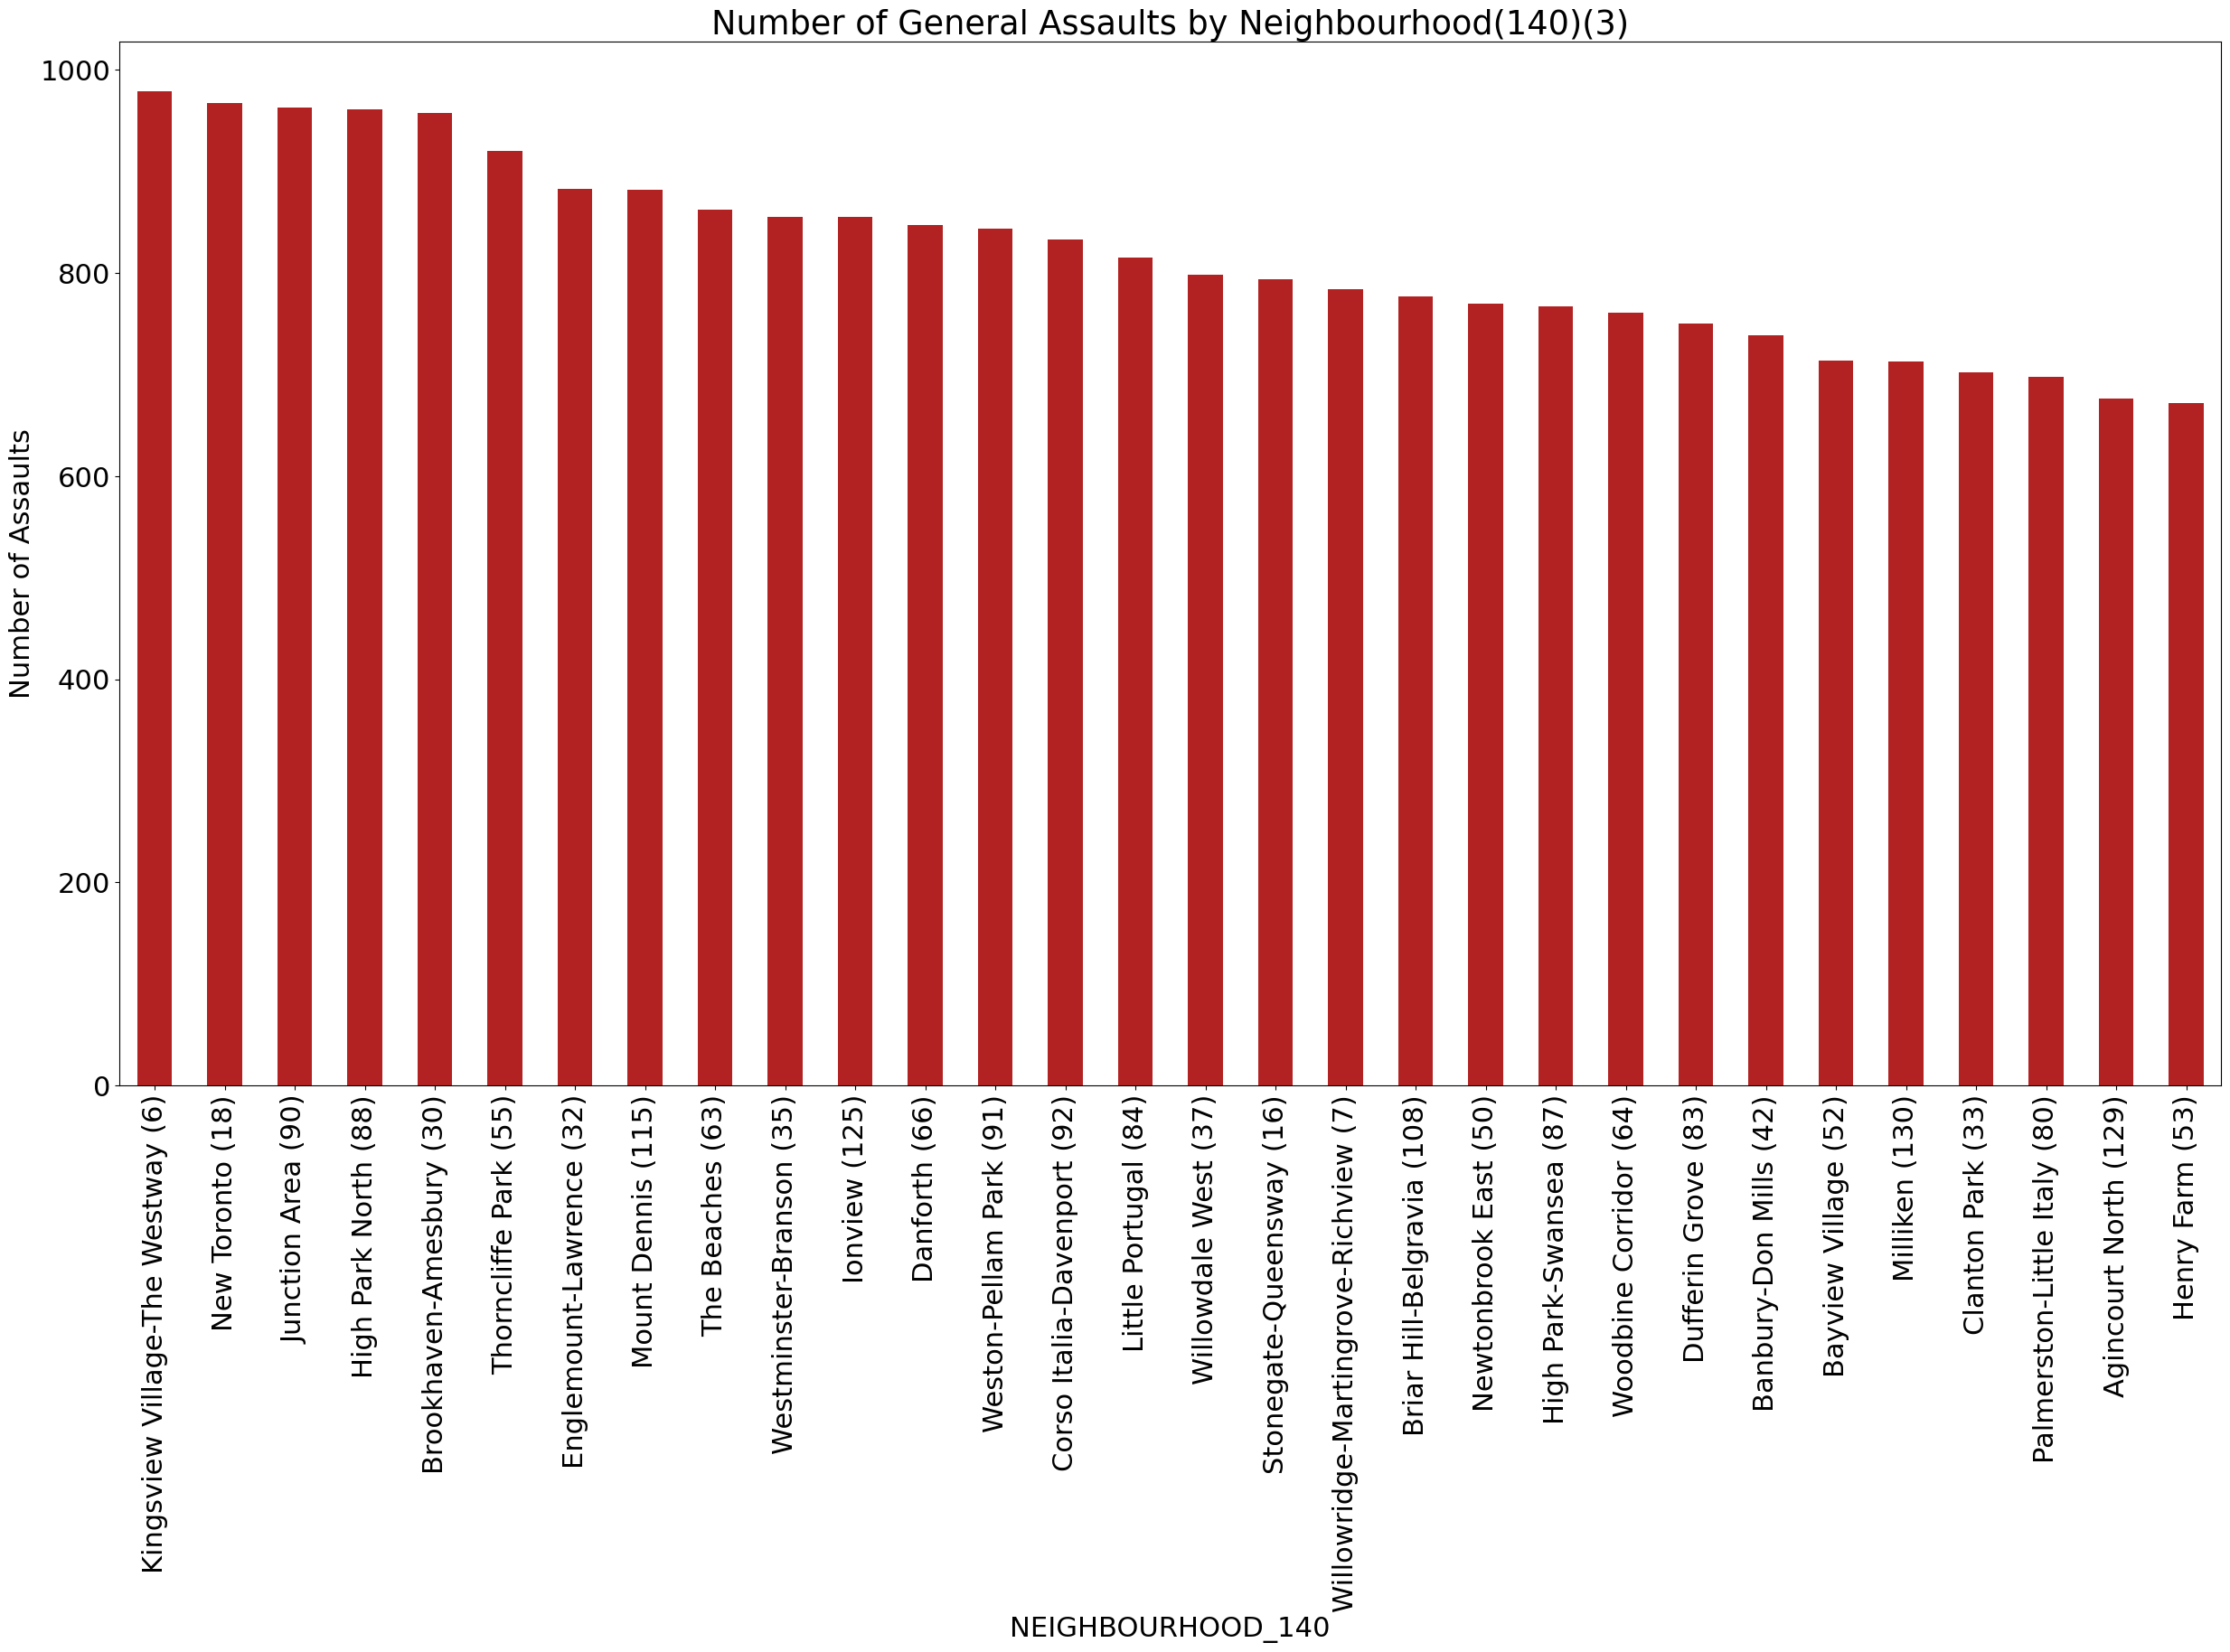

In [23]:
plot_pandas6 = offence_by_hood_count[61:91].plot.bar(color='firebrick')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Neighbourhood(140)(3)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

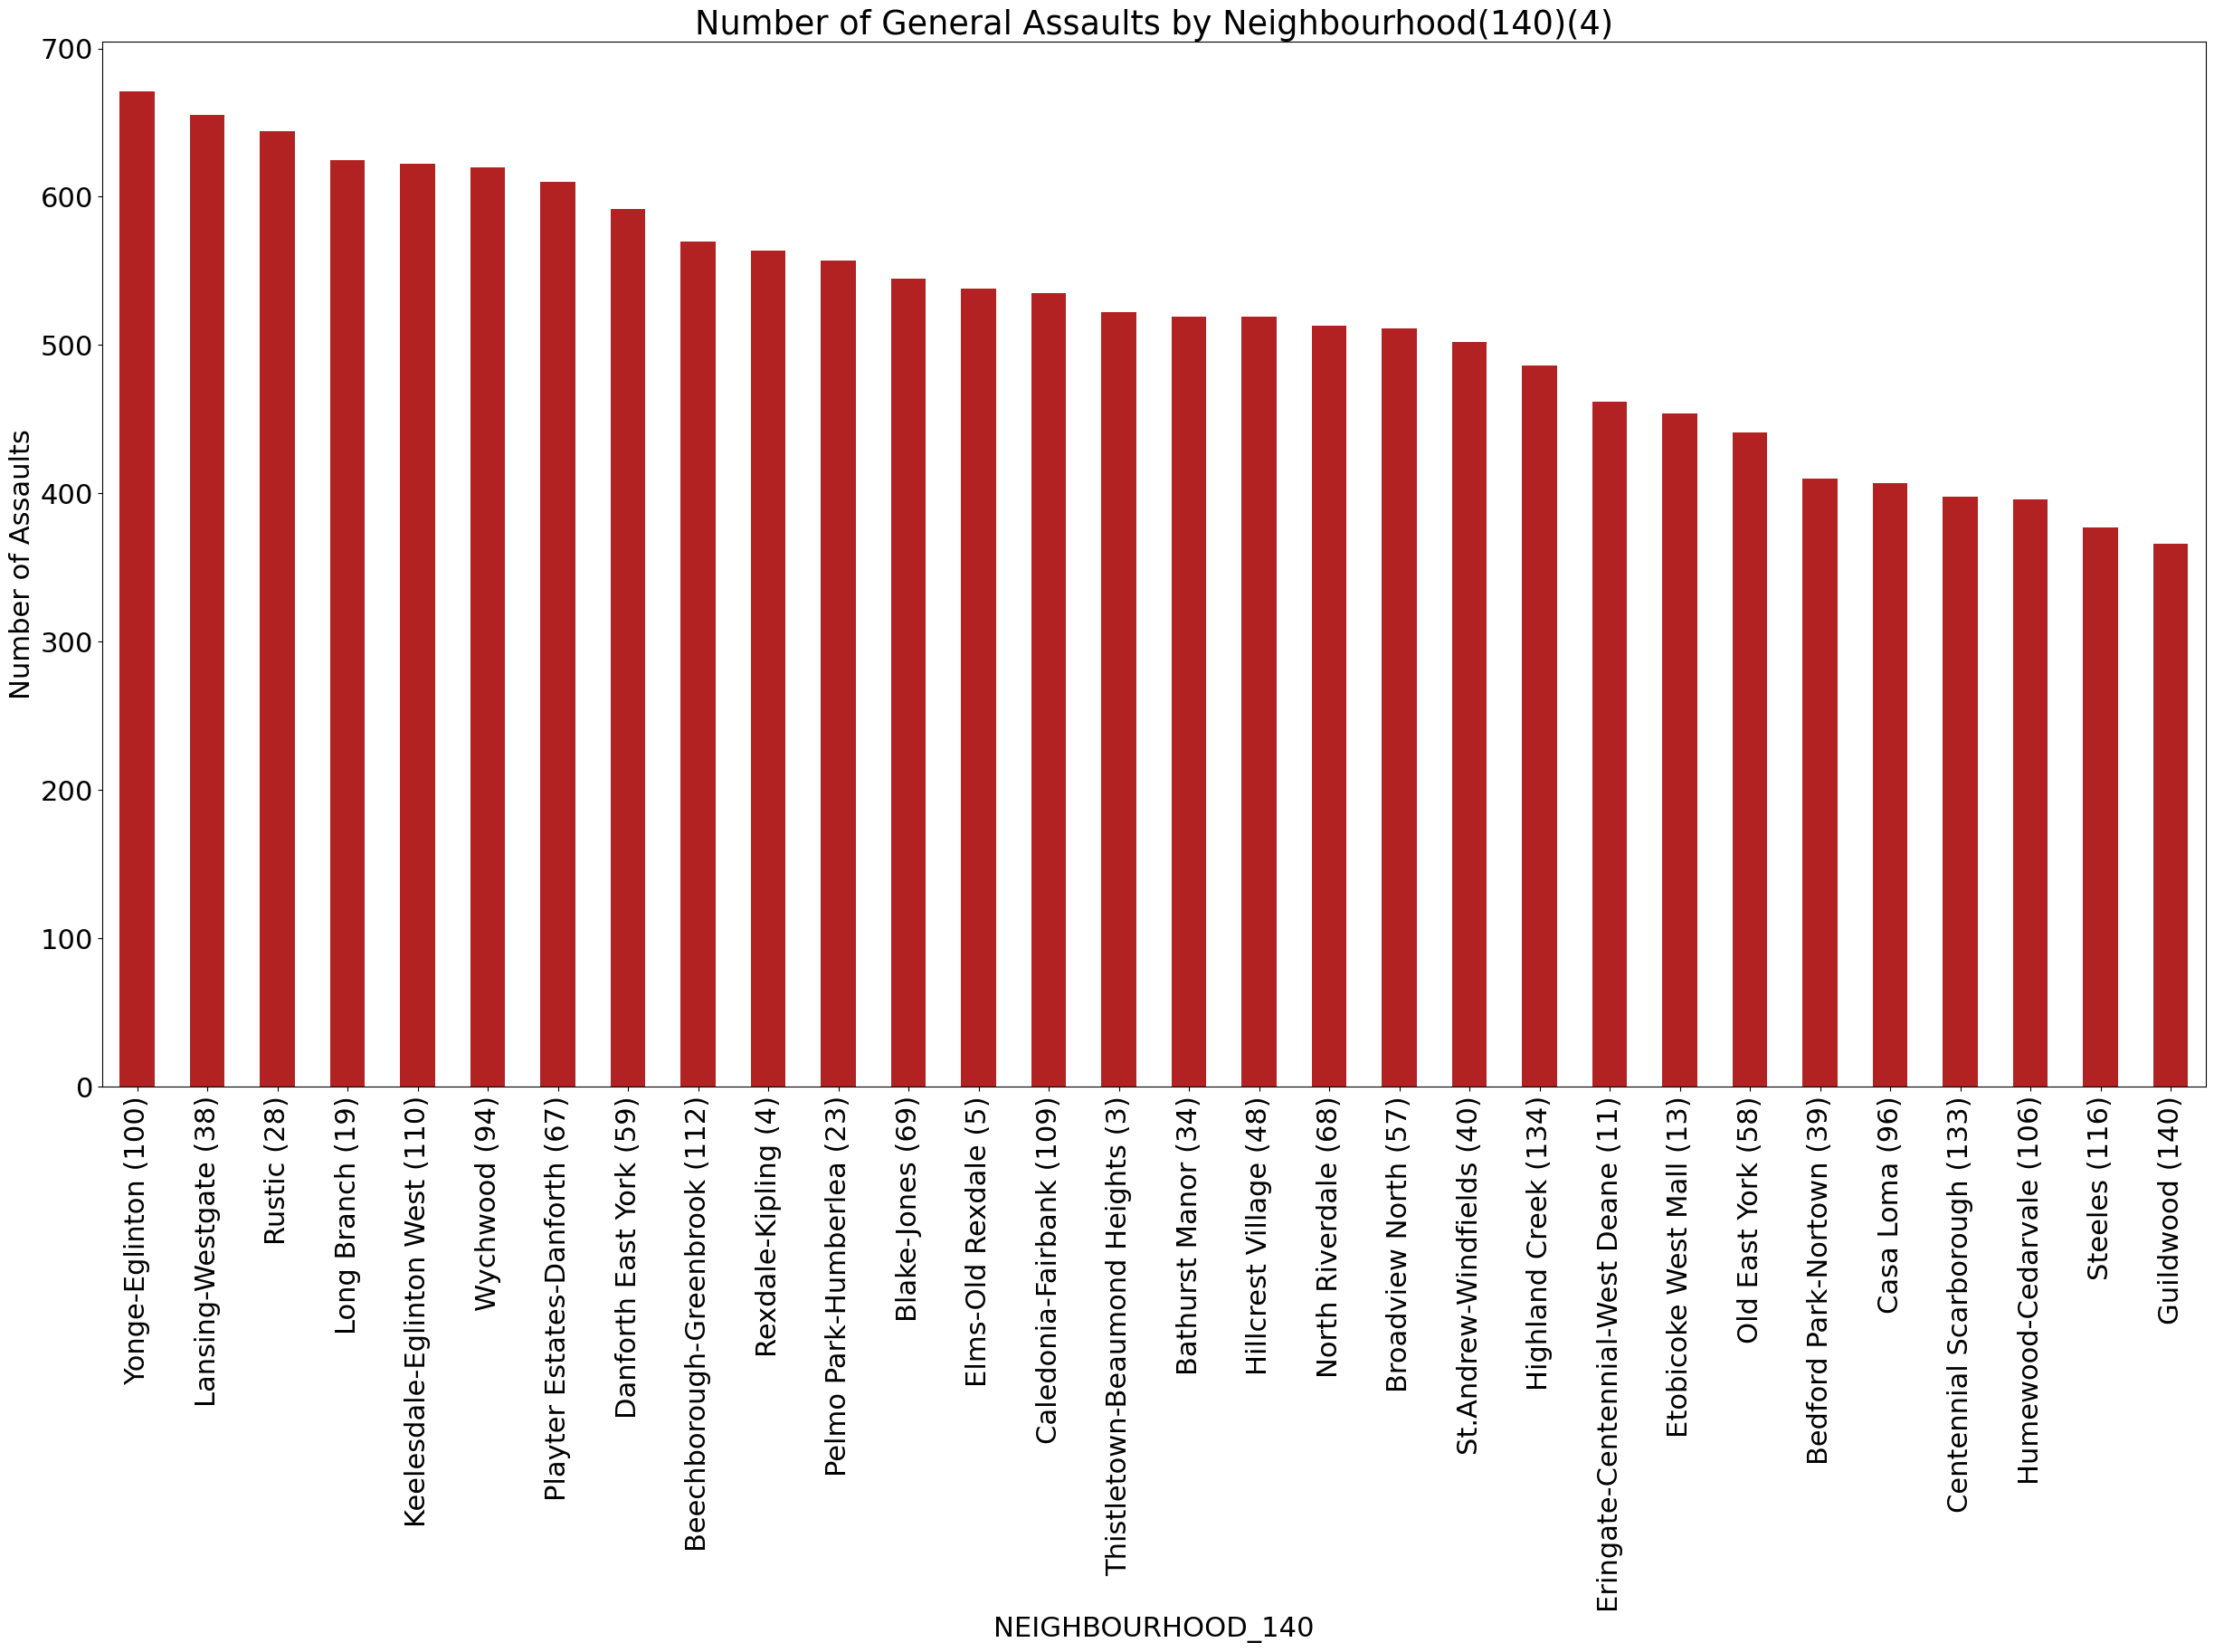

In [24]:
plot_pandas7 = offence_by_hood_count[91:121].plot.bar(color='firebrick')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Neighbourhood(140)(4)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

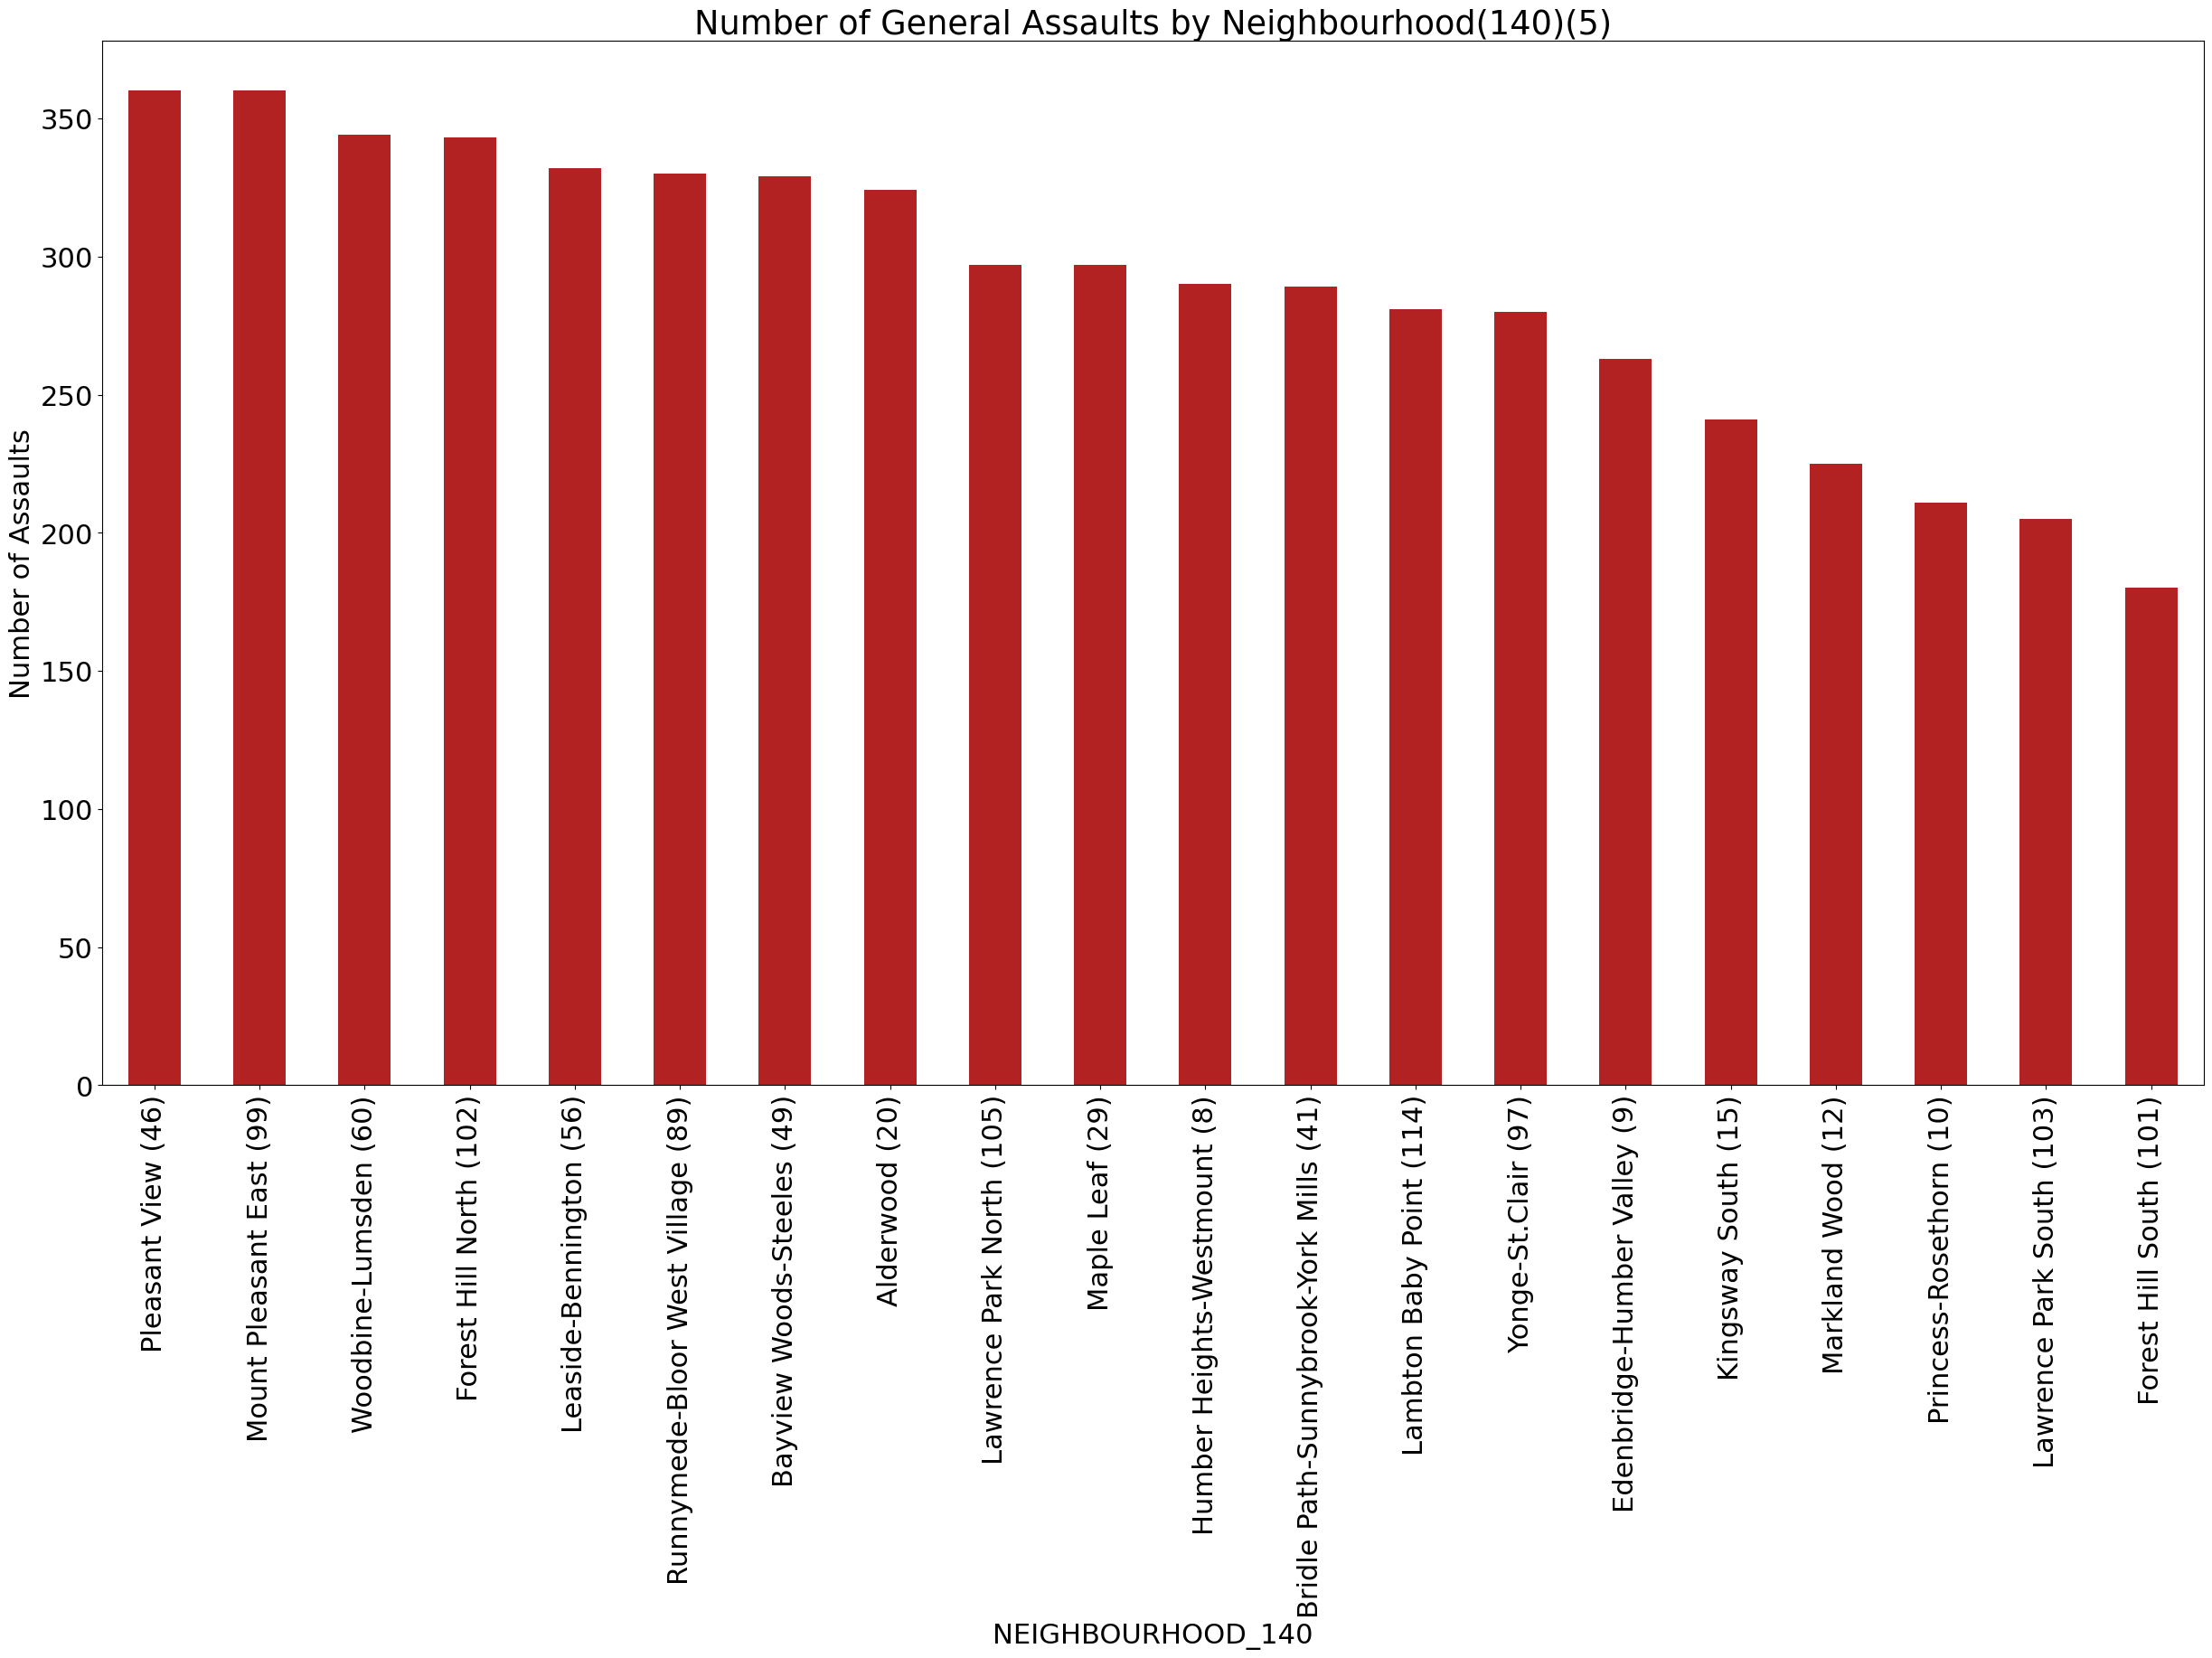

In [25]:
plot_pandas8 = offence_by_hood_count[121:141].plot.bar(color='firebrick')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Assaults")
plt.title("Number of General Assaults by Neighbourhood(140)(5)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

## Breaking & Entering Visualizations

In [26]:
# Generate a bar plot showing the total number of breaking & enterings by offence type
offence_count2 = break_and_enter_metadata["OFFENCE"].value_counts()
offence_count2

B&E                             52780
B&E W'Intent                     7683
Unlawfully In Dwelling-House     1932
B&E Out                           106
B&E - To Steal Firearm             13
B&E - M/Veh To Steal Firearm       13
Name: OFFENCE, dtype: int64

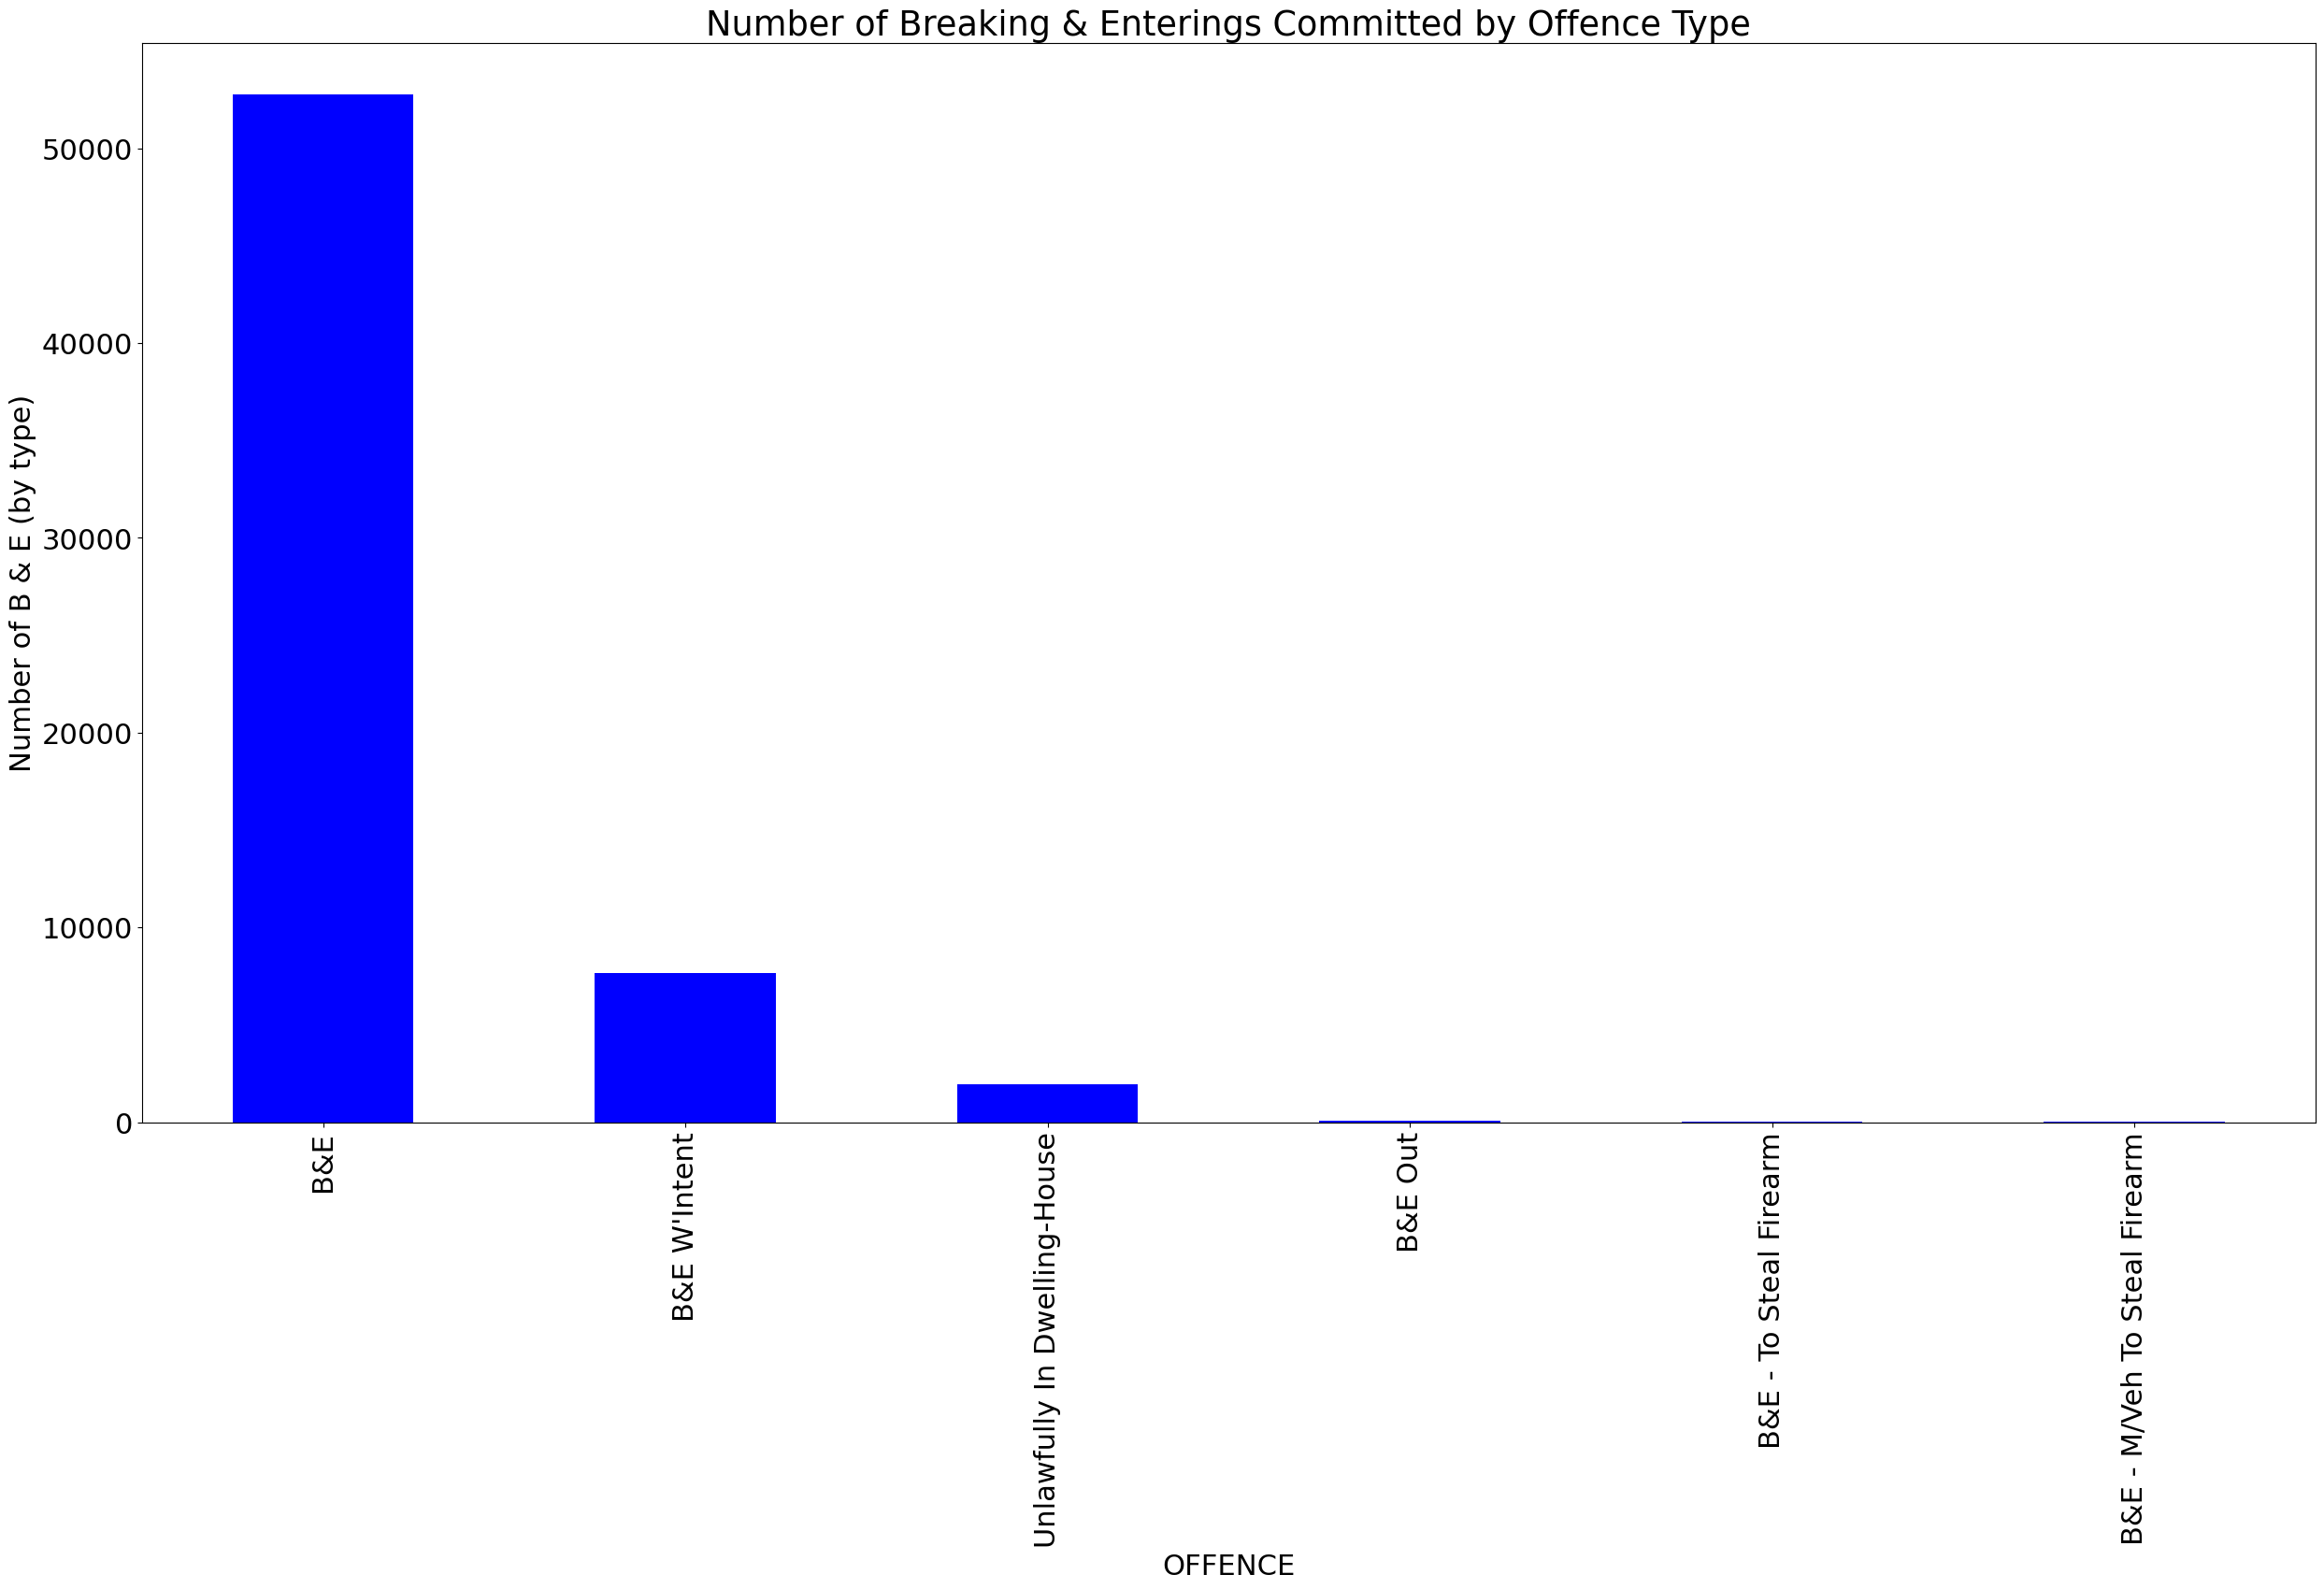

In [27]:
plot_pandas9 = offence_count2.plot.bar(color='b')  
plt.xlabel("OFFENCE")
plt.ylabel("Number of B & E (by type)")
plt.title("Number of Breaking & Enterings Committed by Offence Type")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'font.size': 15})

In [28]:
# Generate a bar plot showing the total number of breaking & enterings by month
b_e_by_month_count = break_and_enter_metadata["REPORT_MONTH"].value_counts()
b_e_by_month_count

October      5557
November     5530
August       5519
January      5400
July         5297
December     5219
September    5211
May          5136
March        5088
April        5074
June         4912
February     4584
Name: REPORT_MONTH, dtype: int64

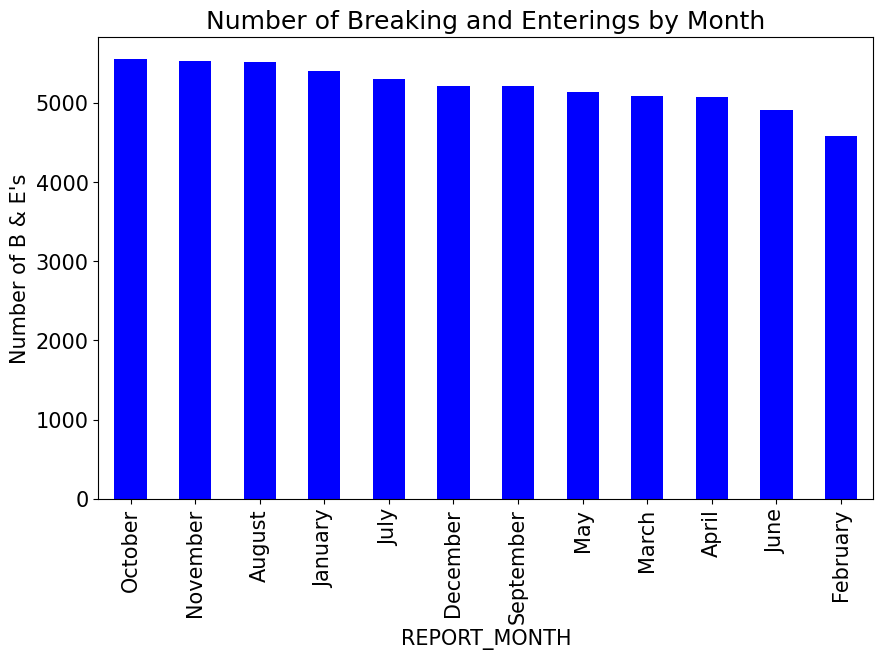

In [29]:
plot_pandas10 = b_e_by_month_count.plot.bar(color='b')  
plt.xlabel("REPORT_MONTH")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking and Enterings by Month")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [30]:
# Generate a bar plot showing the total number of breaking & enterings by year
b_e_by_year_count = break_and_enter_metadata["REPORT_YEAR"].value_counts()
b_e_by_year_count

2019    8548
2018    7612
2014    7216
2020    6985
2015    6940
2017    6927
2016    6435
2022    6121
2021    5743
Name: REPORT_YEAR, dtype: int64

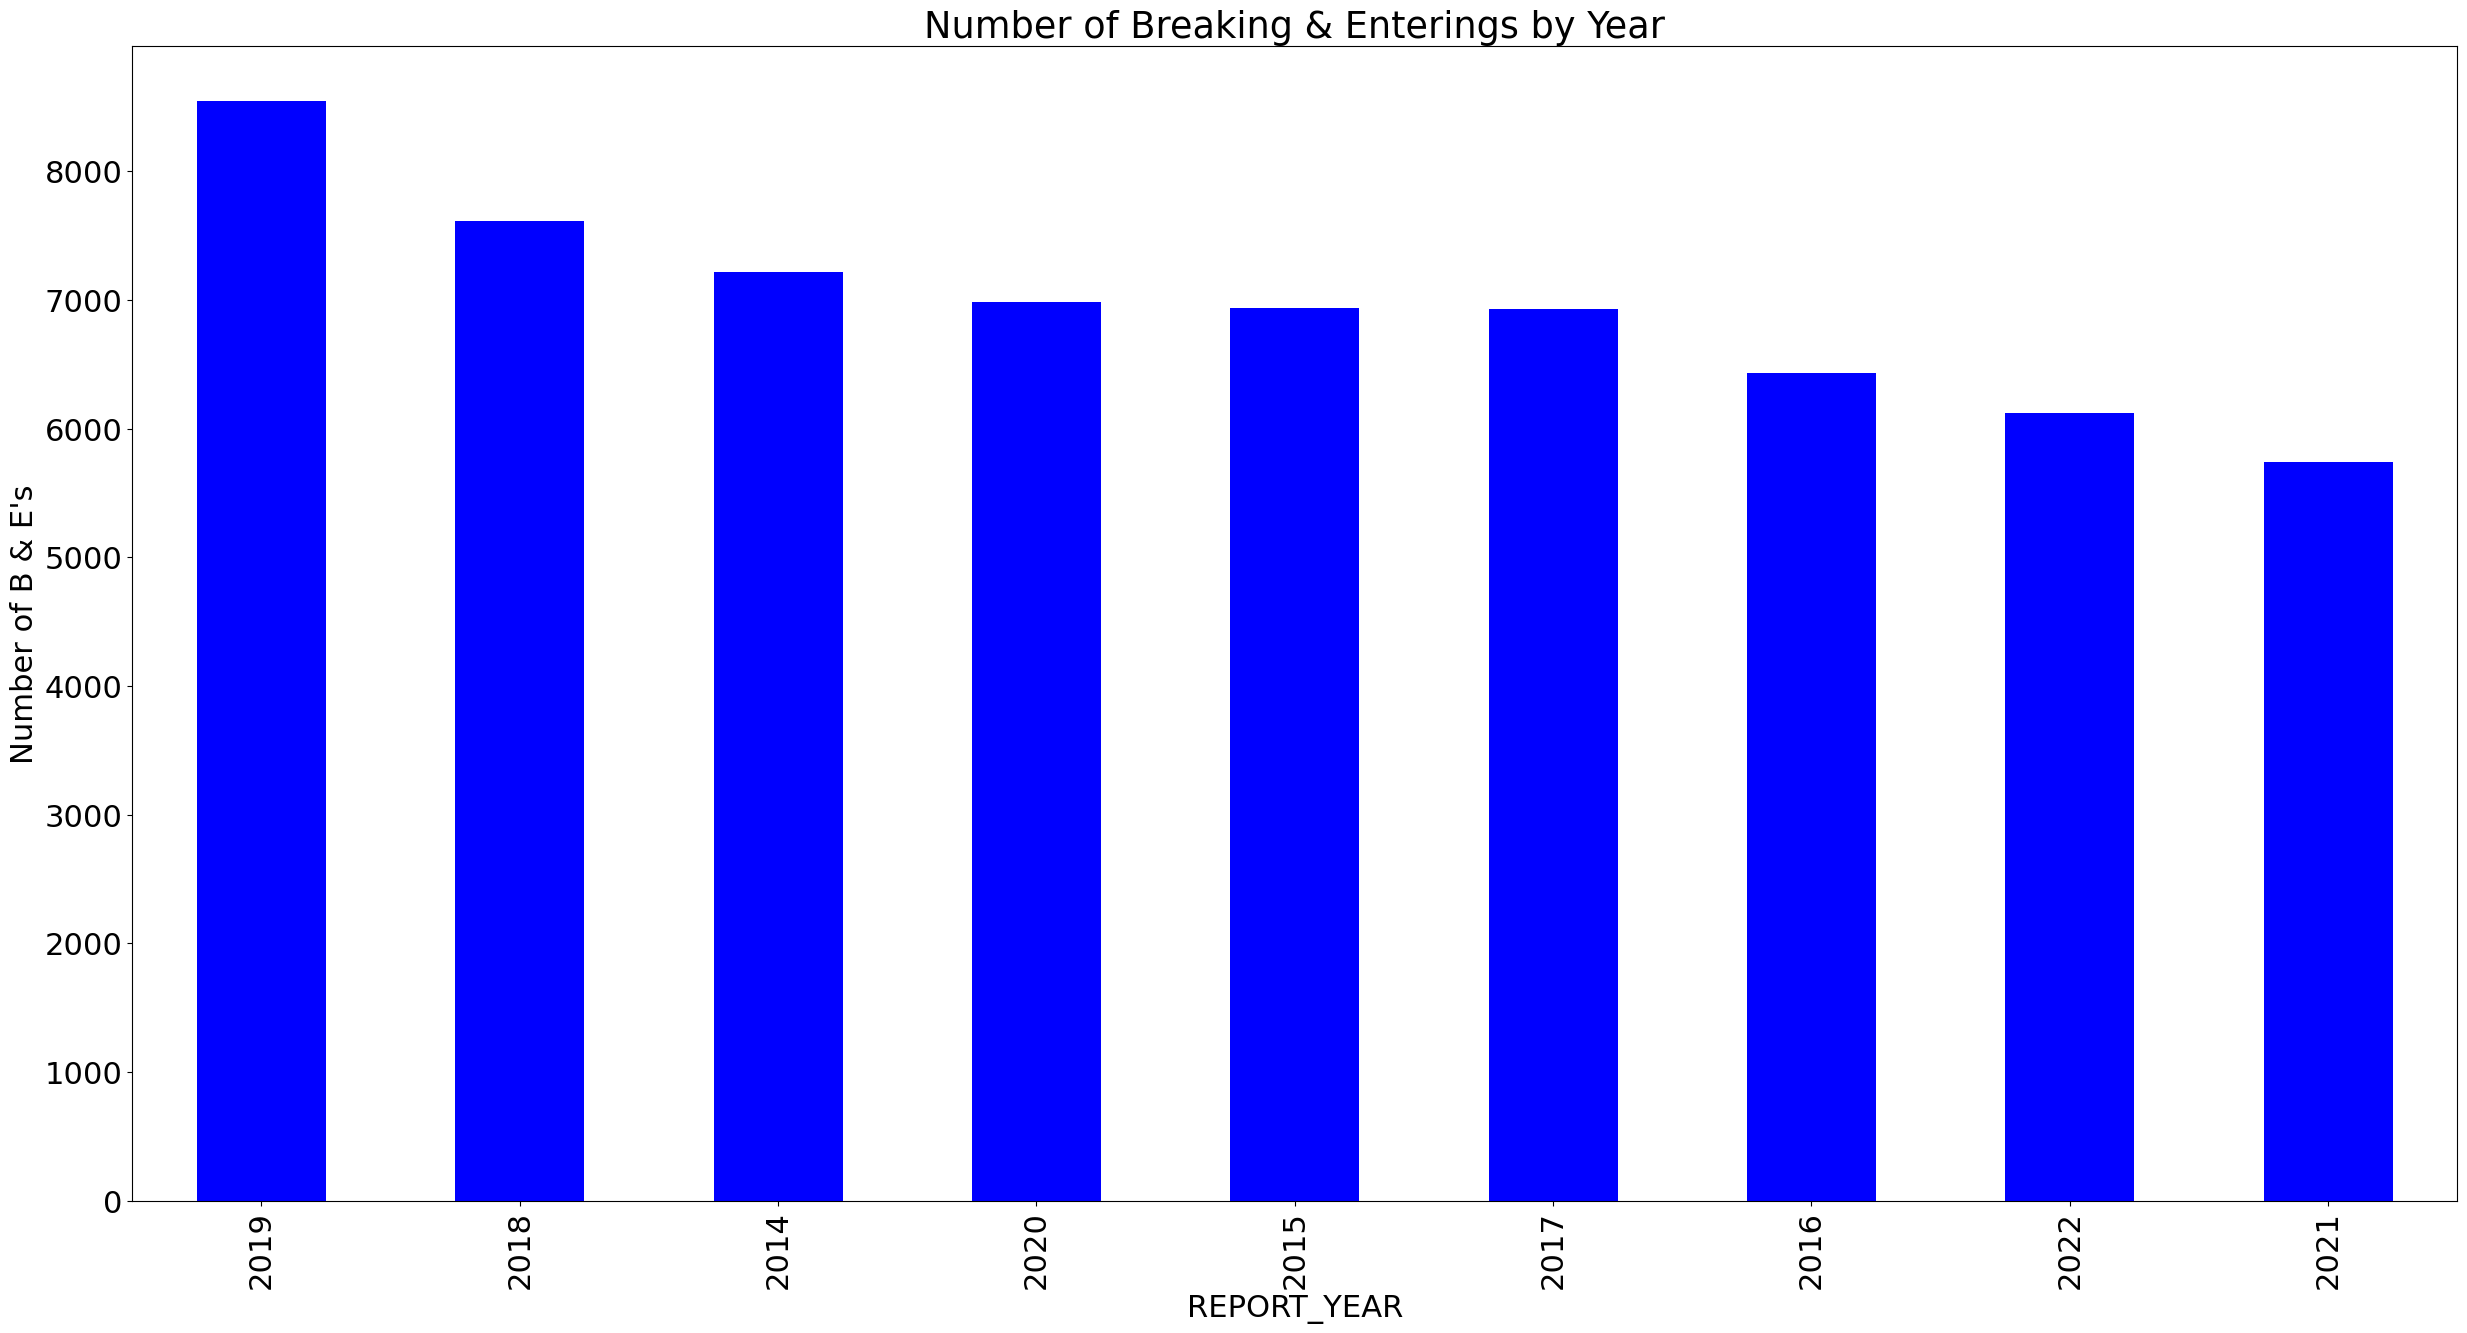

In [31]:
plot_pandas11 = b_e_by_year_count.plot.bar(color='b')  
plt.xlabel("REPORT_YEAR")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking & Enterings by Year")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [32]:
# Generate a bar plot showing the total number of general assaults by Neighbourhood Code
b_e_by_hood_count = break_and_enter_metadata["NEIGHBOURHOOD_140"].value_counts()
b_e_by_hood_count

Waterfront Communities-The Island (77)    2512
Church-Yonge Corridor (75)                1839
Bay Street Corridor (76)                  1469
Annex (95)                                1391
Moss Park (73)                            1375
                                          ... 
Maple Leaf (29)                            118
Caledonia-Fairbank (109)                   113
Lambton Baby Point (114)                   105
Guildwood (140)                            103
Elms-Old Rexdale (5)                        96
Name: NEIGHBOURHOOD_140, Length: 141, dtype: int64

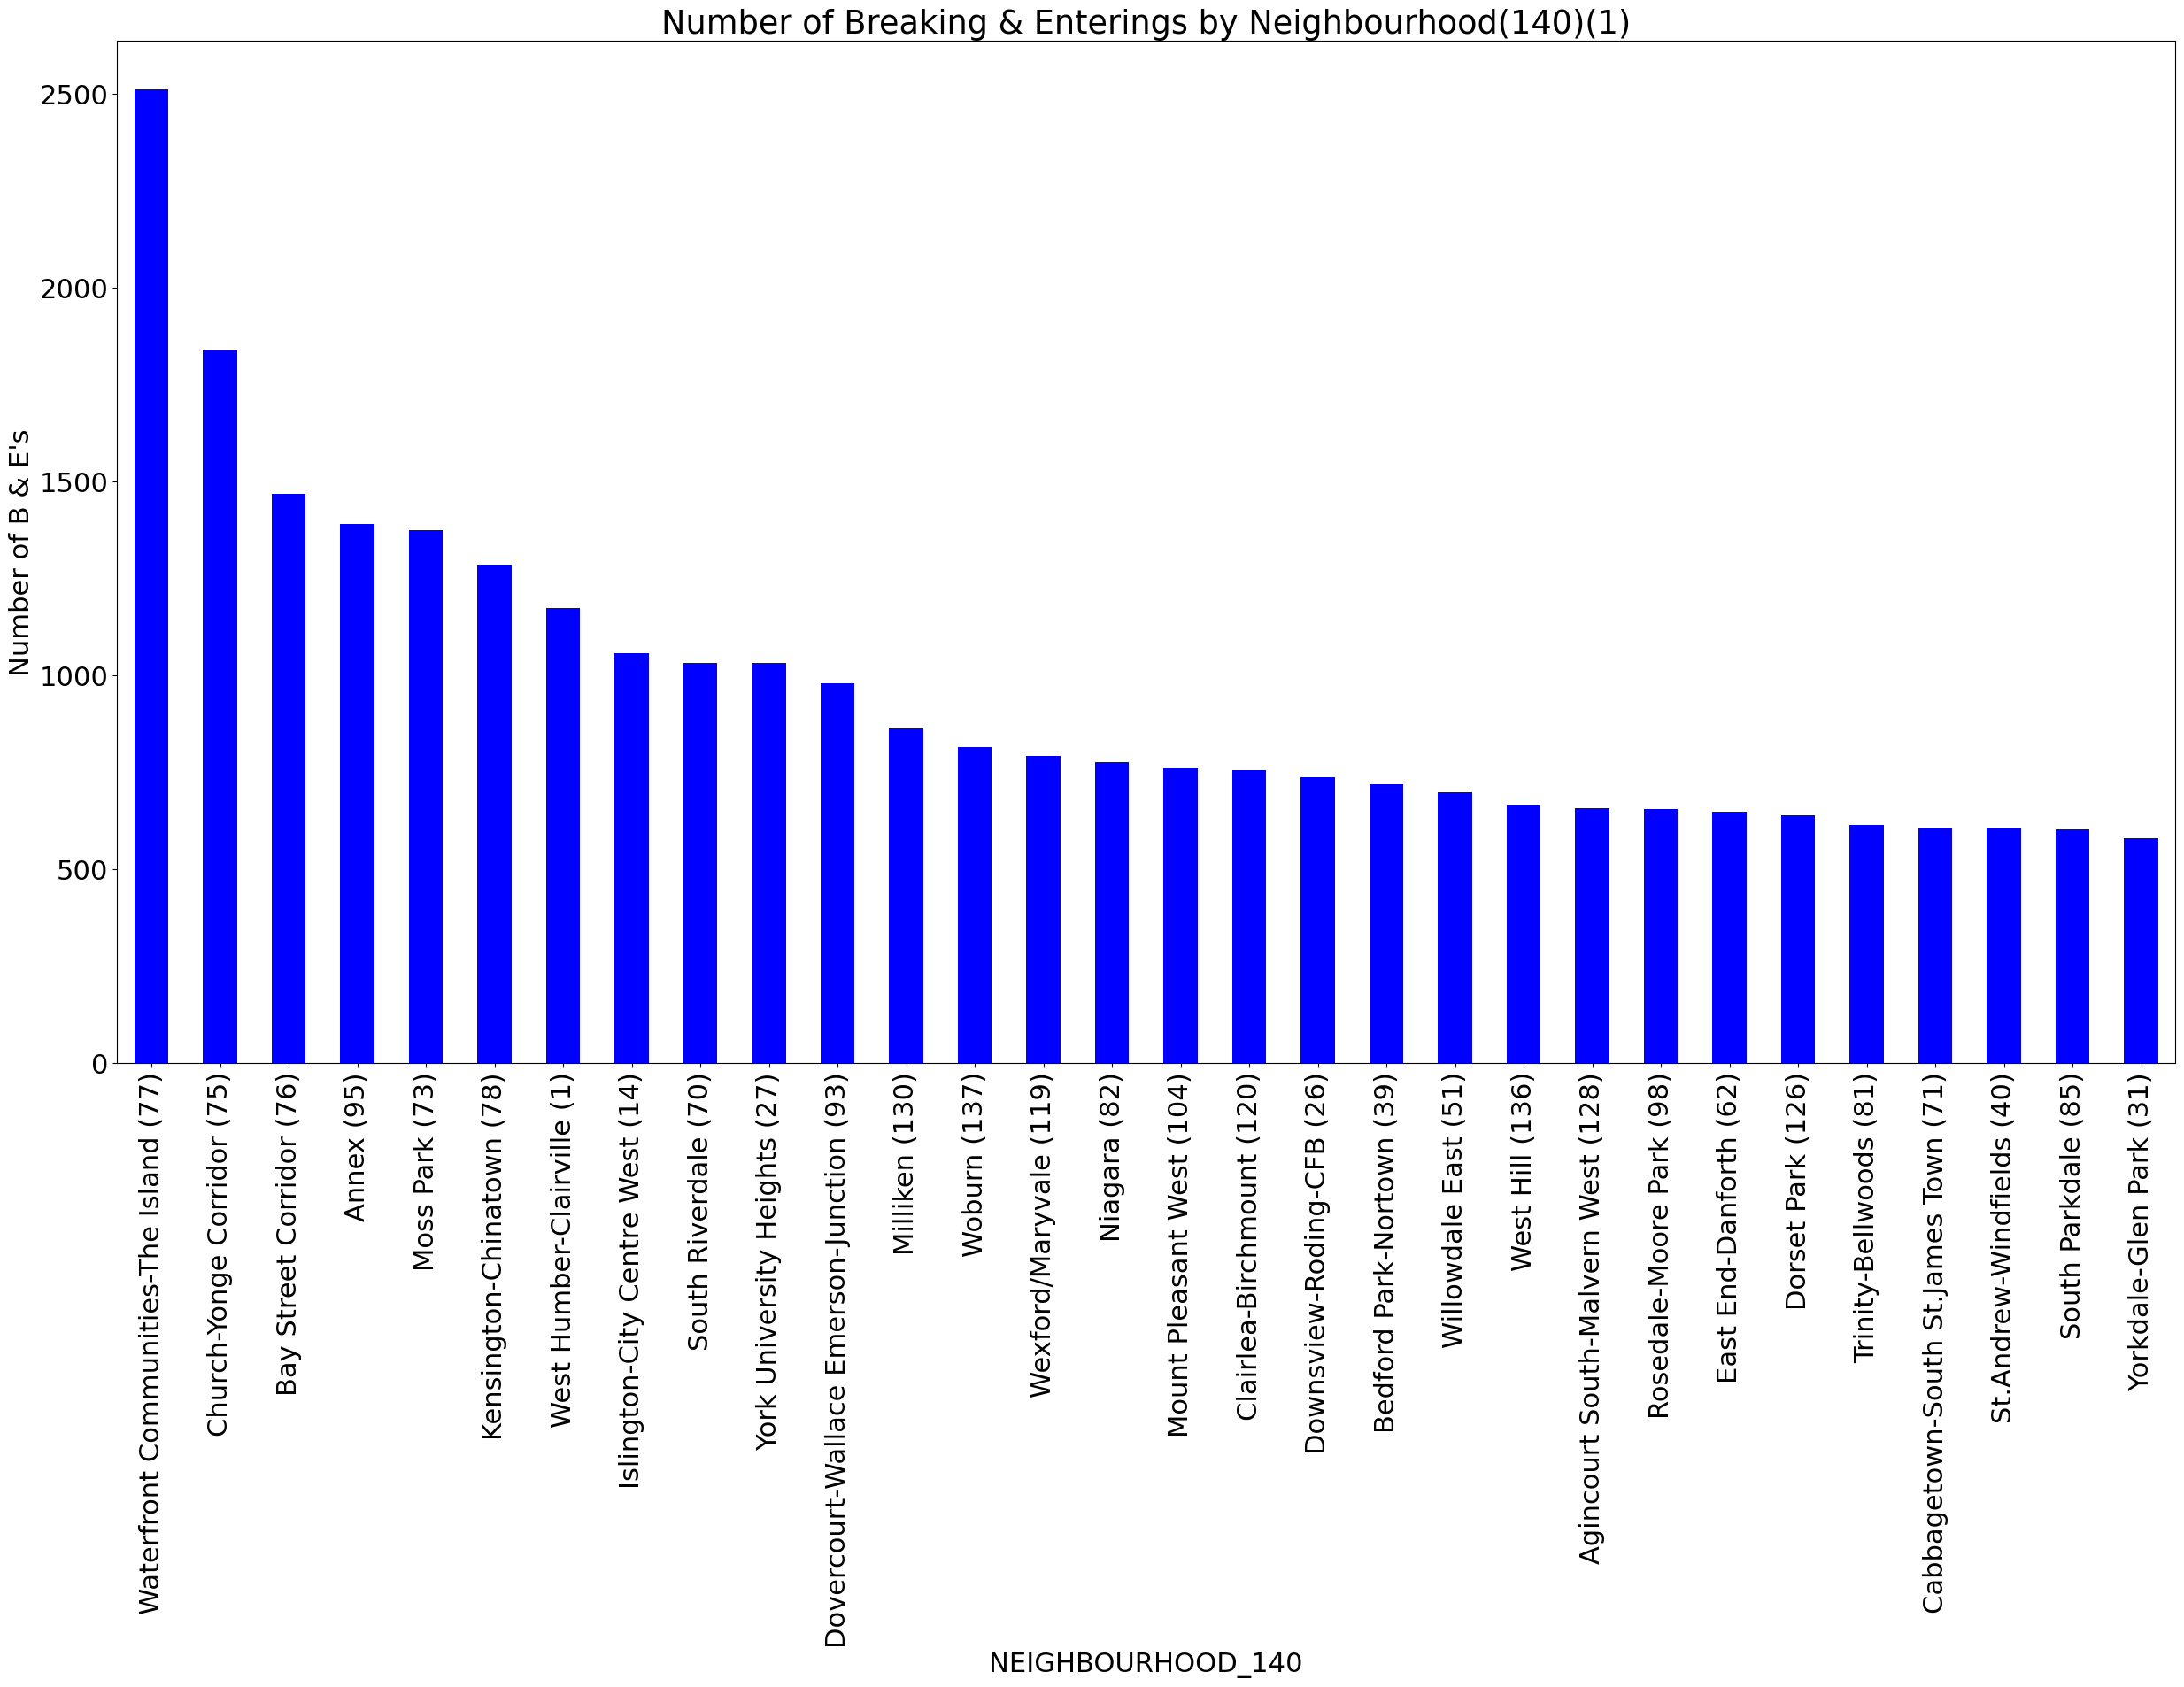

In [33]:
plot_pandas12 = b_e_by_hood_count[0:30].plot.bar(color='b')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking & Enterings by Neighbourhood(140)(1)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

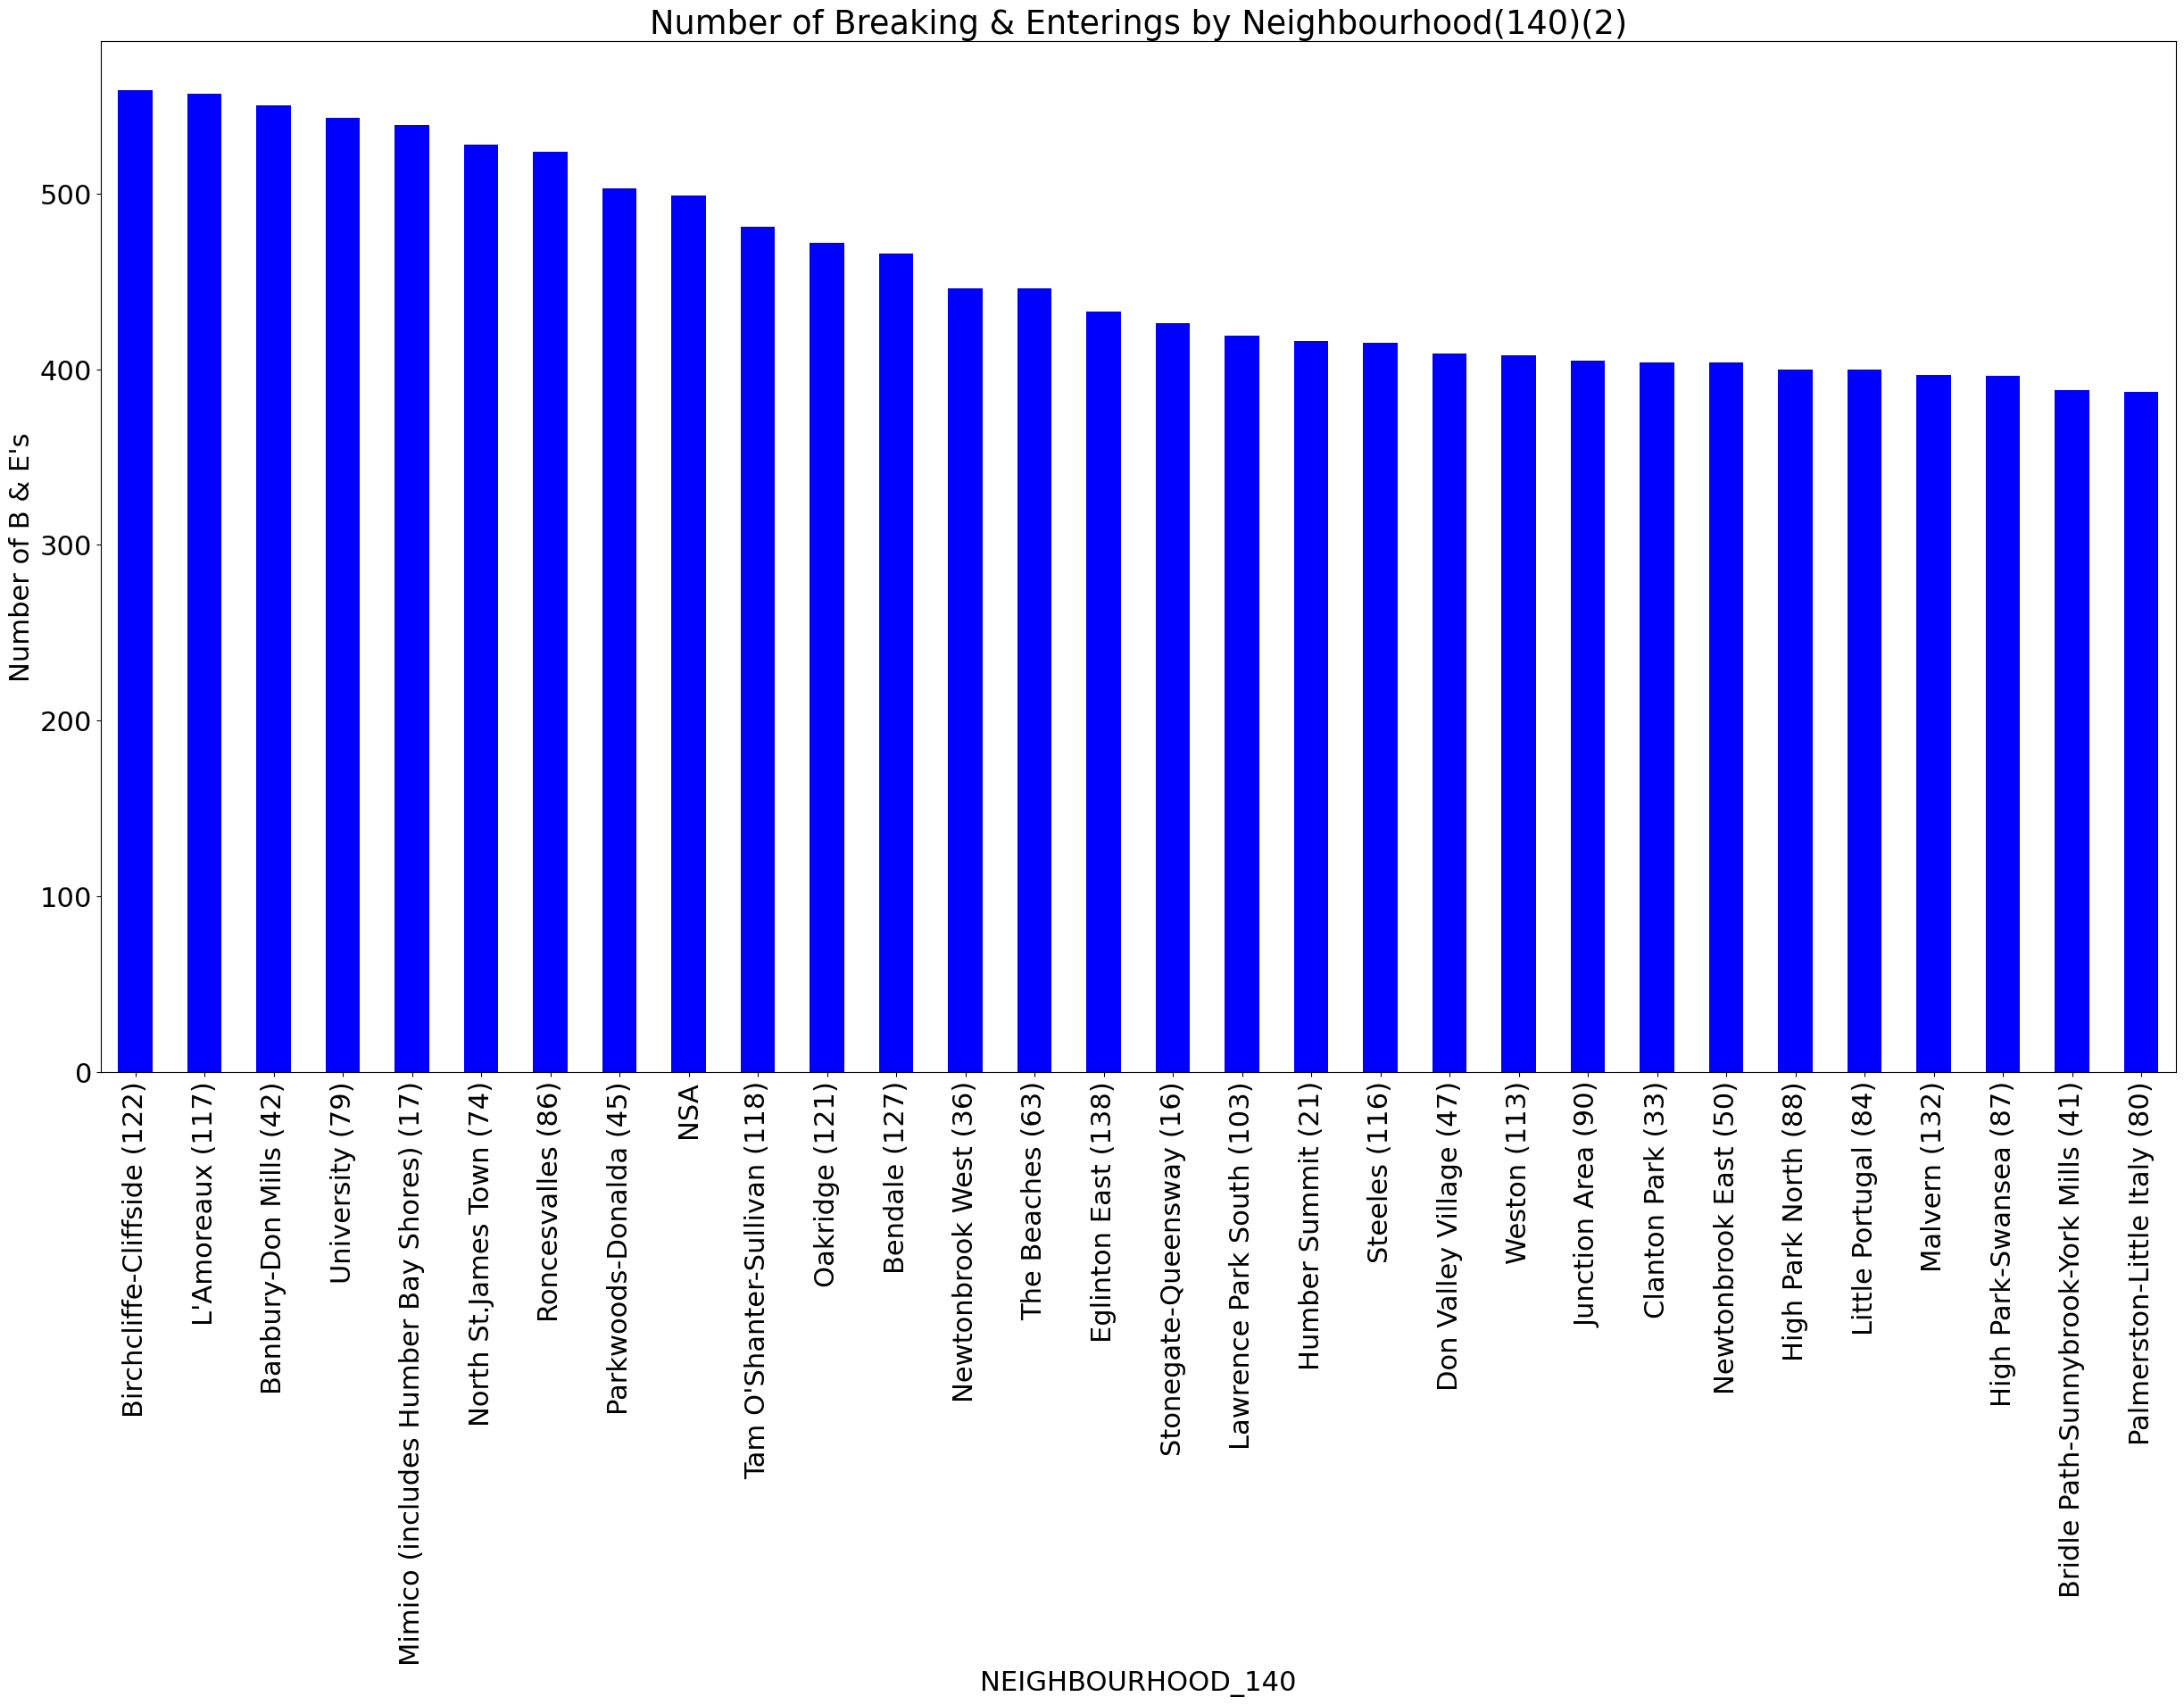

In [34]:
plot_pandas13 = b_e_by_hood_count[31:61].plot.bar(color='b')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking & Enterings by Neighbourhood(140)(2)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

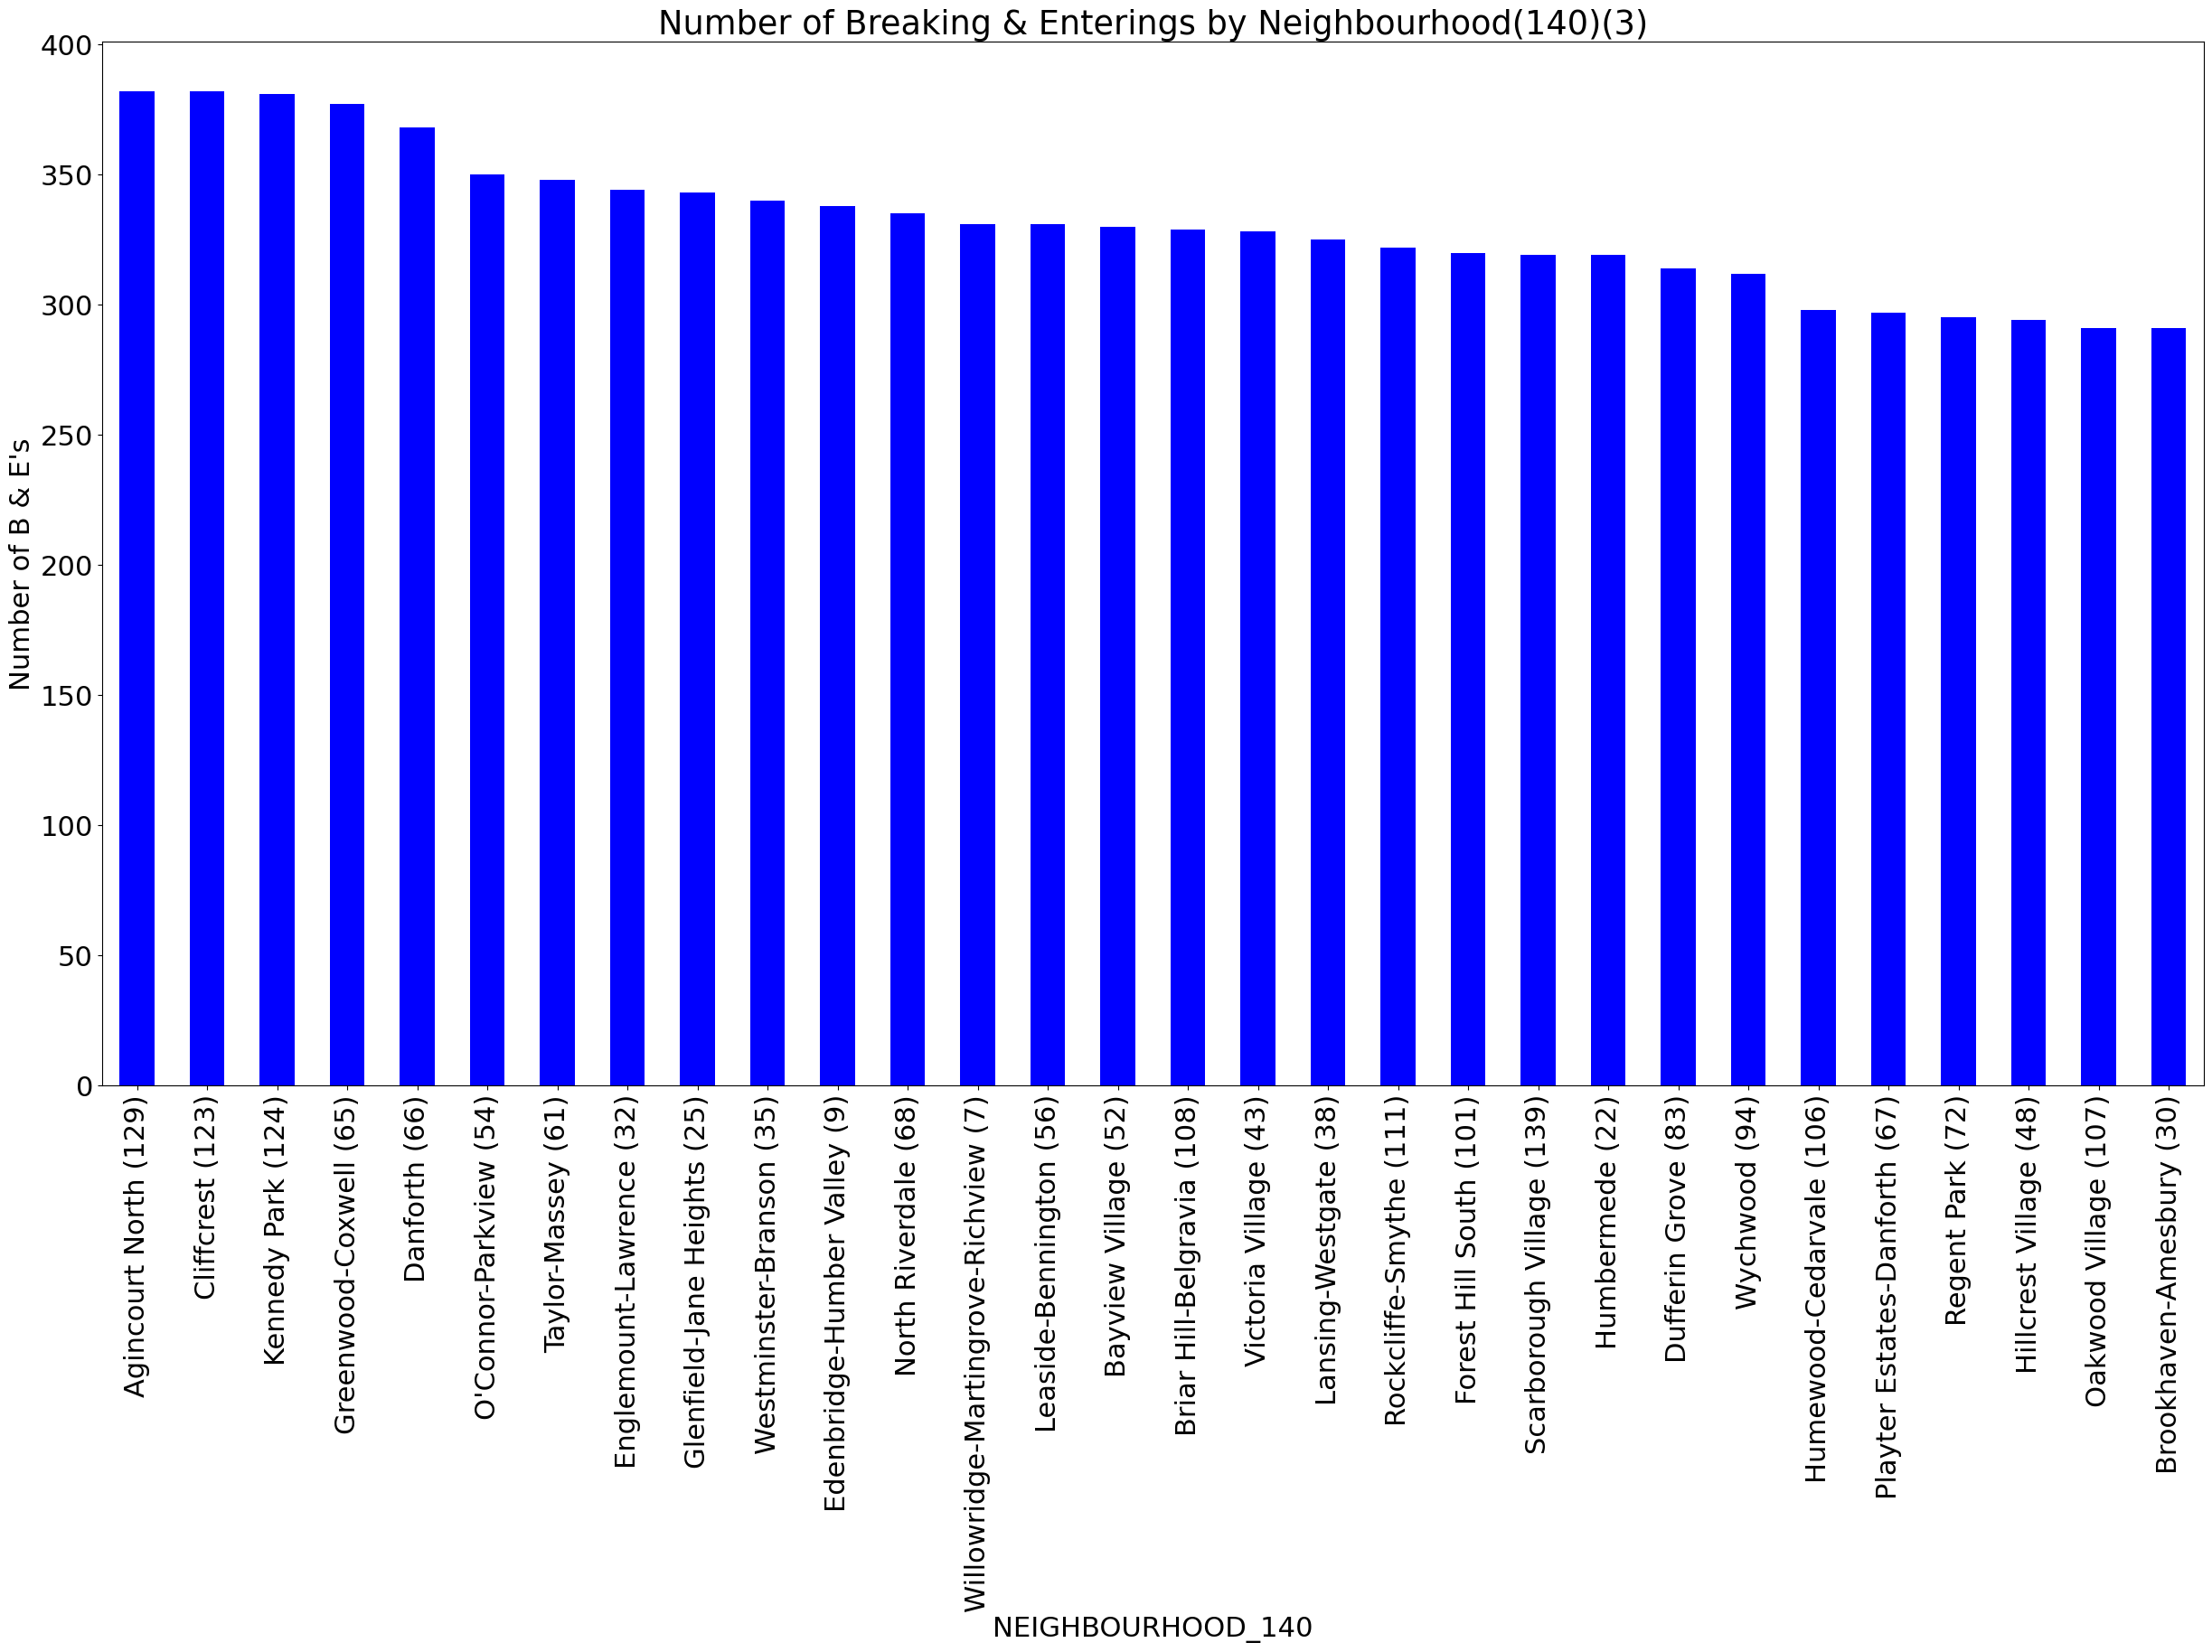

In [35]:
plot_pandas14 = b_e_by_hood_count[61:91].plot.bar(color='b')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking & Enterings by Neighbourhood(140)(3)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

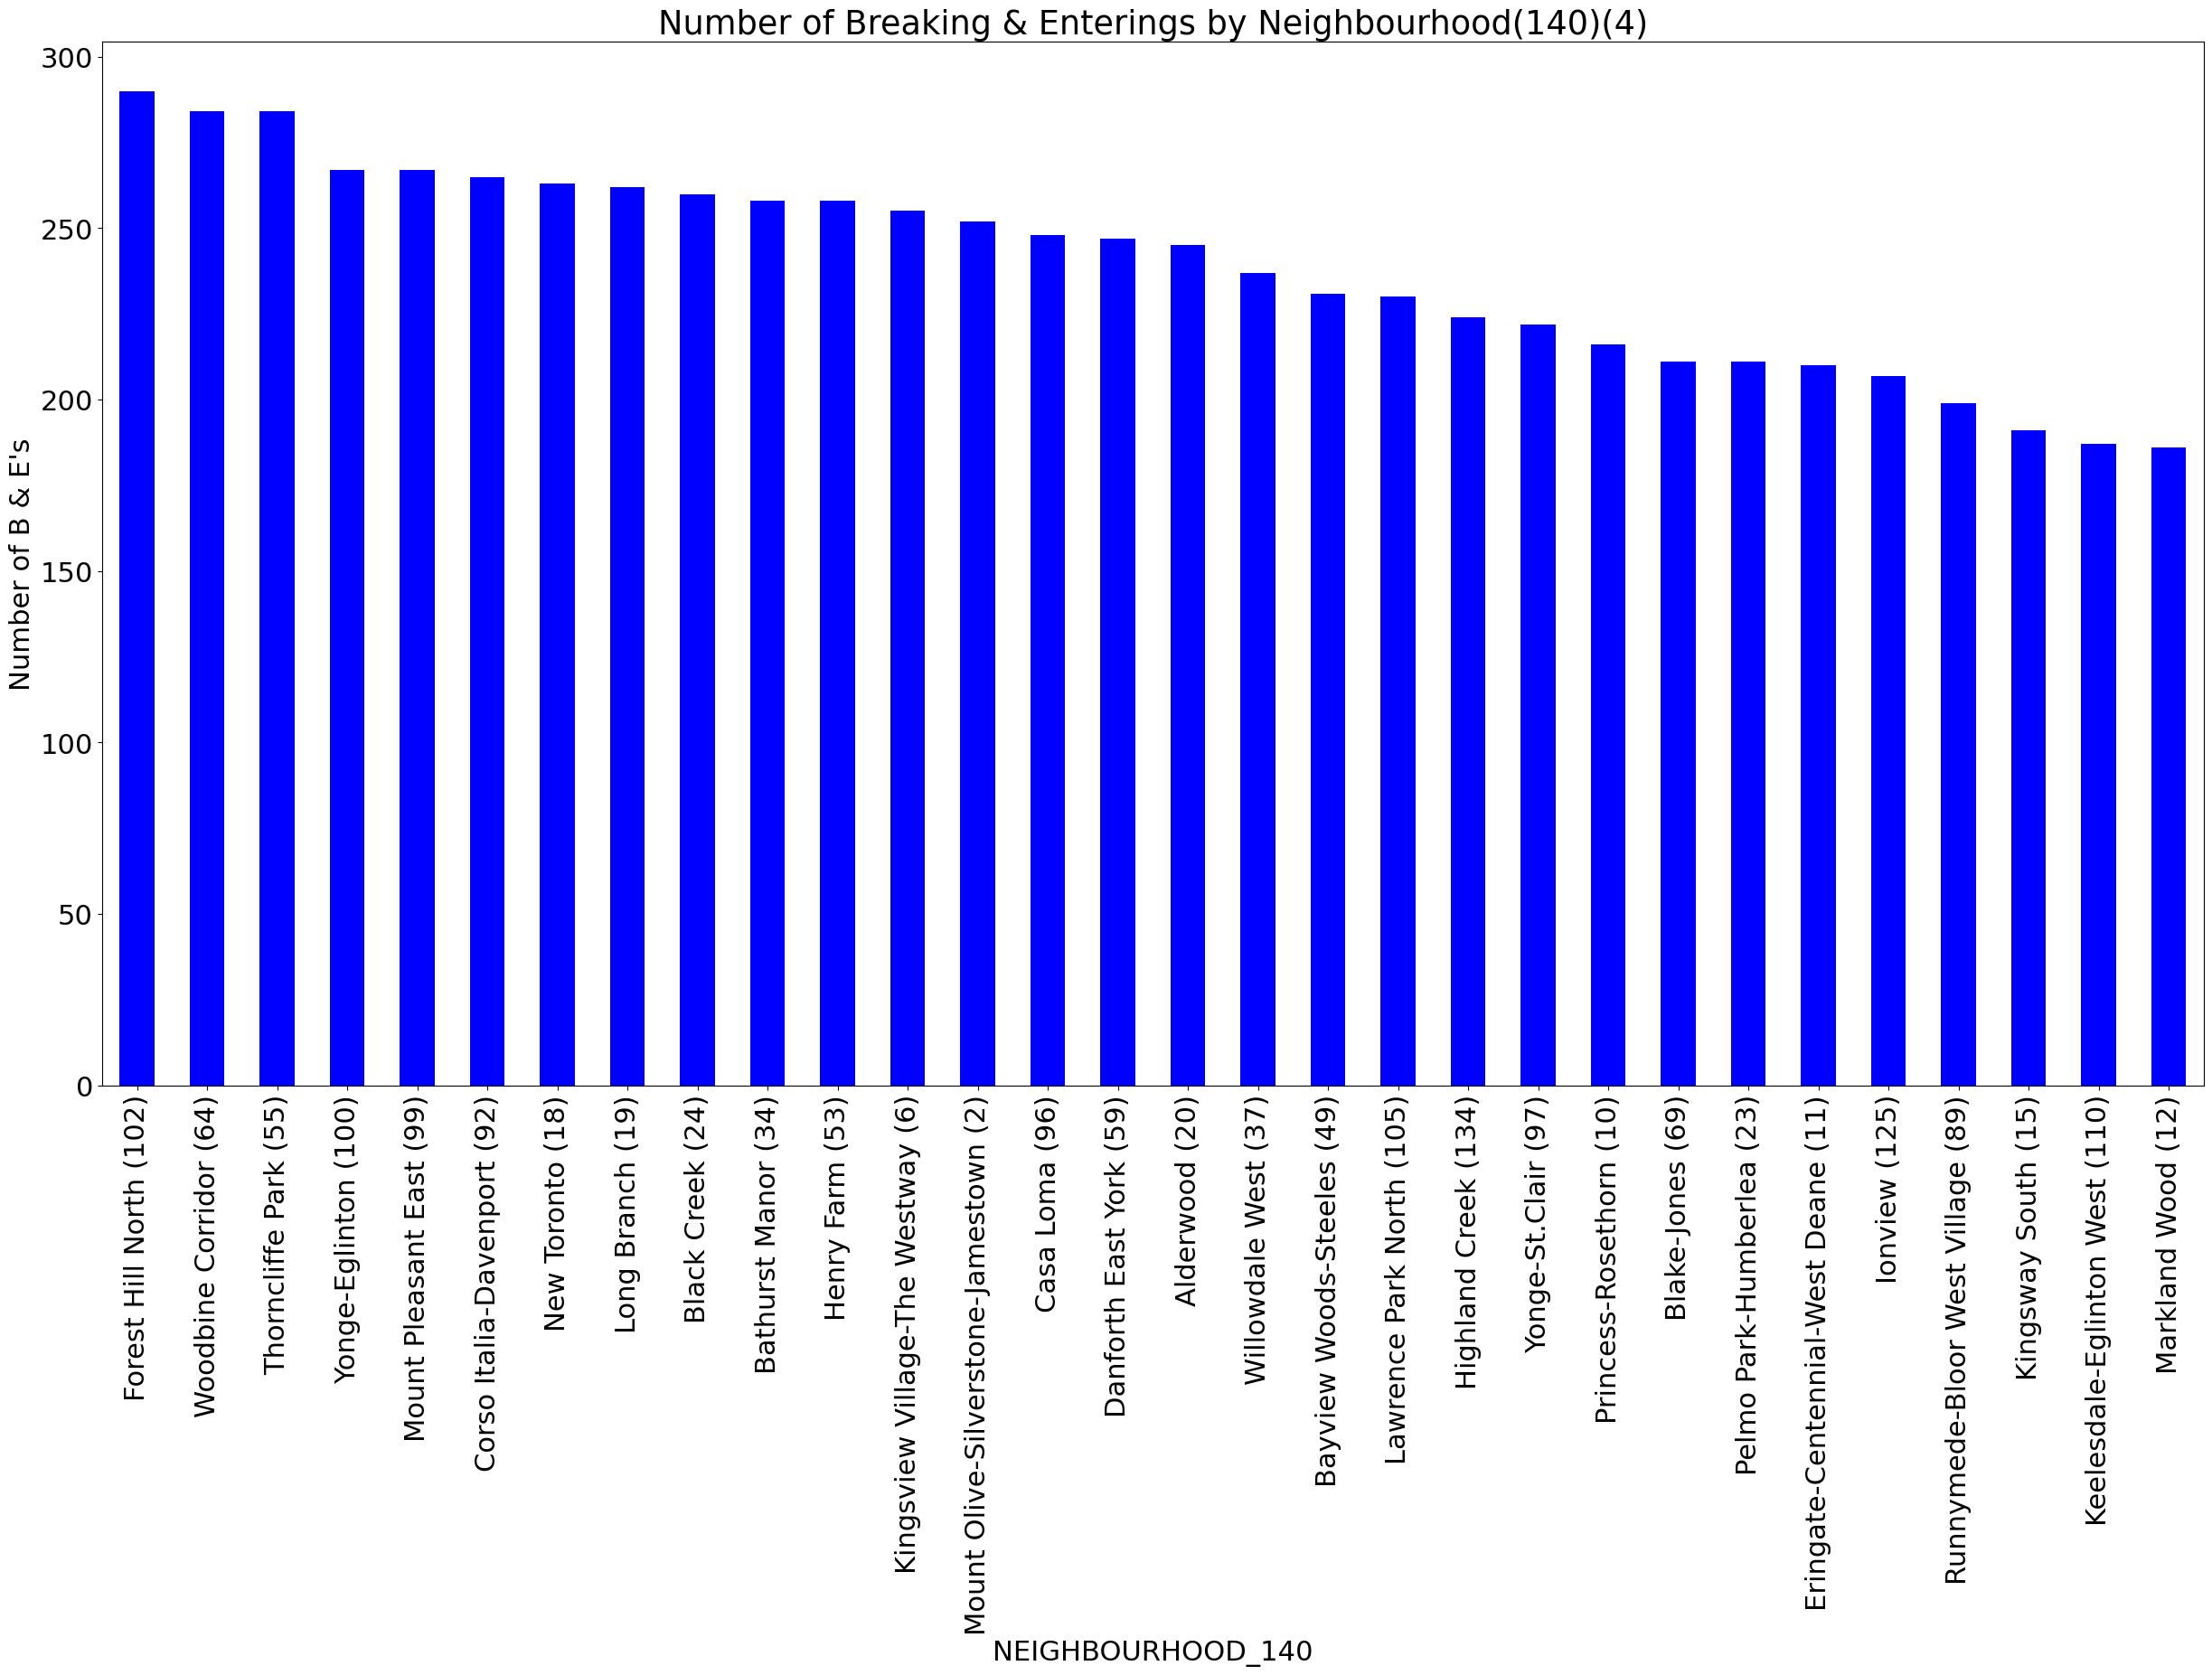

In [36]:
plot_pandas15 = b_e_by_hood_count[91:121].plot.bar(color='b')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking & Enterings by Neighbourhood(140)(4)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

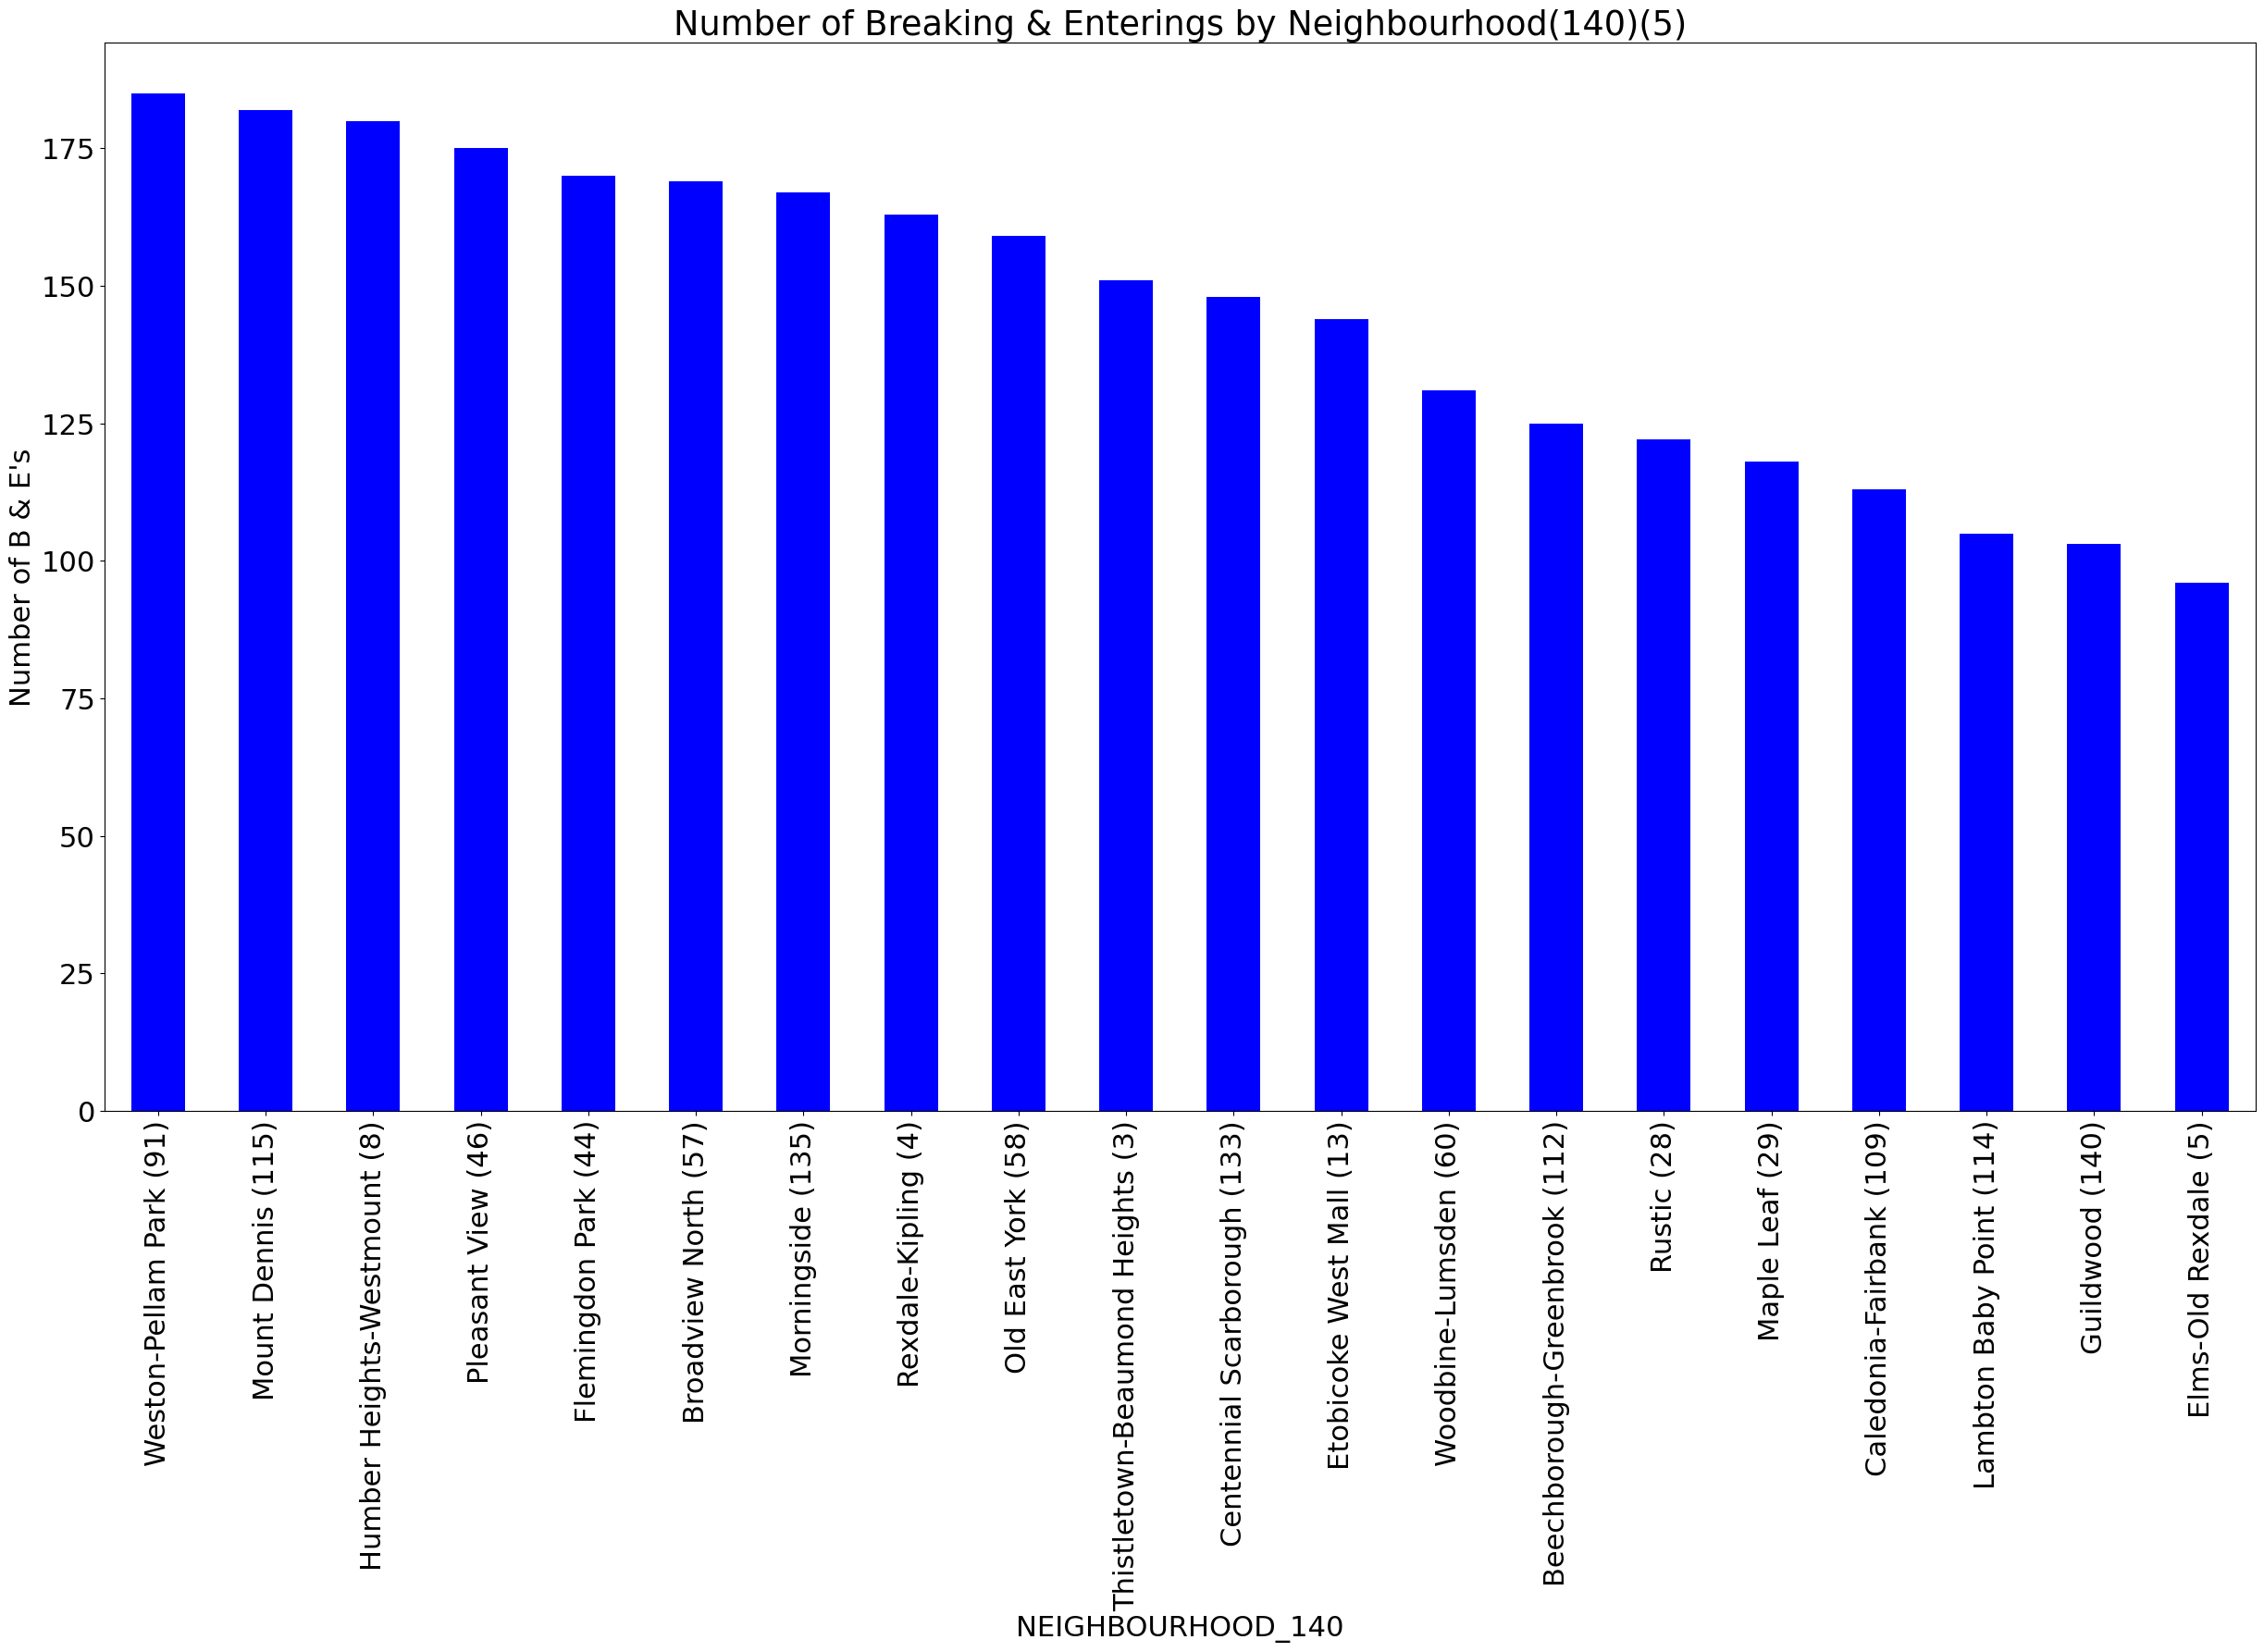

In [37]:
plot_pandas16 = b_e_by_hood_count[121:141].plot.bar(color='b')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of B & E's")
plt.title("Number of Breaking & Enterings by Neighbourhood(140)(5)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

## Robbery Visualizations

In [38]:
# Generate a bar plot showing the total number of robberies by offence type
offence_count3 = robbery_metadata["OFFENCE"].value_counts()
offence_count3

Robbery - Mugging                8663
Robbery With Weapon              5144
Robbery - Other                  5108
Robbery - Business               4657
Robbery - Swarming               2338
Robbery - Home Invasion          1179
Robbery - Purse Snatch           1074
Robbery - Financial Institute     943
Robbery - Vehicle Jacking         929
Robbery - Delivery Person         283
Robbery - Taxi                    260
Robbery - Atm                     106
Robbery - Armoured Car             52
Robbery To Steal Firearm            2
Name: OFFENCE, dtype: int64

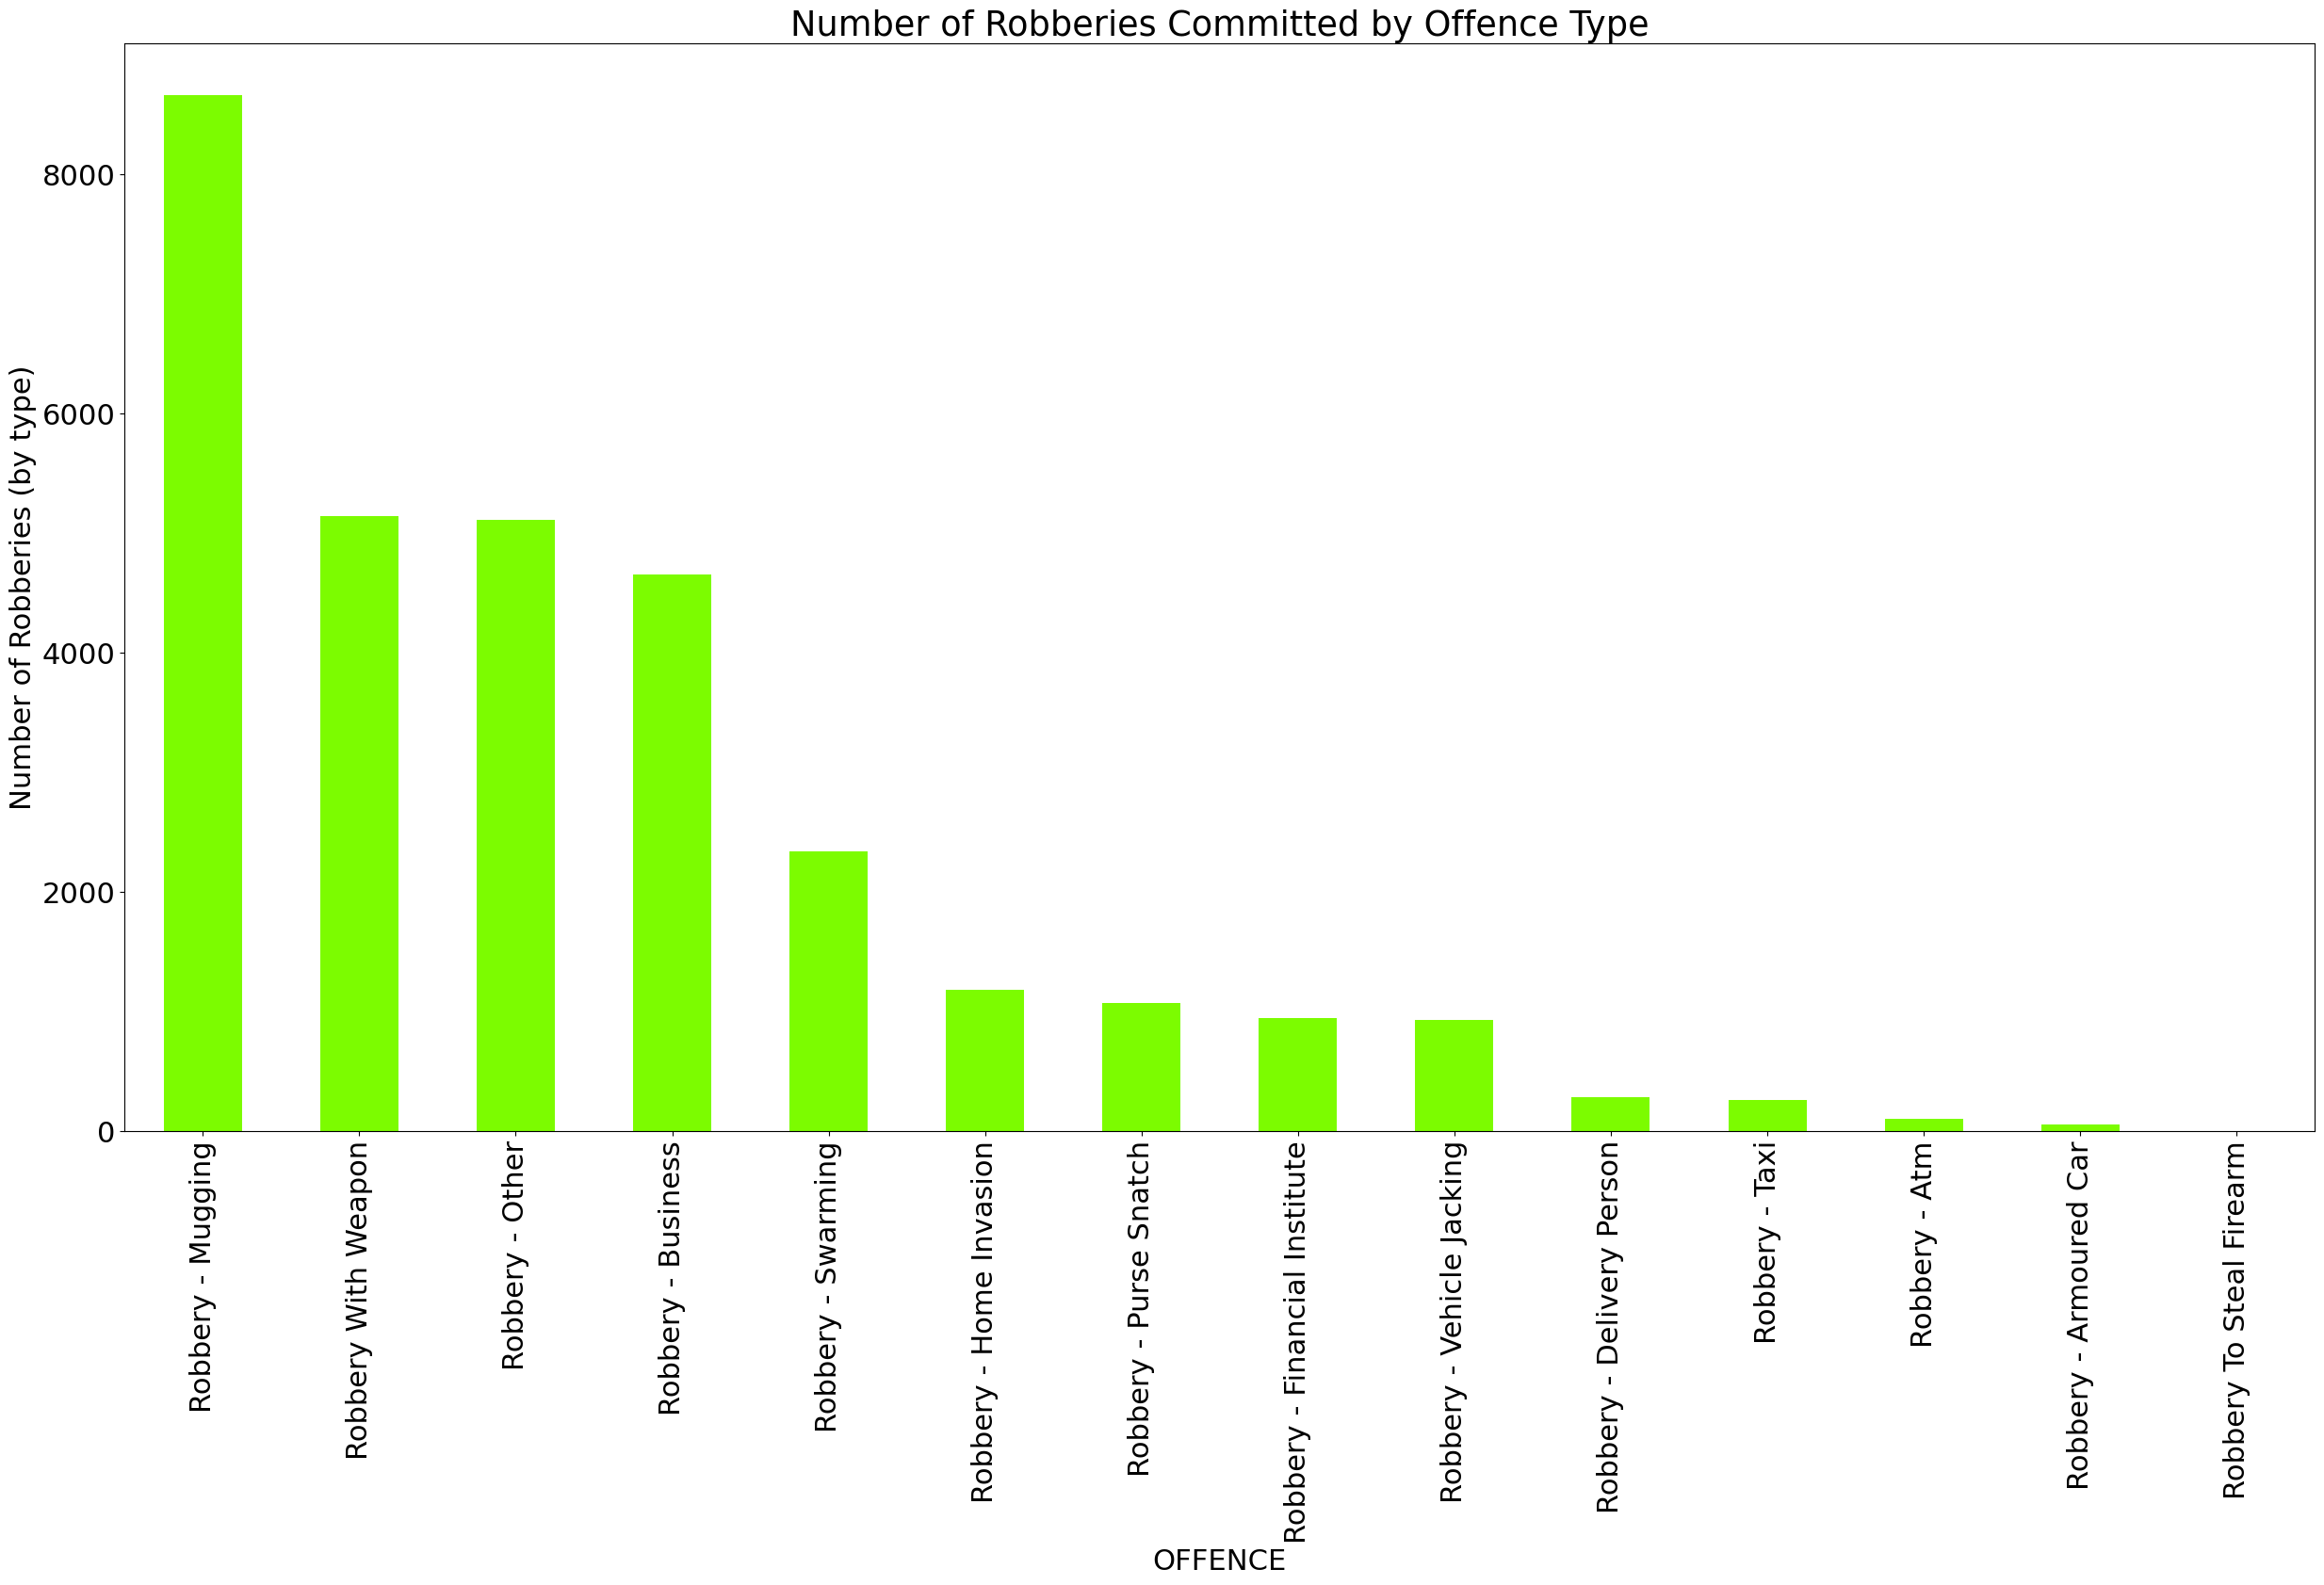

In [39]:
plot_pandas17 = offence_count3.plot.bar(color='lawngreen')  
plt.xlabel("OFFENCE")
plt.ylabel("Number of Robberies (by type)")
plt.title("Number of Robberies Committed by Offence Type")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'font.size': 15})

In [40]:
# Generate a bar plot showing the total number of robberies by month
robbery_month_count = robbery_metadata["REPORT_MONTH"].value_counts()
robbery_month_count

October      2917
November     2734
January      2650
September    2617
July         2595
August       2593
May          2565
March        2560
June         2463
April        2366
December     2356
February     2322
Name: REPORT_MONTH, dtype: int64

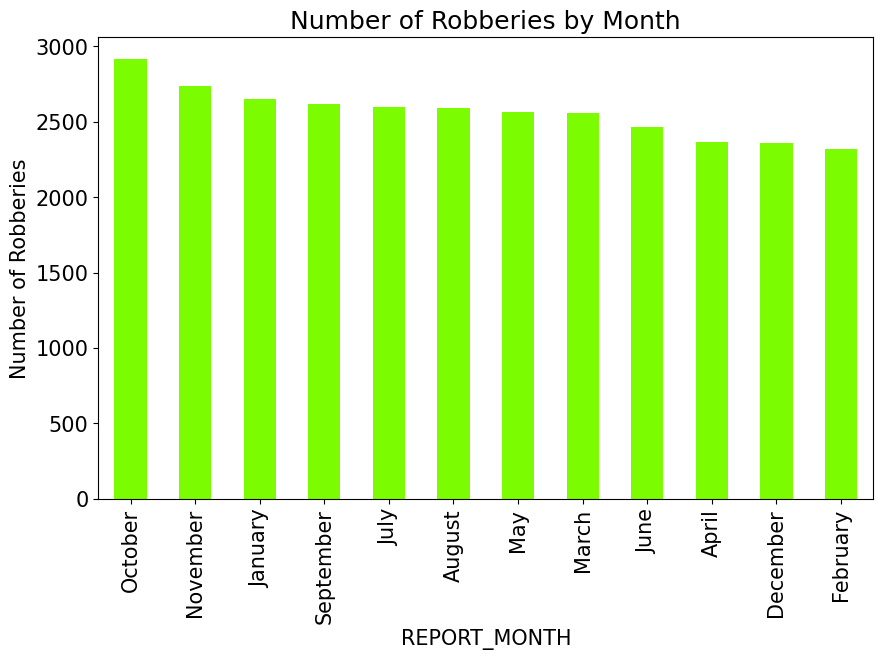

In [41]:
plot_pandas18 = robbery_month_count.plot.bar(color='lawngreen')  
plt.xlabel("REPORT_MONTH")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Month")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [42]:
# Generate a bar plot showing the total number of robberies by year
robberies_year_count = robbery_metadata["REPORT_YEAR"].value_counts()
robberies_year_count

2017    4104
2014    3786
2016    3777
2018    3754
2019    3721
2015    3530
2022    2916
2020    2858
2021    2292
Name: REPORT_YEAR, dtype: int64

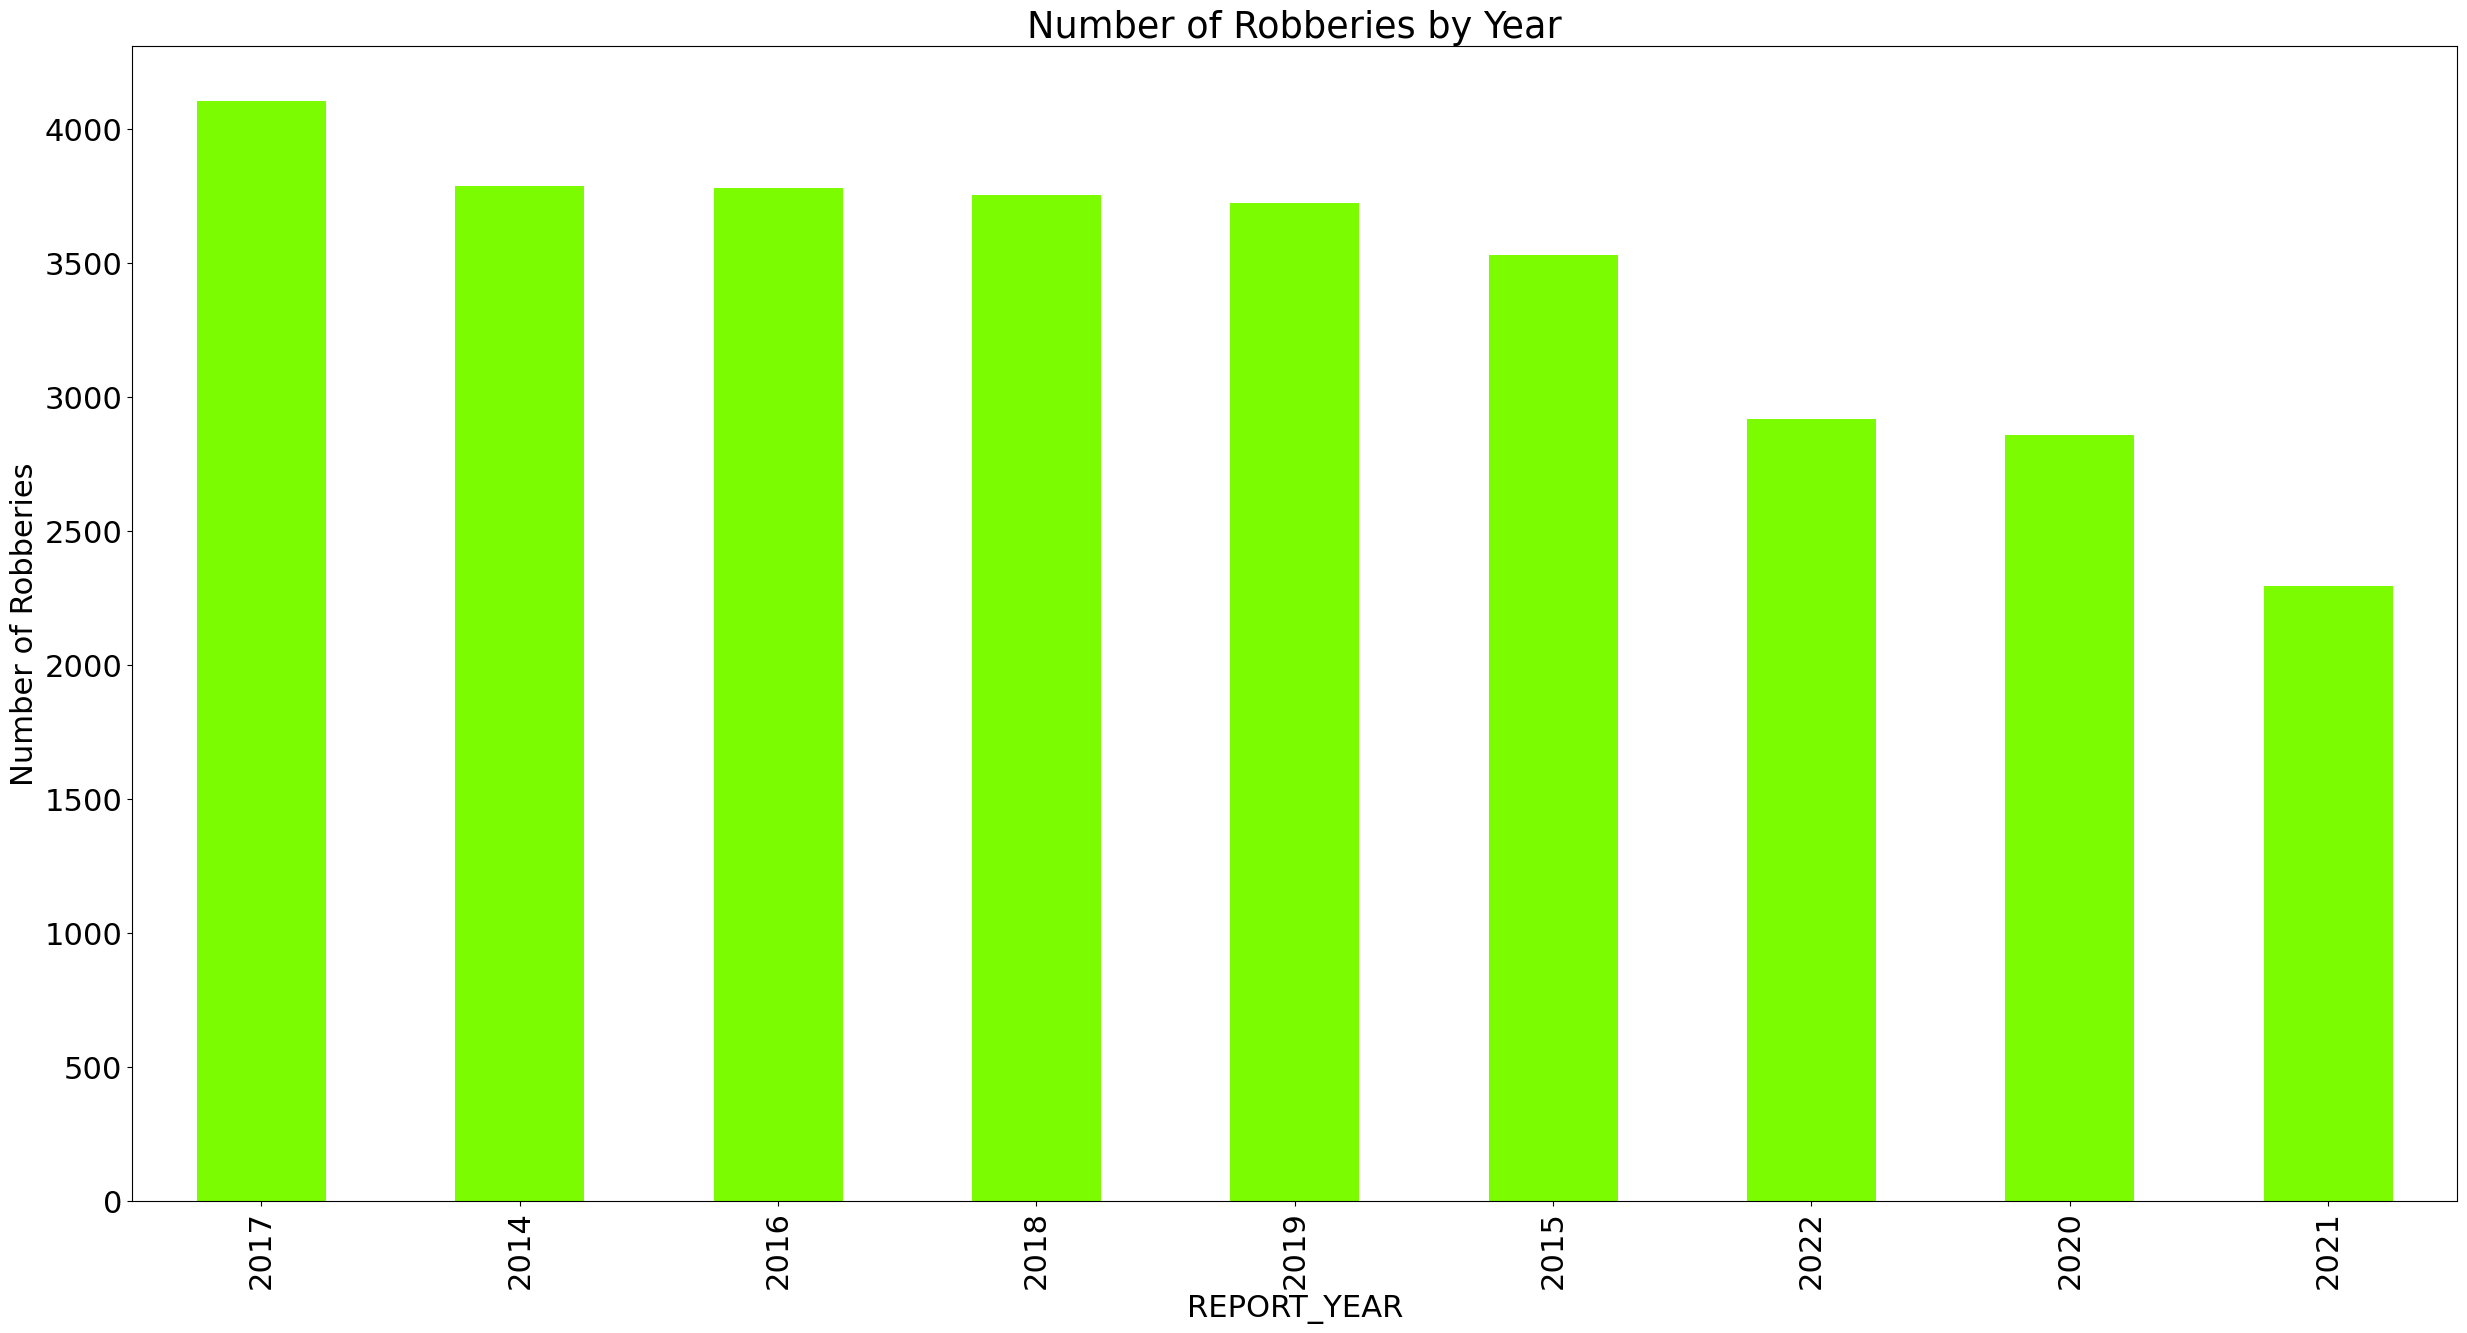

In [43]:
plot_pandas19 = robberies_year_count.plot.bar(color='lawngreen')  
plt.xlabel("REPORT_YEAR")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Year")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [44]:
# Generate a bar plot showing the total number of robberies by Neighbourhood Code
robberies_hood_count = robbery_metadata["NEIGHBOURHOOD_140"].value_counts()
robberies_hood_count

Church-Yonge Corridor (75)                1346
Moss Park (73)                            1046
NSA                                        994
Bay Street Corridor (76)                   790
Waterfront Communities-The Island (77)     770
                                          ... 
Forest Hill South (101)                     40
Bridle Path-Sunnybrook-York Mills (41)      32
Bayview Woods-Steeles (49)                  31
Yonge-St.Clair (97)                         31
Lambton Baby Point (114)                    23
Name: NEIGHBOURHOOD_140, Length: 141, dtype: int64

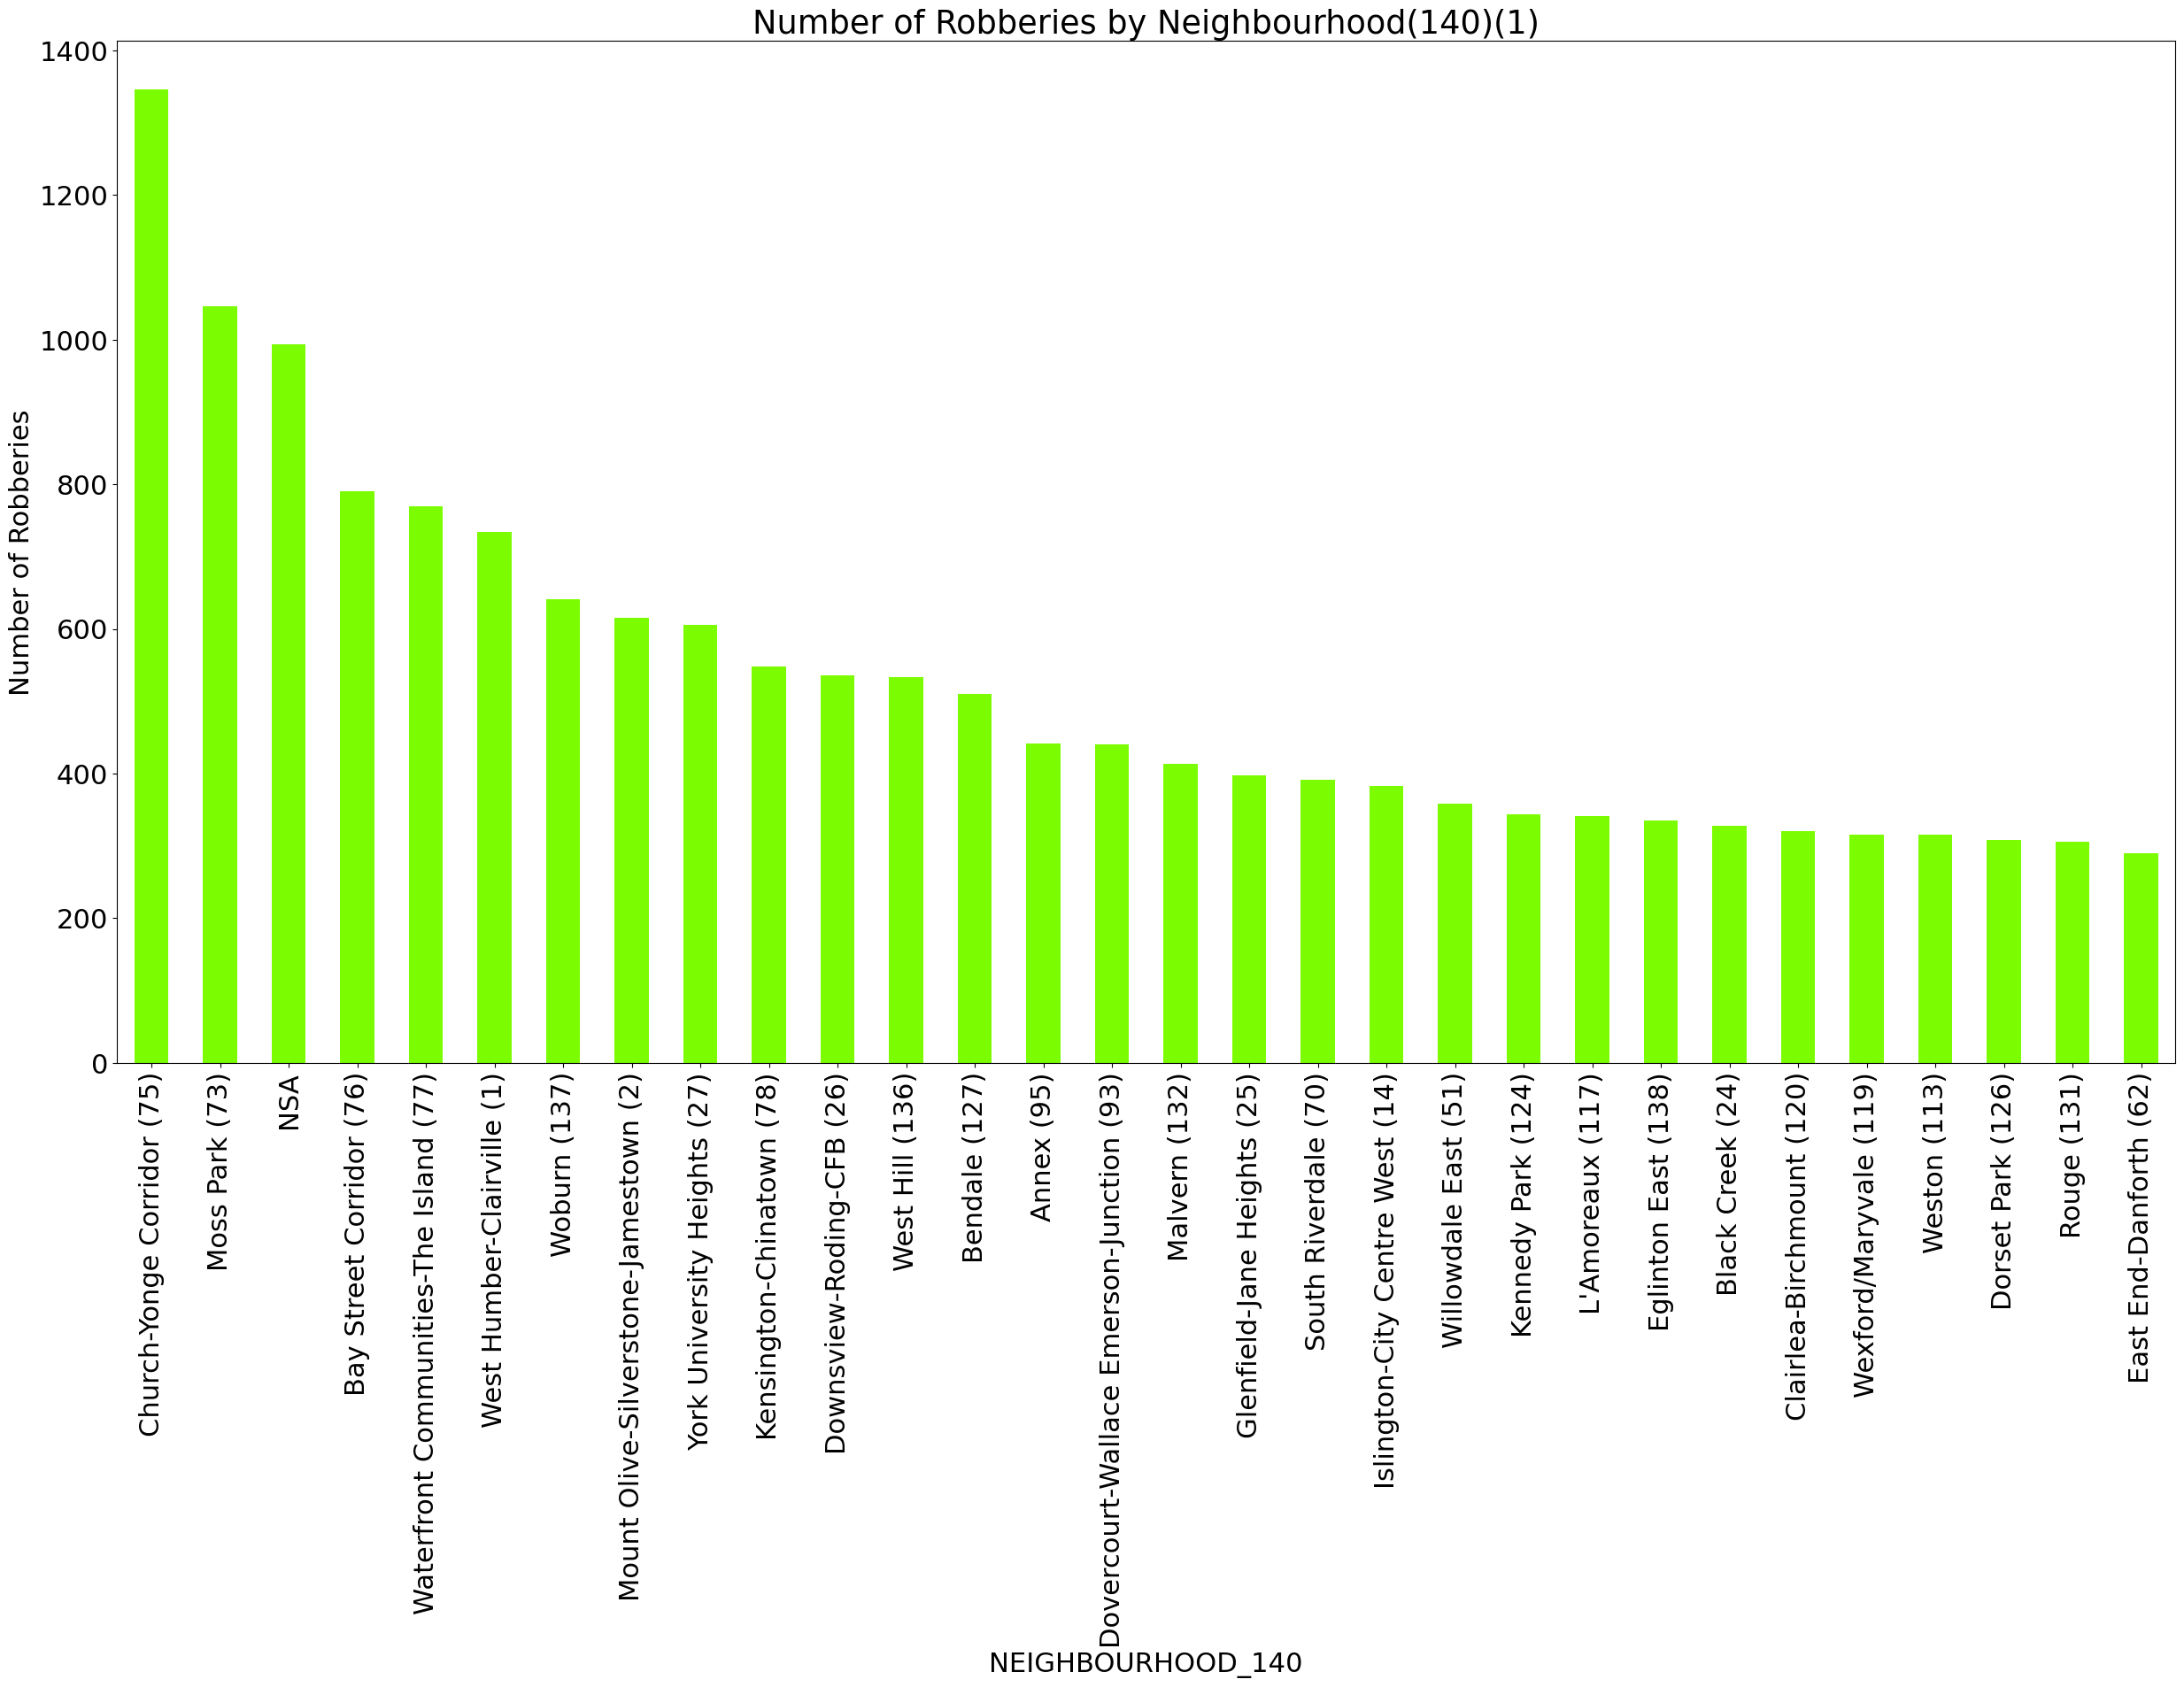

In [45]:
plot_pandas20 = robberies_hood_count[0:30].plot.bar(color='lawngreen')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Neighbourhood(140)(1)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

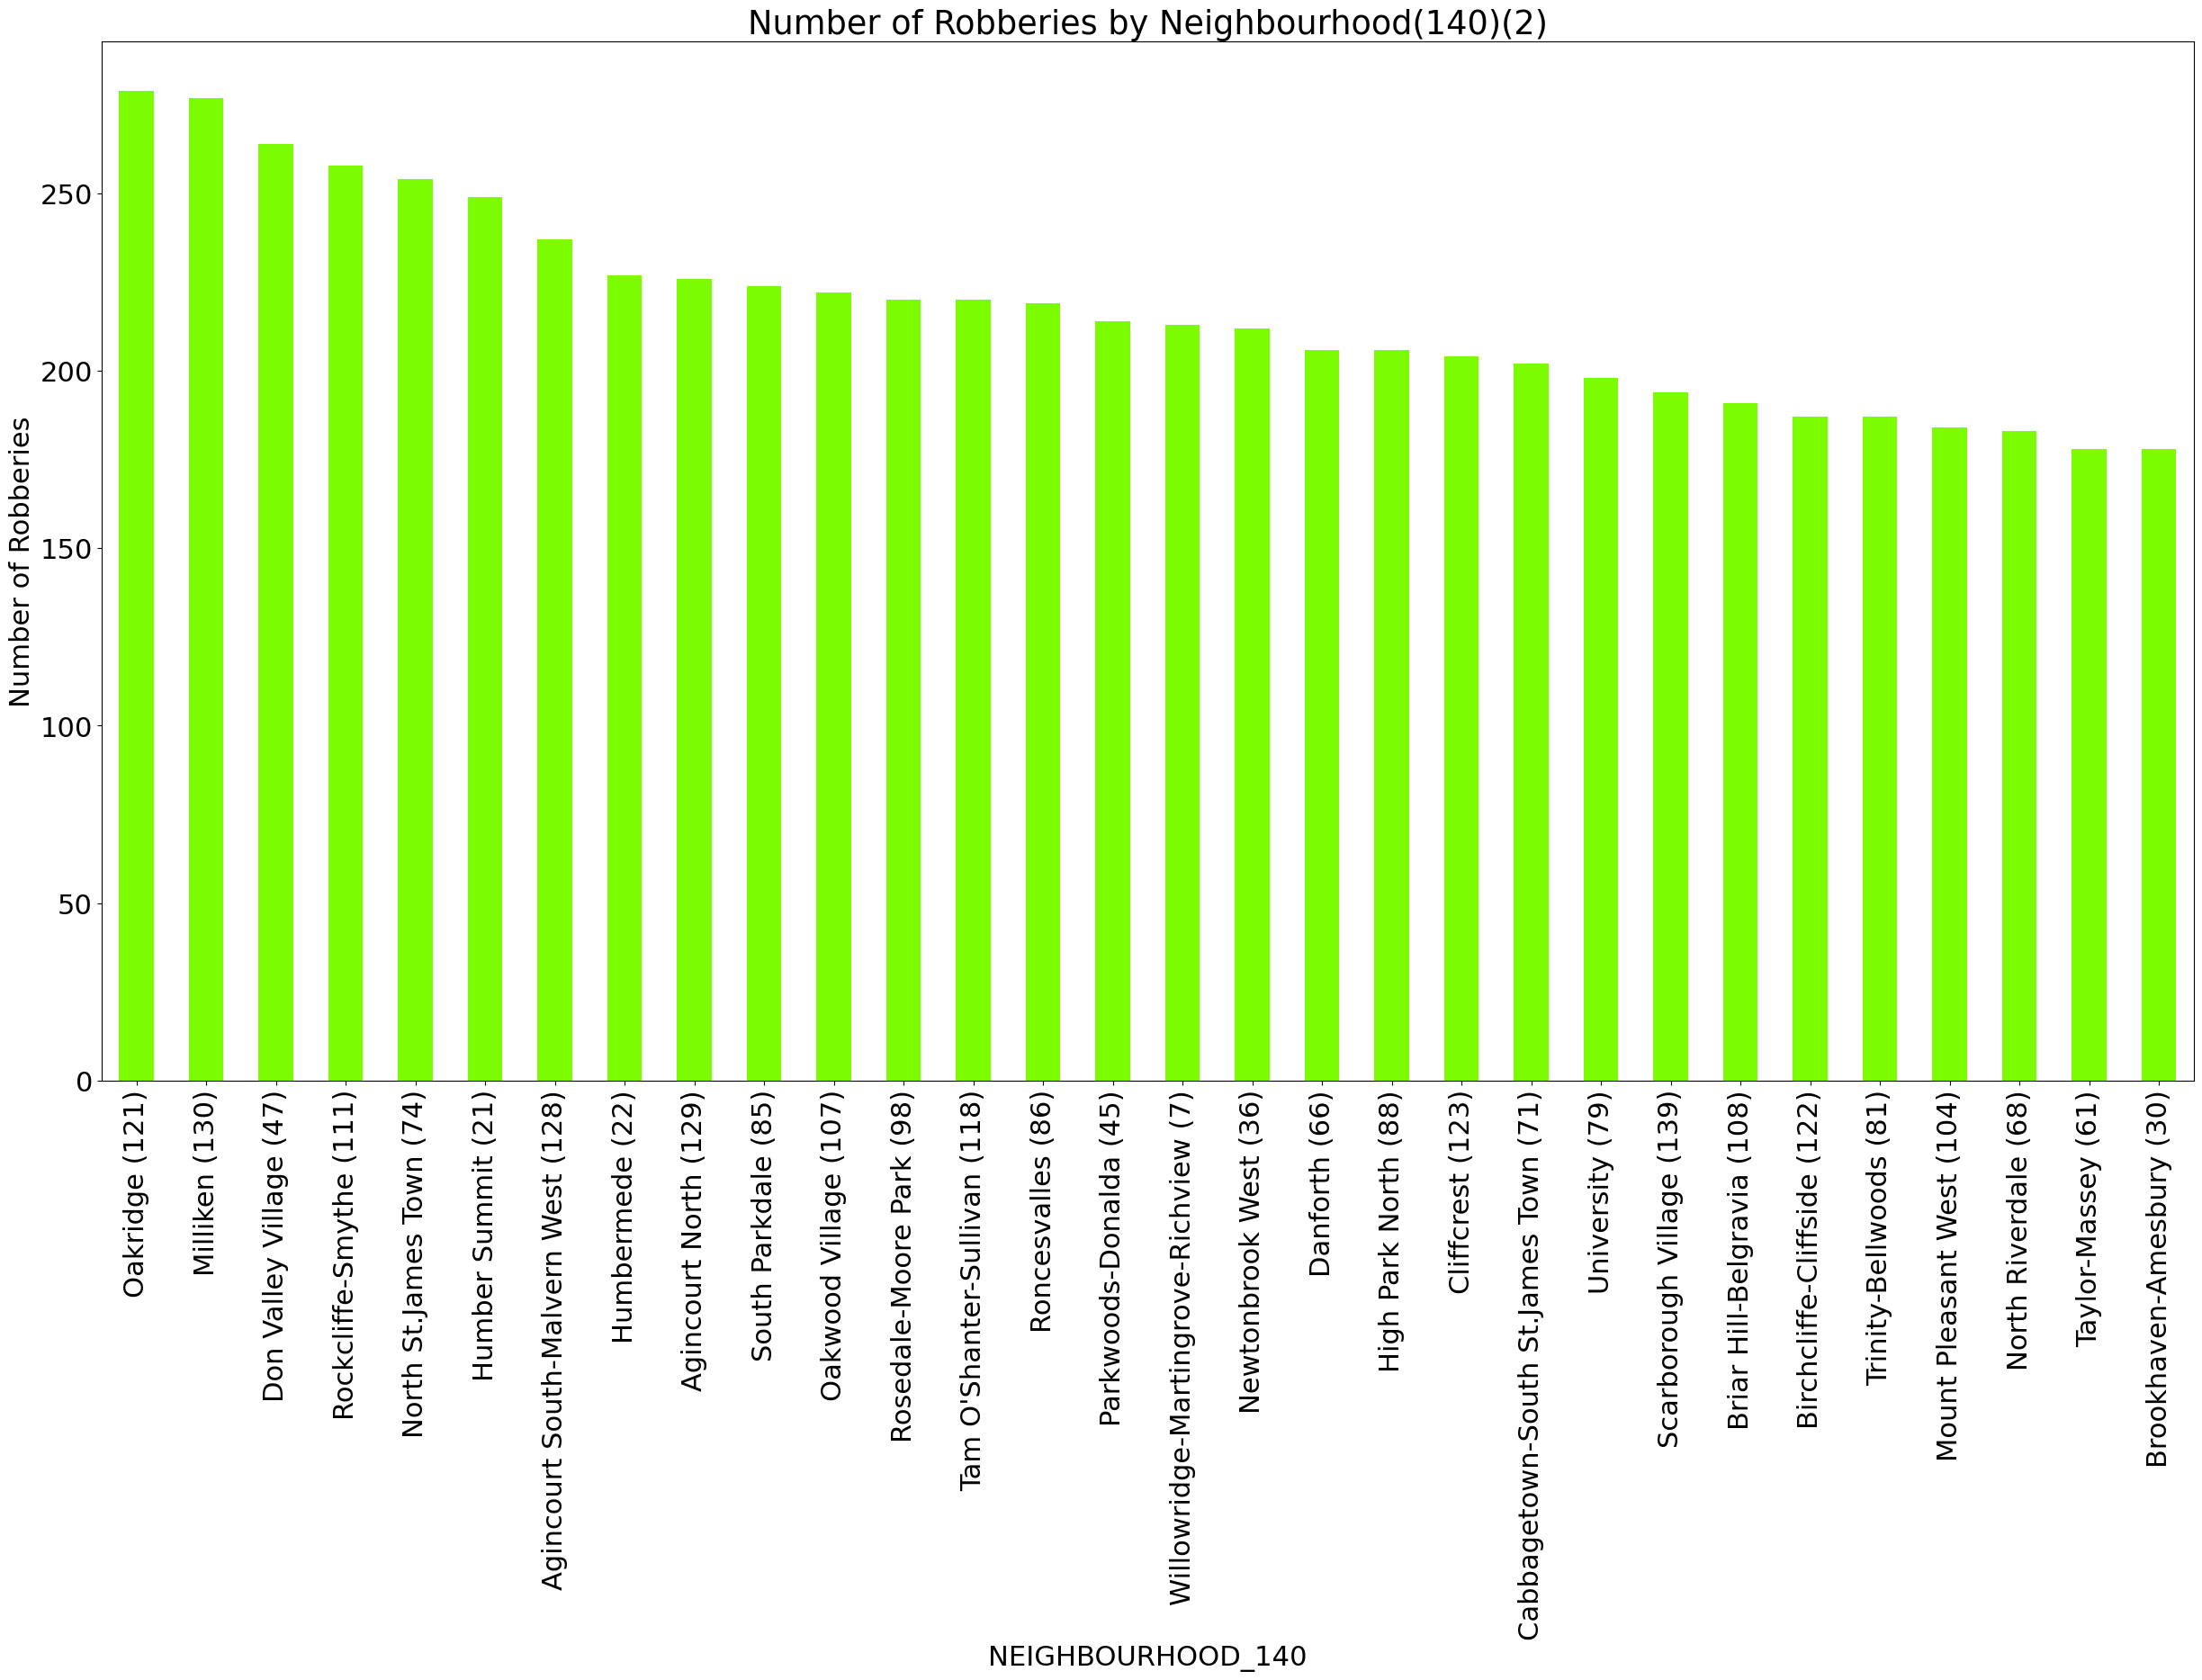

In [46]:
plot_pandas21 = robberies_hood_count[31:61].plot.bar(color='lawngreen')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Neighbourhood(140)(2)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

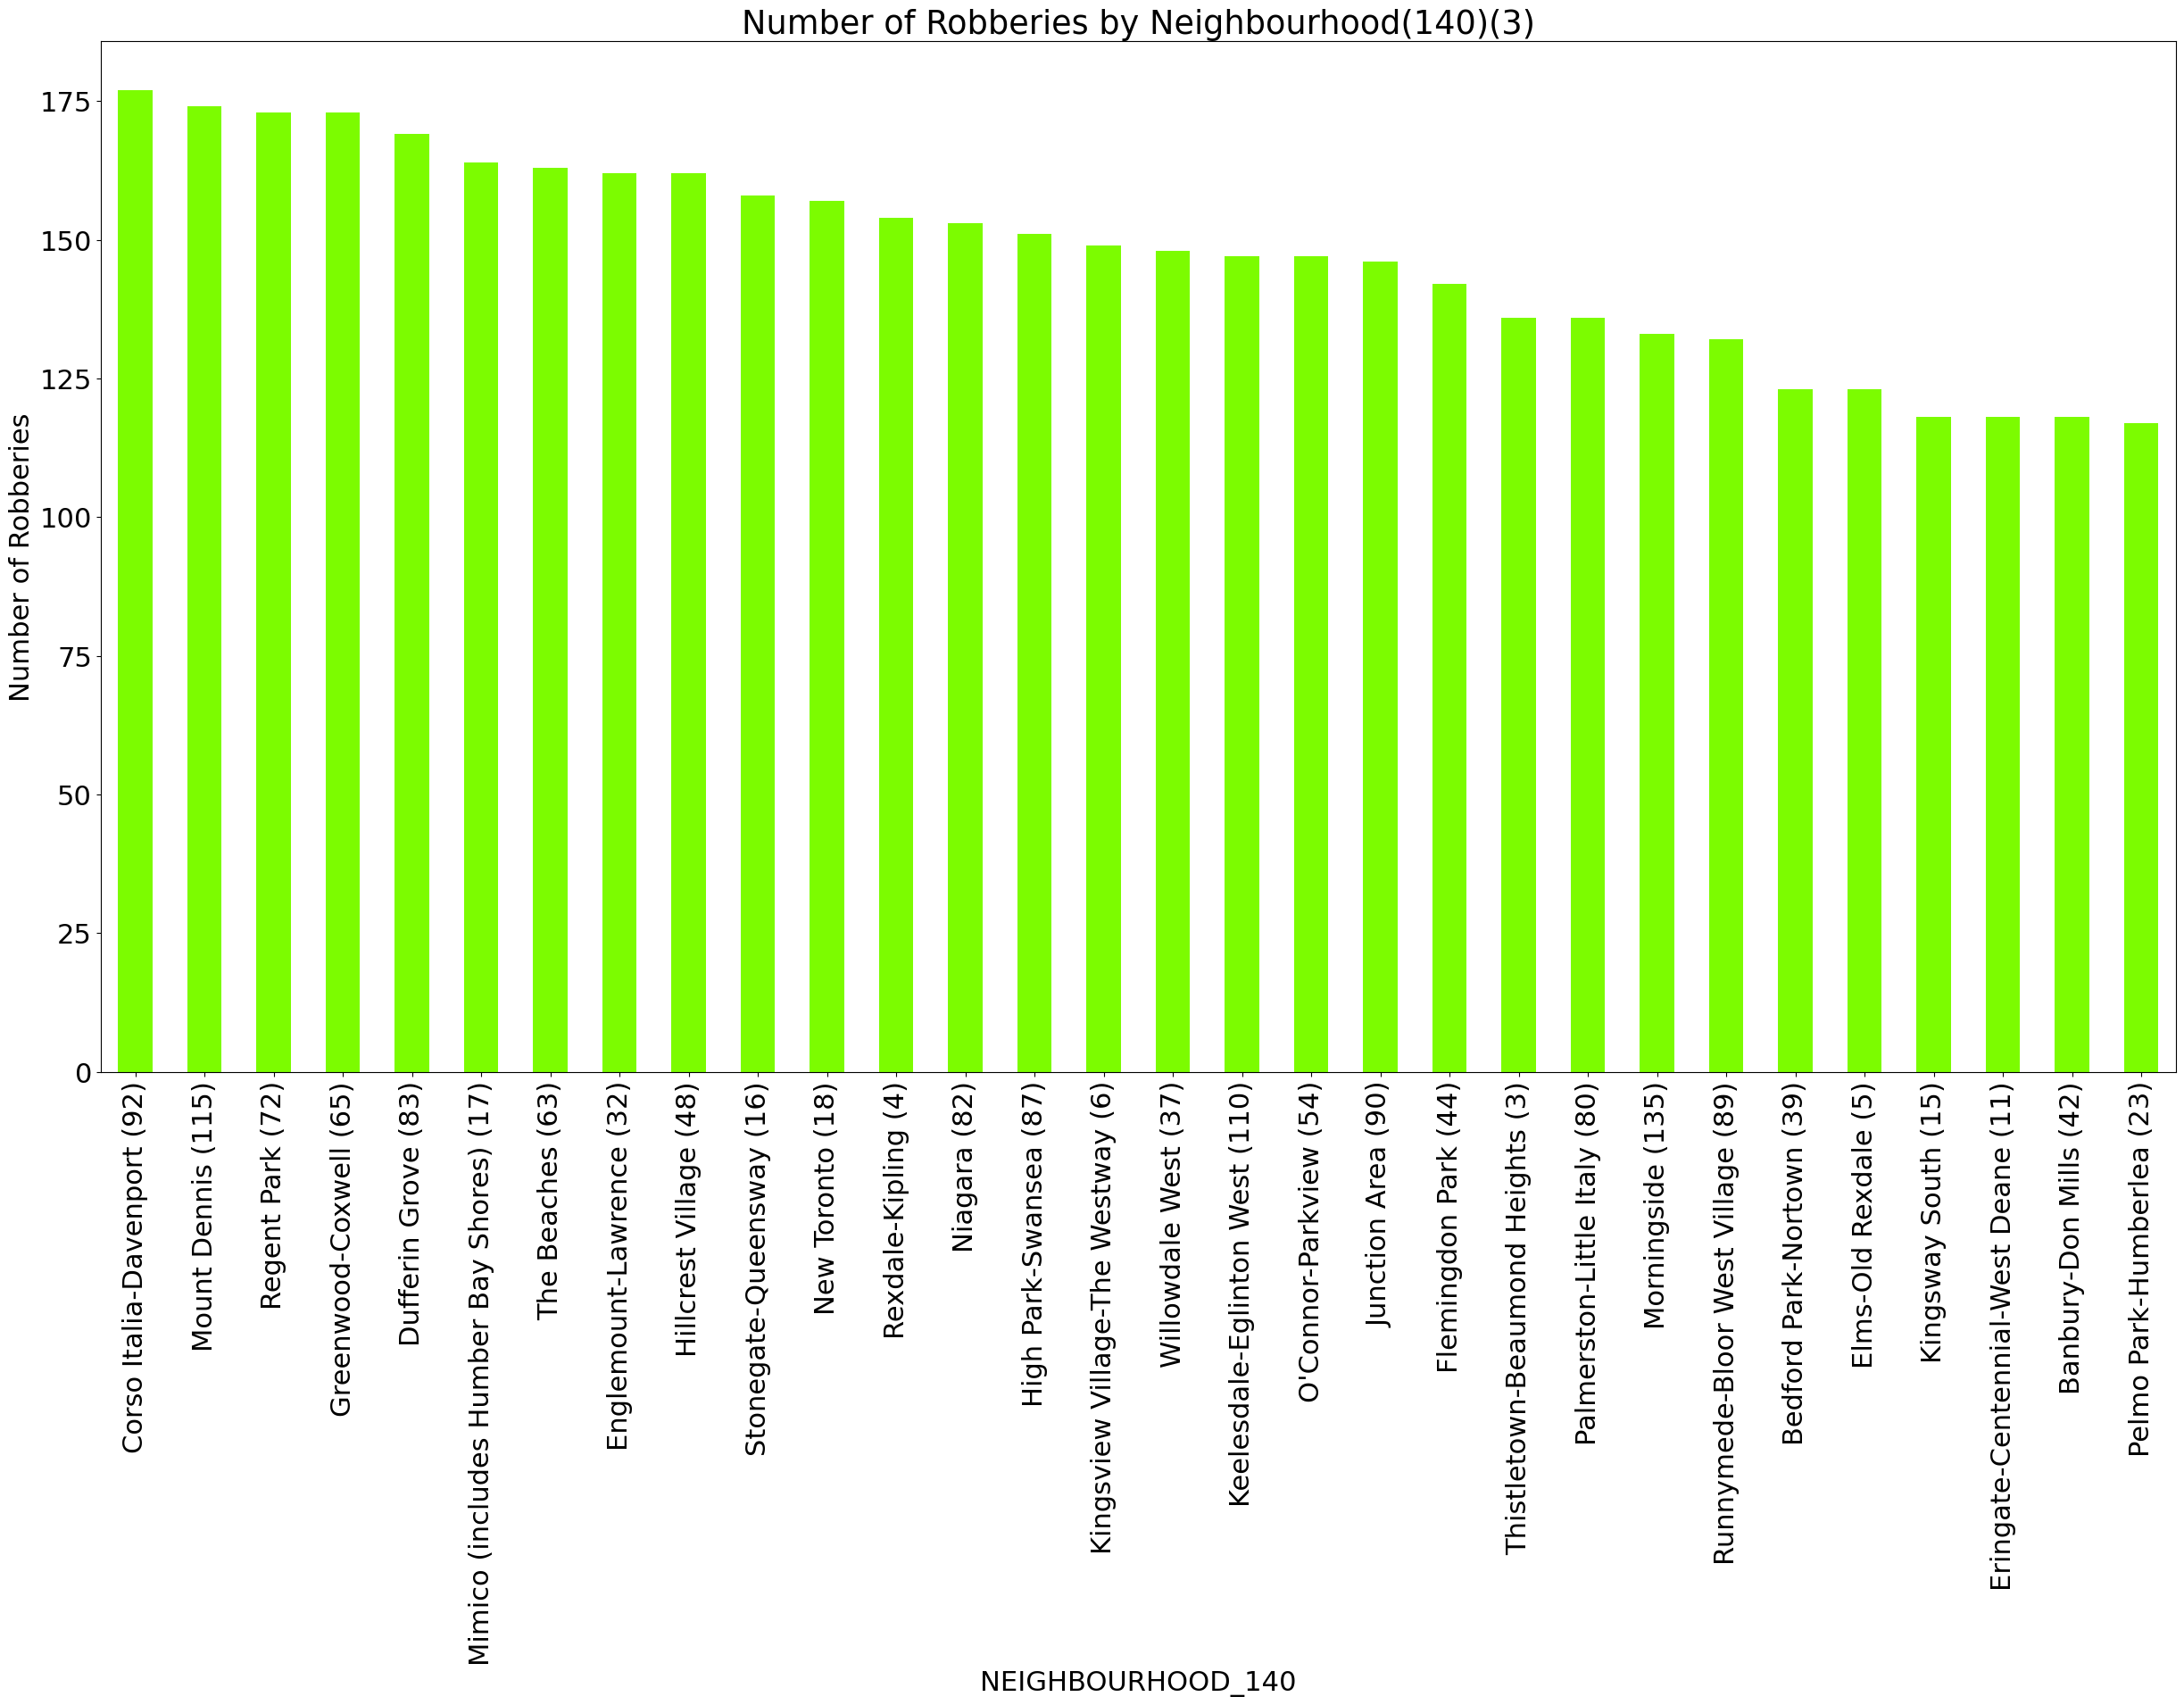

In [47]:
plot_pandas22 = robberies_hood_count[61:91].plot.bar(color='lawngreen')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Neighbourhood(140)(3)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

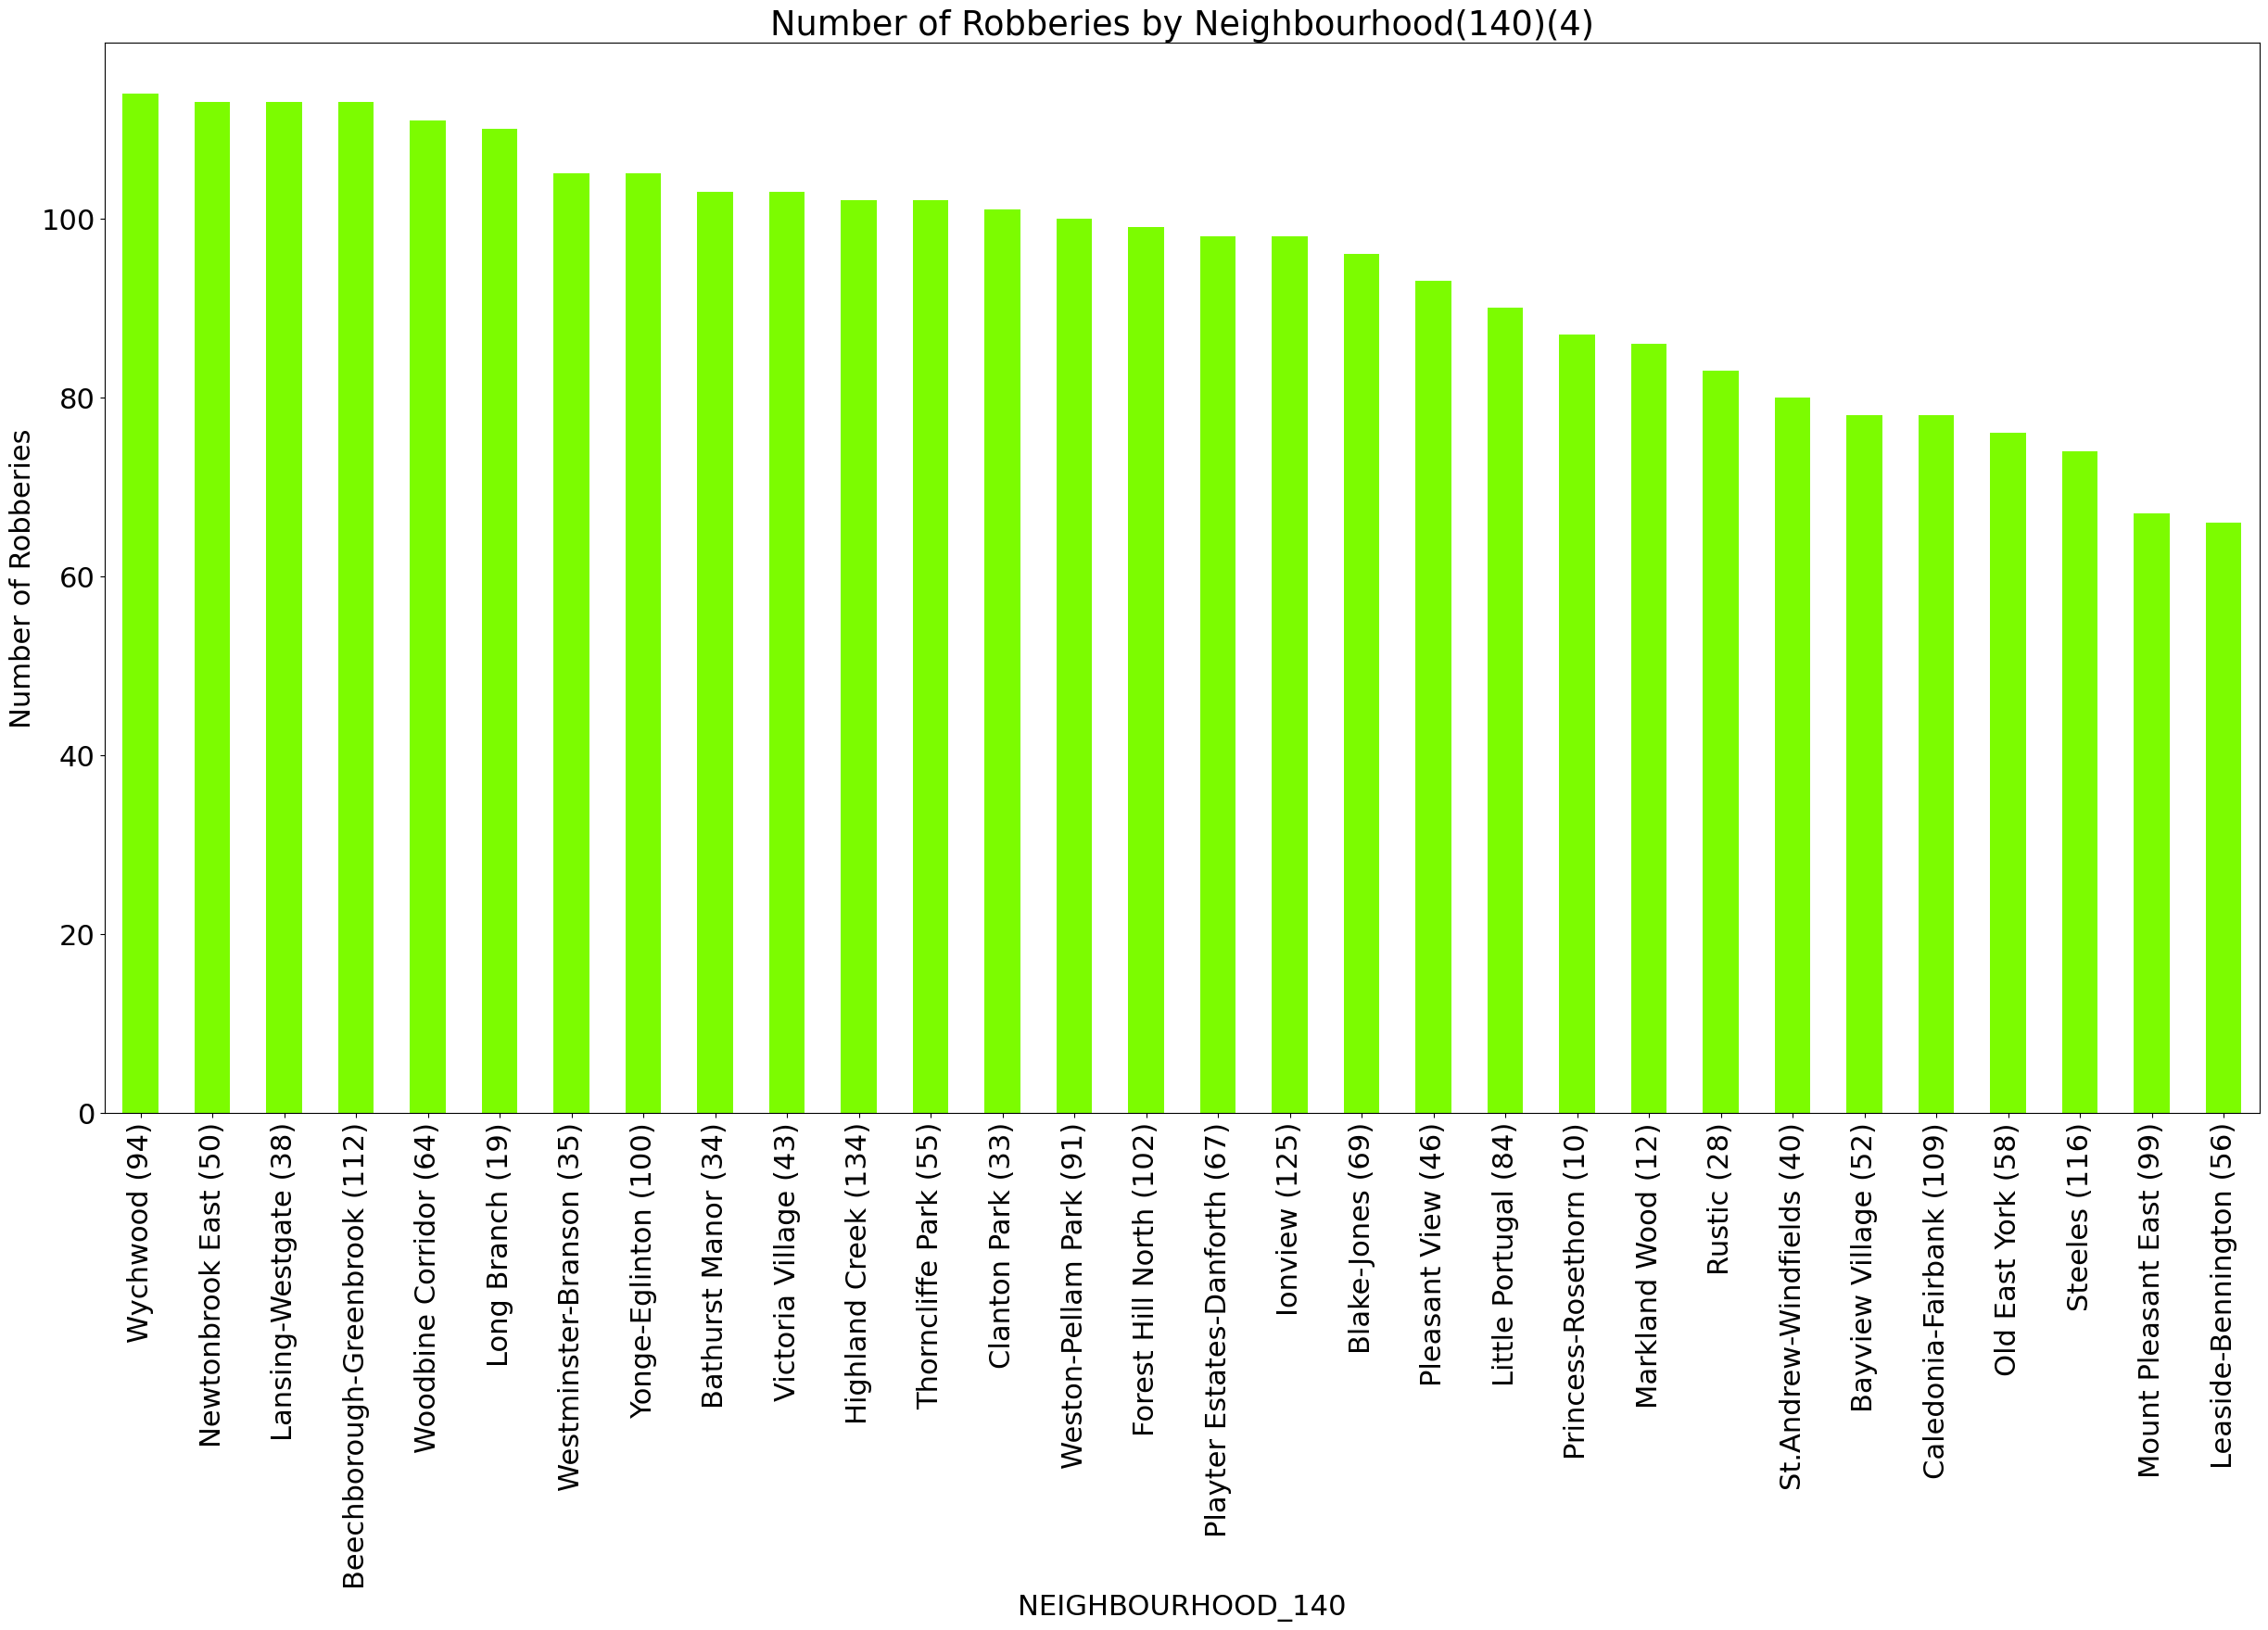

In [48]:
plot_pandas23 = robberies_hood_count[91:121].plot.bar(color='lawngreen')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Neighbourhood(140)(4)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

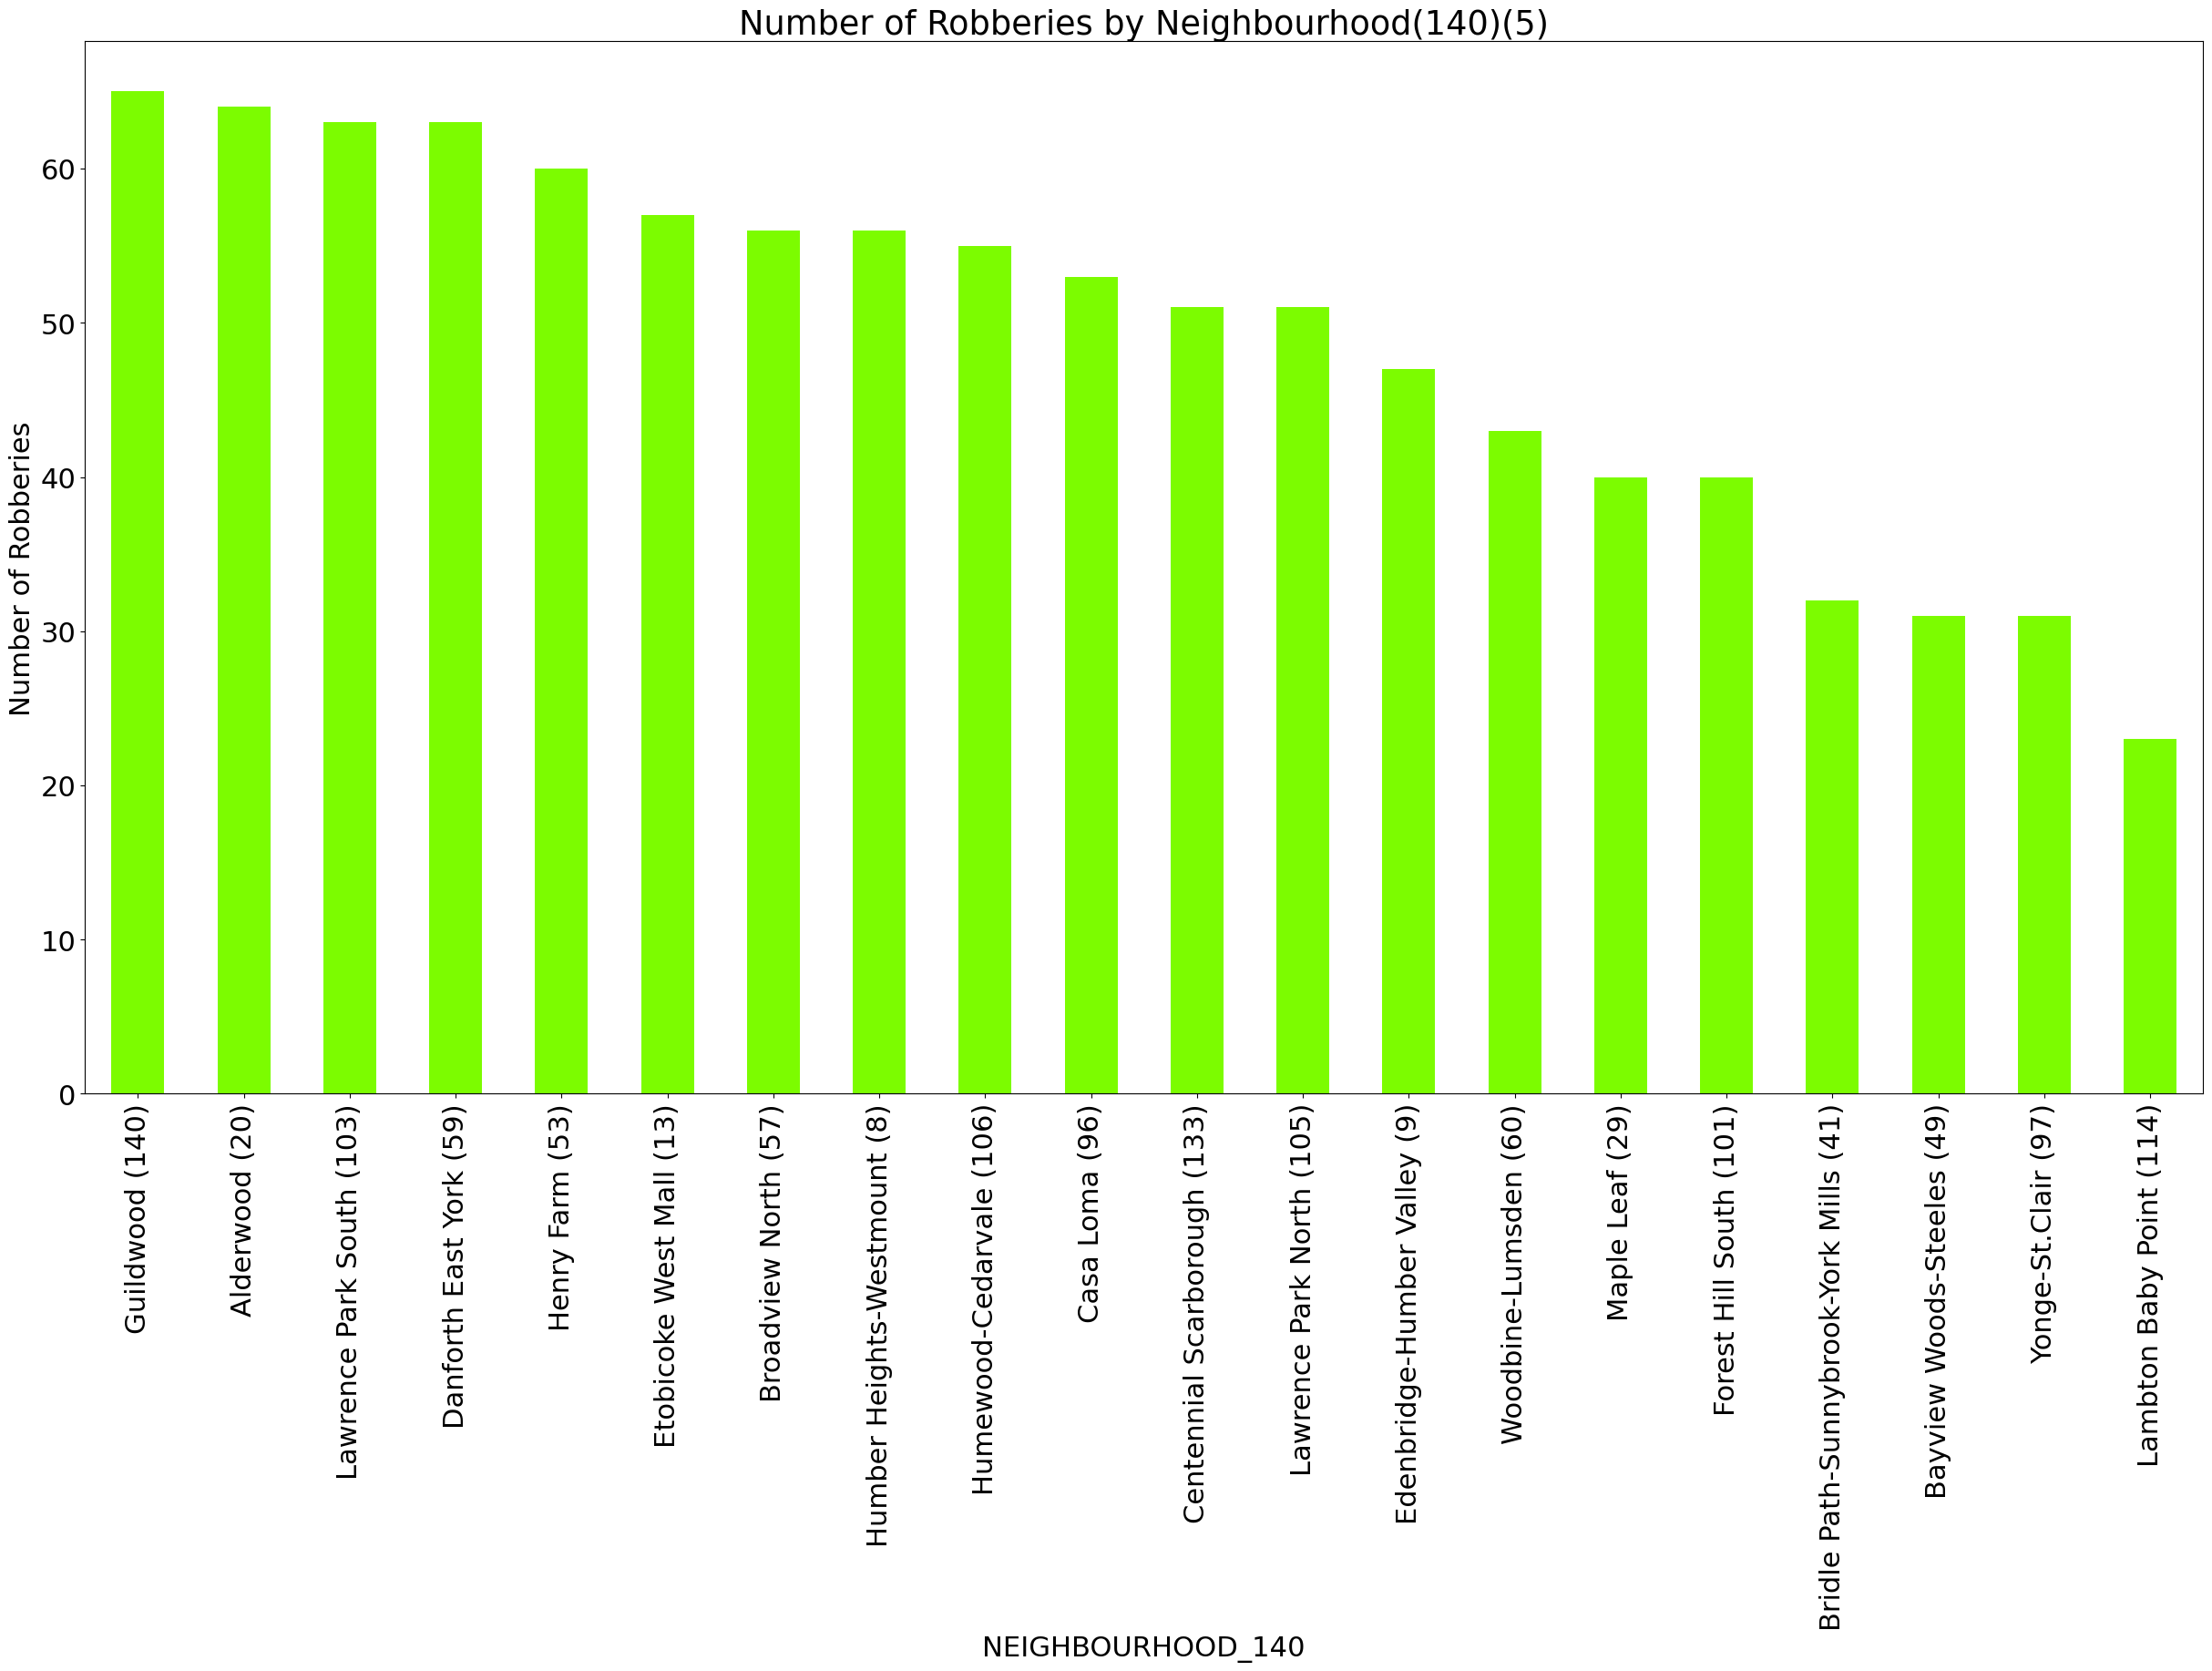

In [49]:
plot_pandas24 = robberies_hood_count[121:141].plot.bar(color='lawngreen')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Robberies")
plt.title("Number of Robberies by Neighbourhood(140)(5)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

## Theft Over Open Visualizations

In [51]:
# Generate a bar plot showing the total number of thefts by offence type
offence_count4 = theft_over_open_metadata["OFFENCE"].value_counts()
offence_count4

Theft Over                       5981
Theft From Motor Vehicle Over    2623
Theft From Mail / Bag / Key      1306
Theft Over - Shoplifting          525
Theft Over - Bicycle              145
Theft Over - Distraction          122
Theft - Misapprop Funds Over       37
Theft Of Utilities Over             6
Name: OFFENCE, dtype: int64

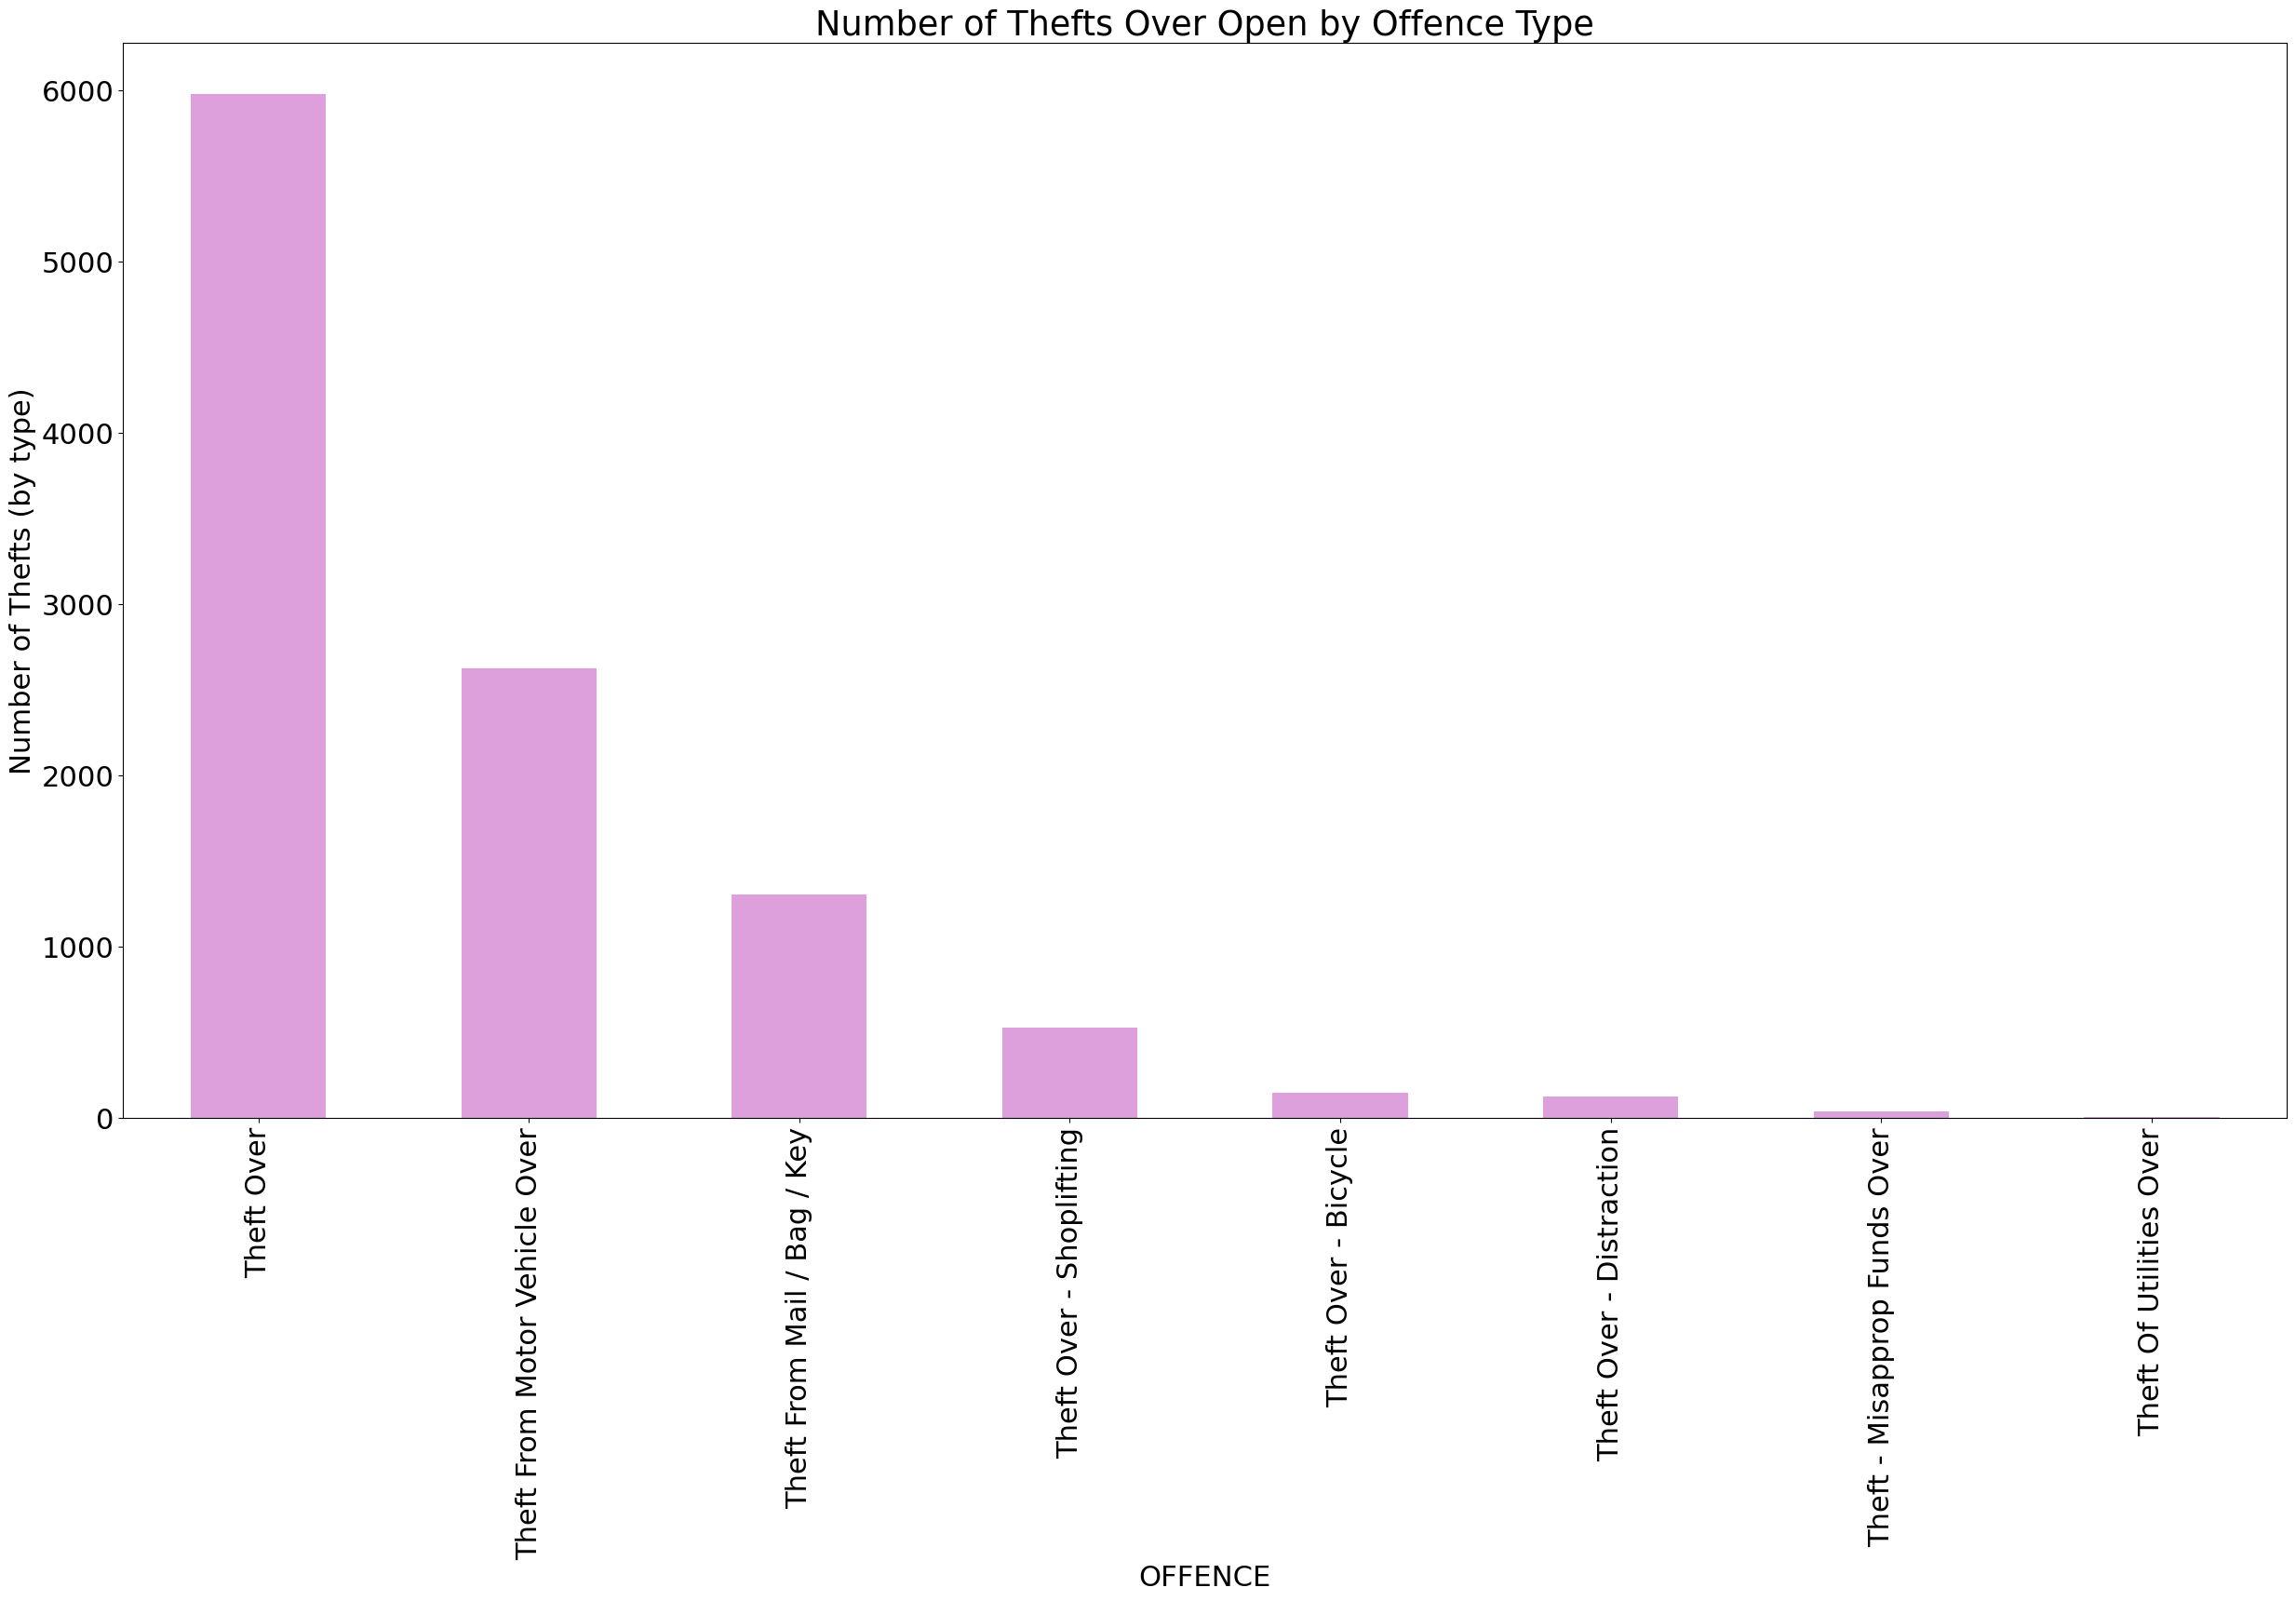

In [52]:
plot_pandas25 = offence_count4.plot.bar(color='plum')  
plt.xlabel("OFFENCE")
plt.ylabel("Number of Thefts (by type)")
plt.title("Number of Thefts Over Open by Offence Type")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'font.size': 15})

In [53]:
# Generate a bar plot showing the total number of thefts by month
theft_month_count = theft_over_open_metadata["REPORT_MONTH"].value_counts()
theft_month_count

August       977
November     975
September    972
July         962
May          954
October      941
December     894
June         855
March        839
January      828
April        827
February     721
Name: REPORT_MONTH, dtype: int64

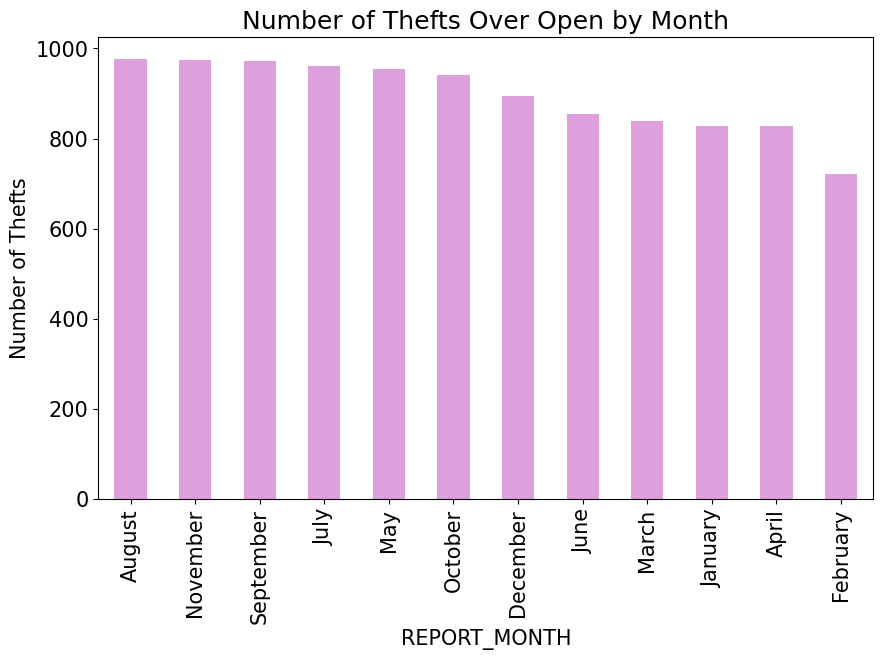

In [54]:
plot_pandas26 = theft_month_count.plot.bar(color='plum')  
plt.xlabel("REPORT_MONTH")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Month")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [55]:
# Generate a bar plot showing the total number of thefts by year
theft_year_count = theft_over_open_metadata["REPORT_YEAR"].value_counts()
theft_year_count

2022    1484
2019    1398
2018    1260
2020    1228
2017    1191
2021    1079
2016    1052
2015    1047
2014    1006
Name: REPORT_YEAR, dtype: int64

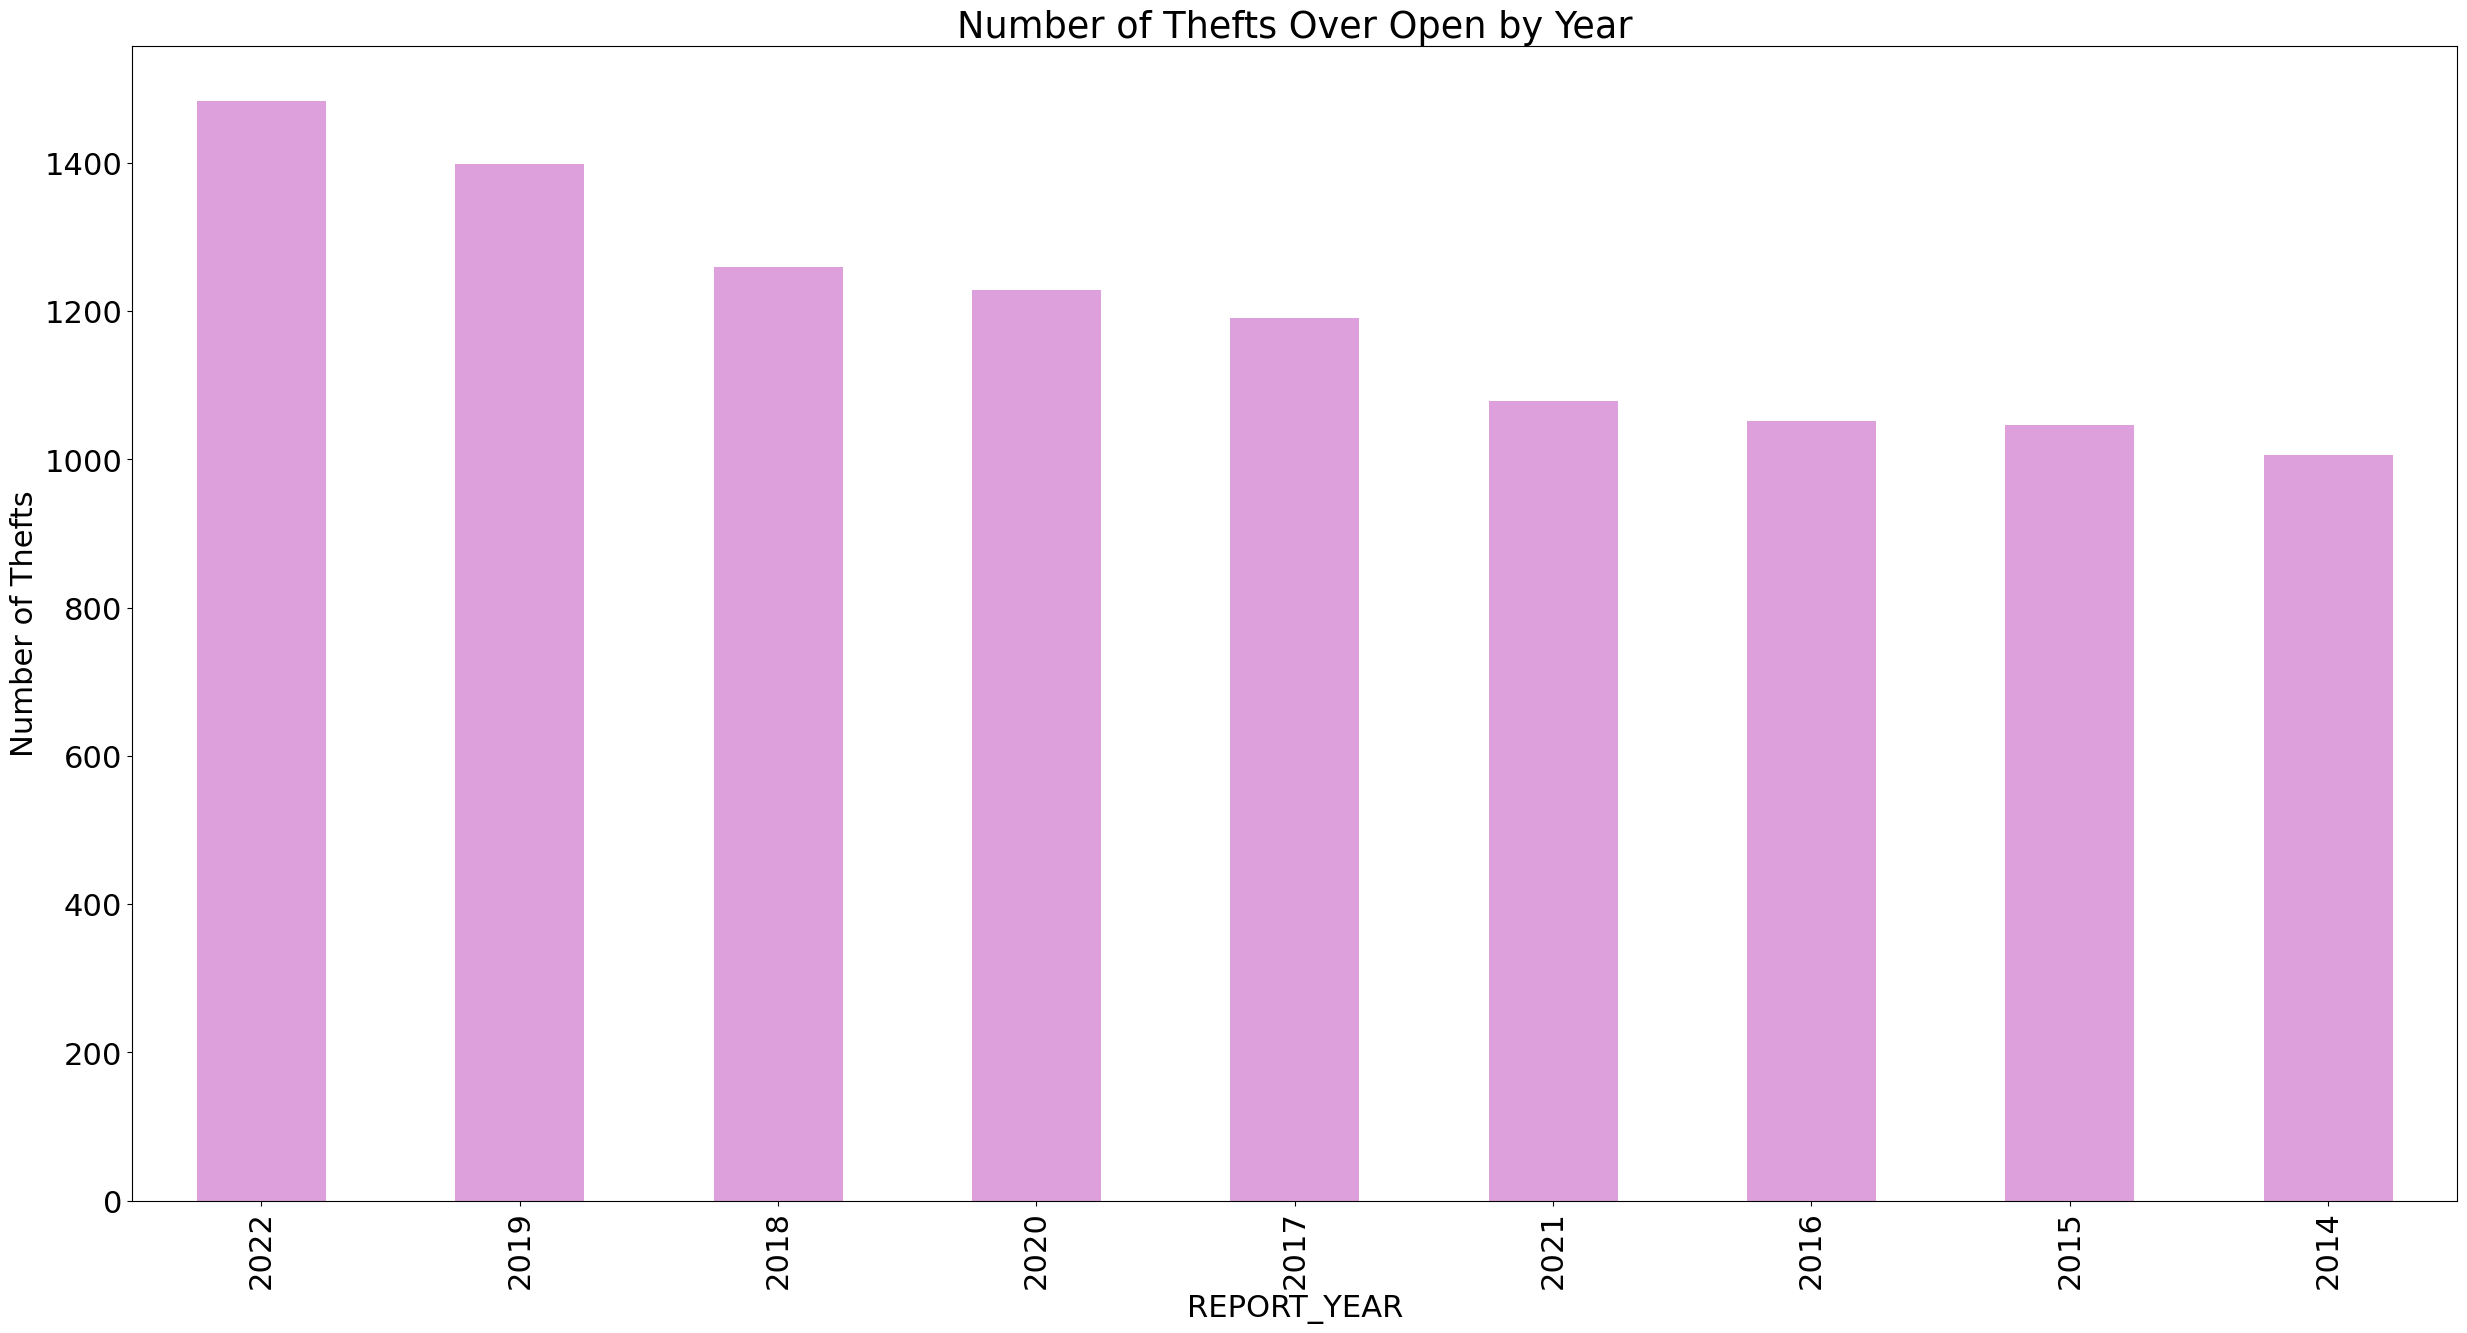

In [56]:
plot_pandas27 = theft_year_count.plot.bar(color='plum')  
plt.xlabel("REPORT_YEAR")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Year")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [57]:
# Generate a bar plot showing the total number of thefts by Neighbourhood Code
theft_hood_count = theft_over_open_metadata["NEIGHBOURHOOD_140"].value_counts()
theft_hood_count

Waterfront Communities-The Island (77)    506
West Humber-Clairville (1)                486
Bay Street Corridor (76)                  448
Islington-City Centre West (14)           360
York University Heights (27)              355
                                         ... 
Morningside (135)                          17
Broadview North (57)                       17
Elms-Old Rexdale (5)                       14
Guildwood (140)                            13
Lambton Baby Point (114)                   11
Name: NEIGHBOURHOOD_140, Length: 141, dtype: int64

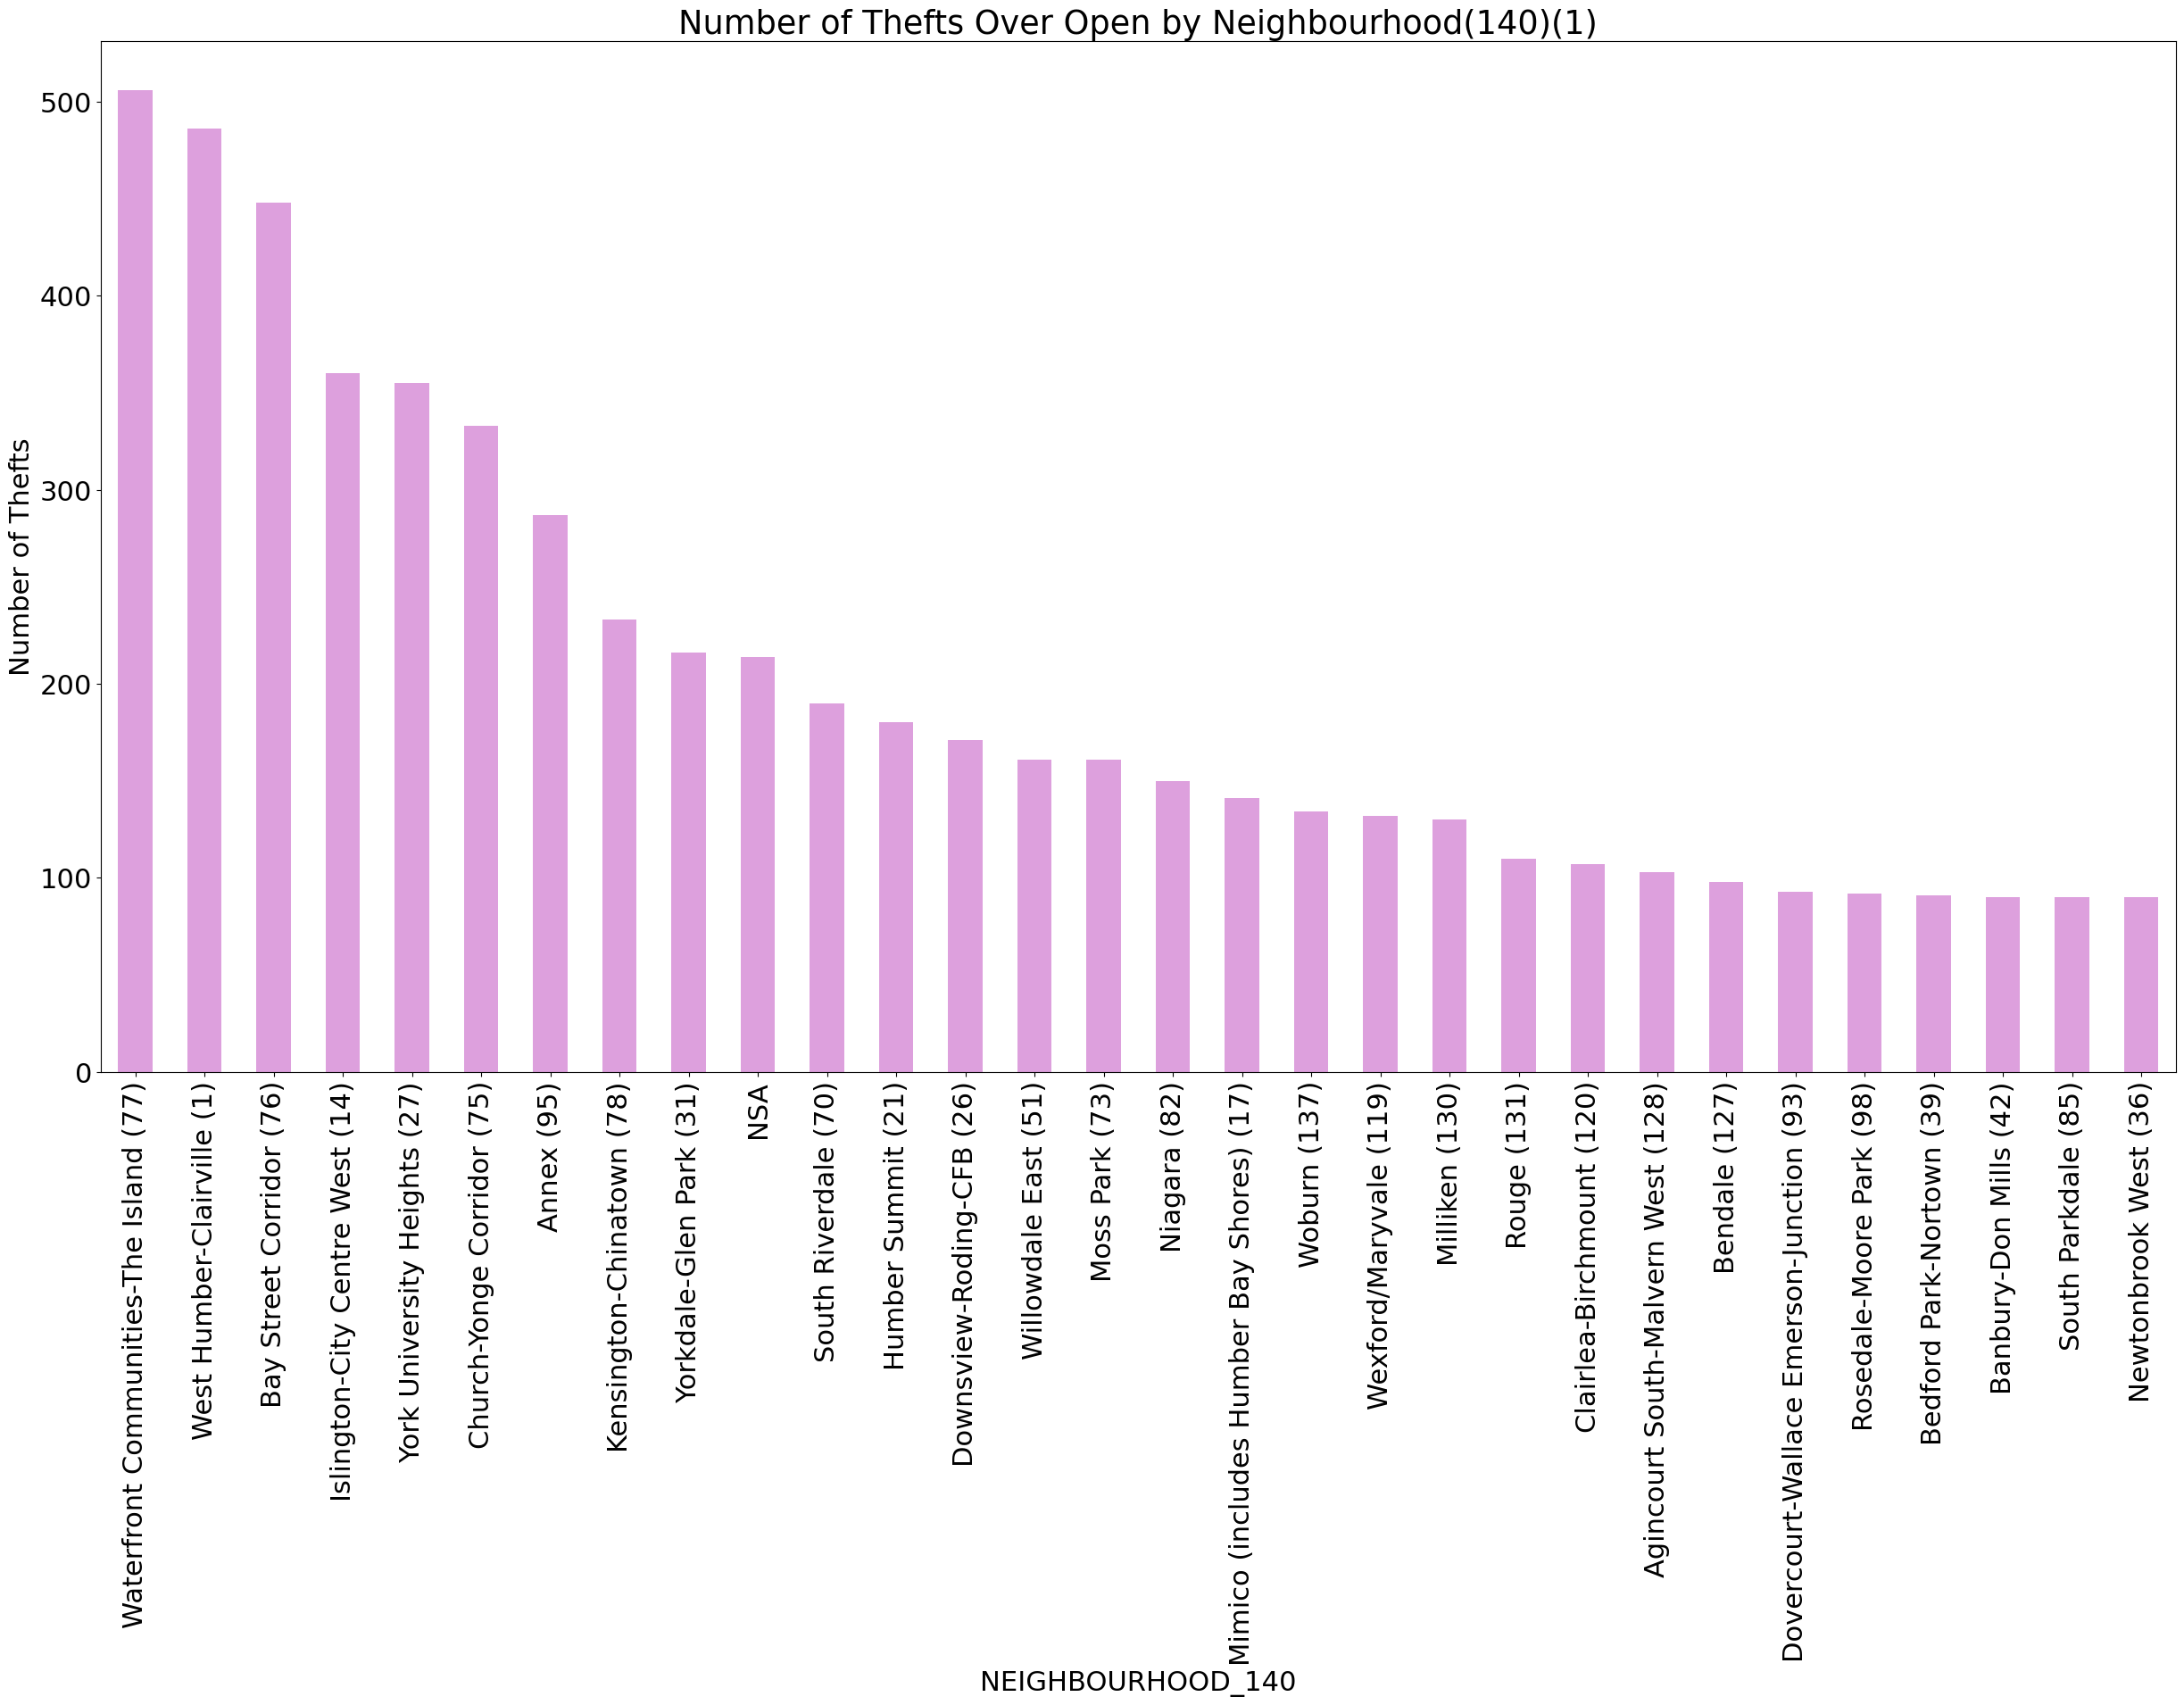

In [58]:
plot_pandas28 = theft_hood_count[0:30].plot.bar(color='plum')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Neighbourhood(140)(1)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

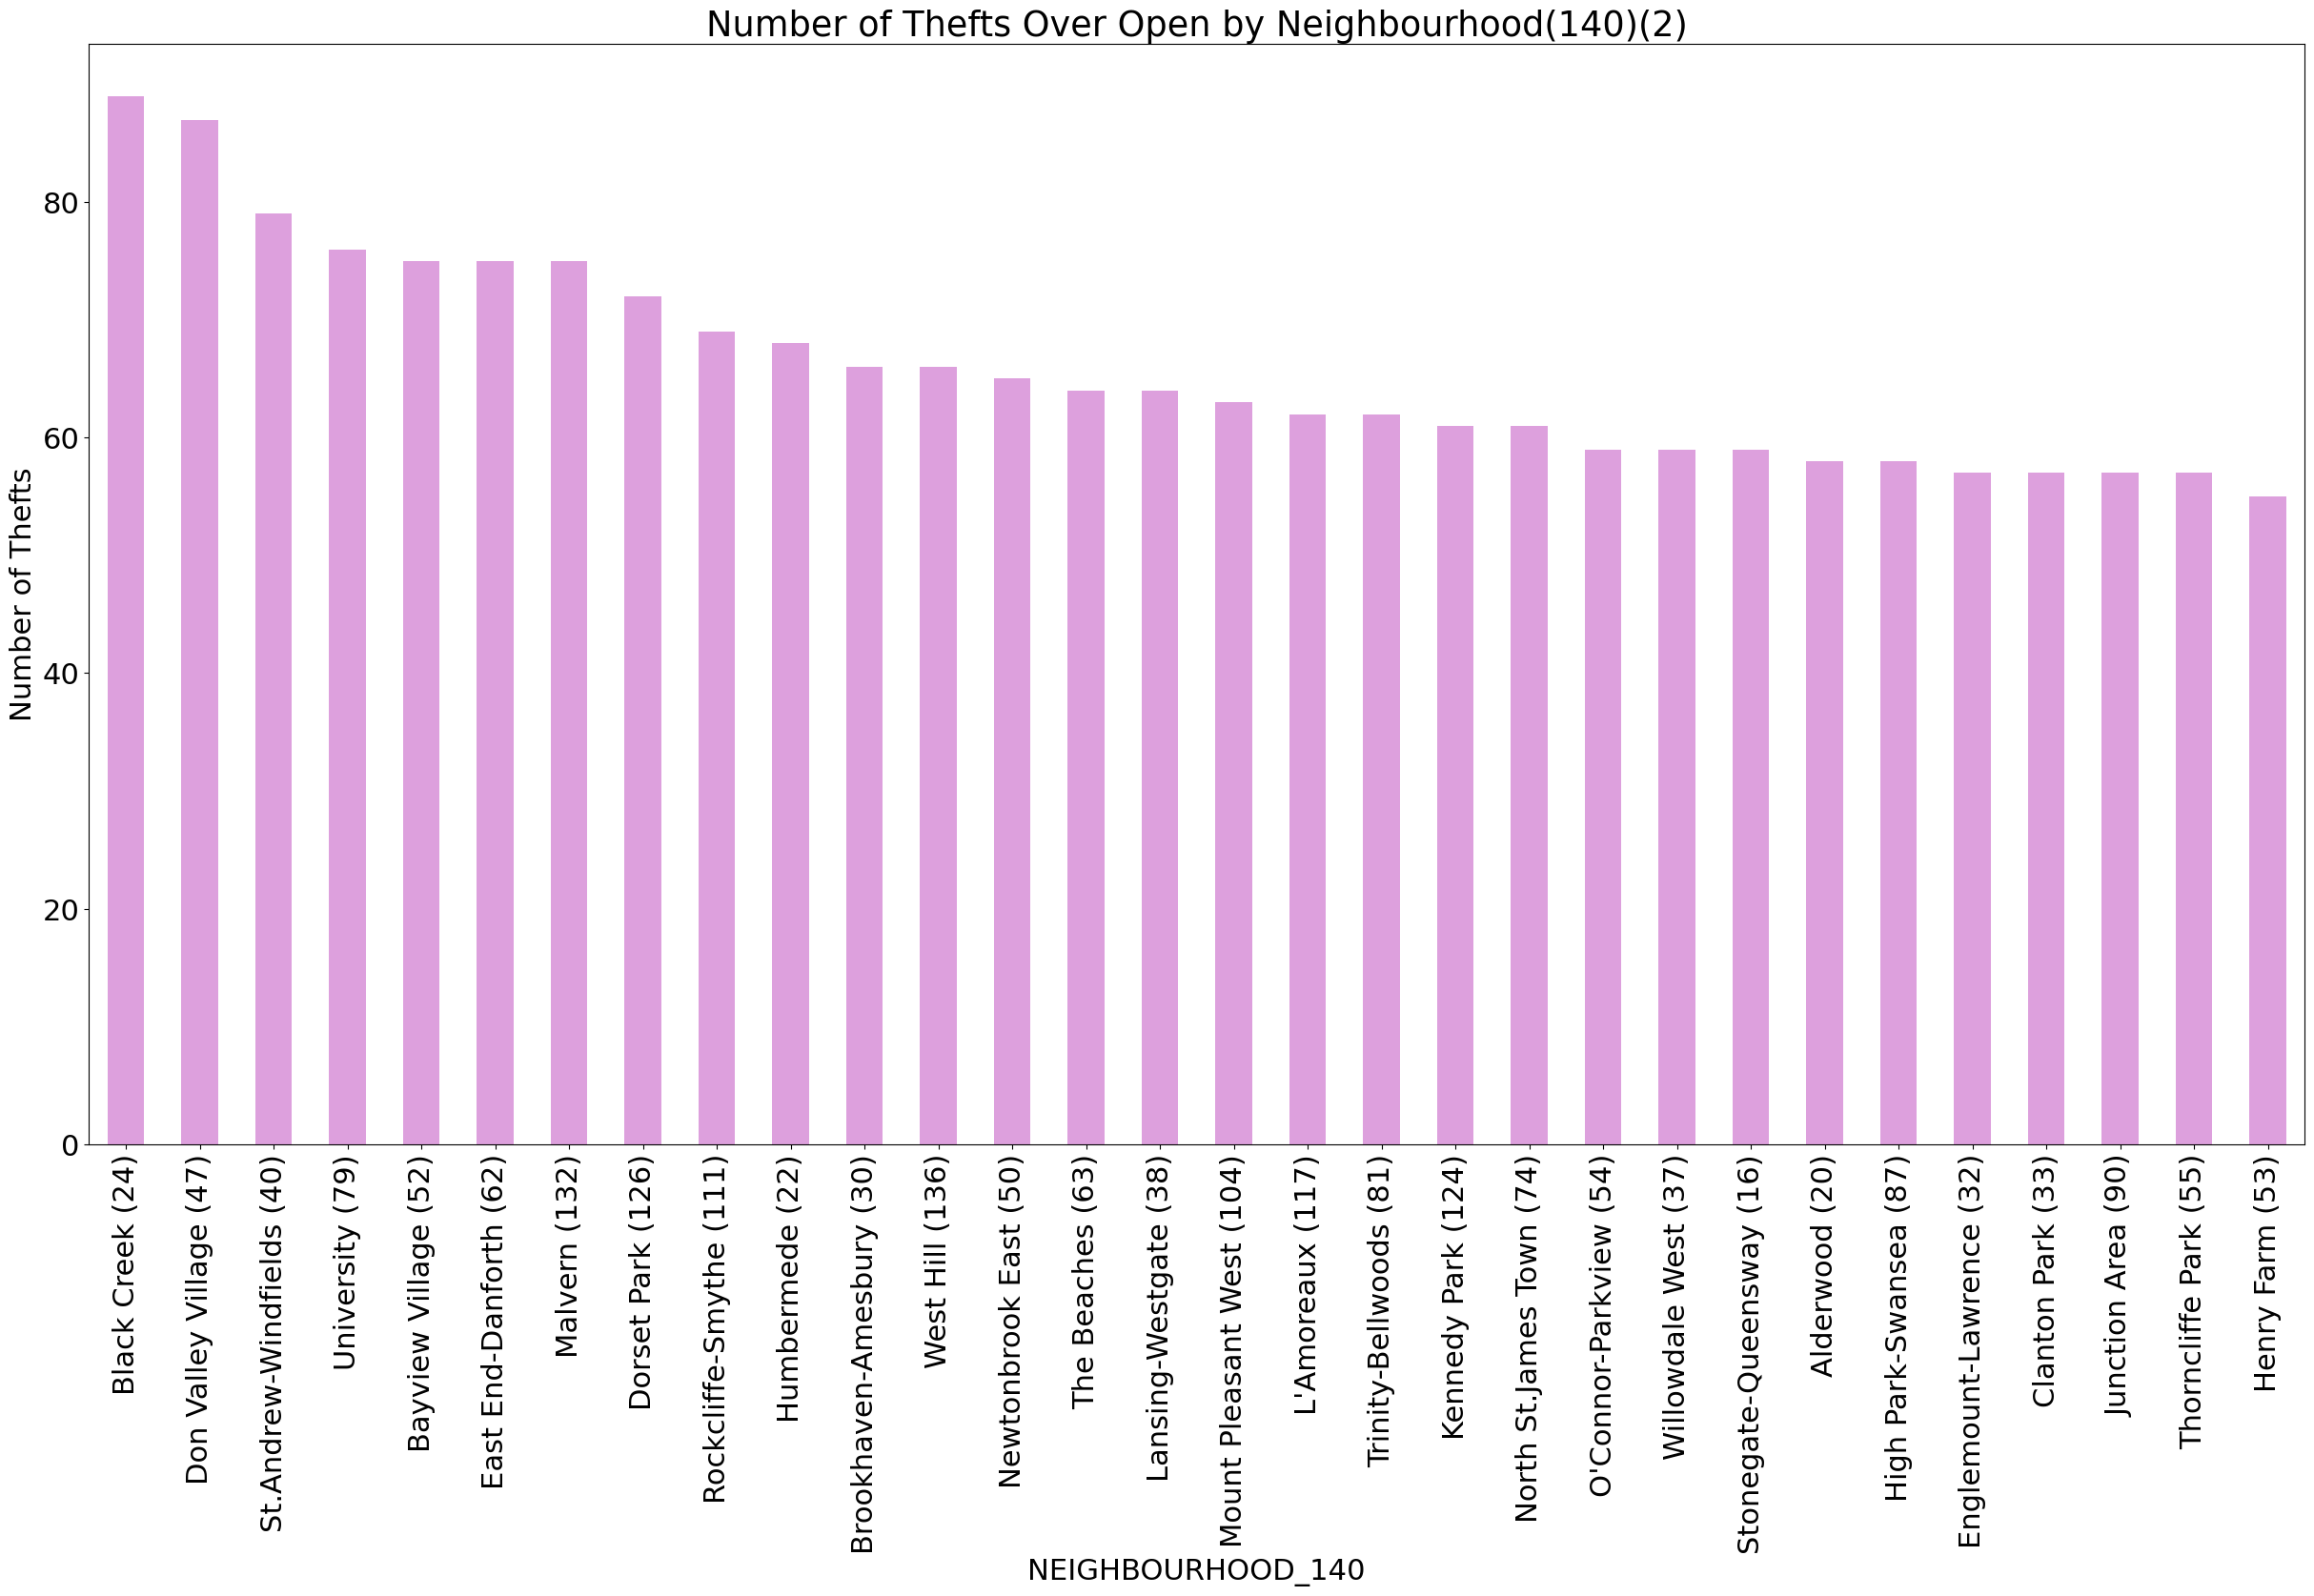

In [59]:
plot_pandas29 = theft_hood_count[31:61].plot.bar(color='plum')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Neighbourhood(140)(2)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

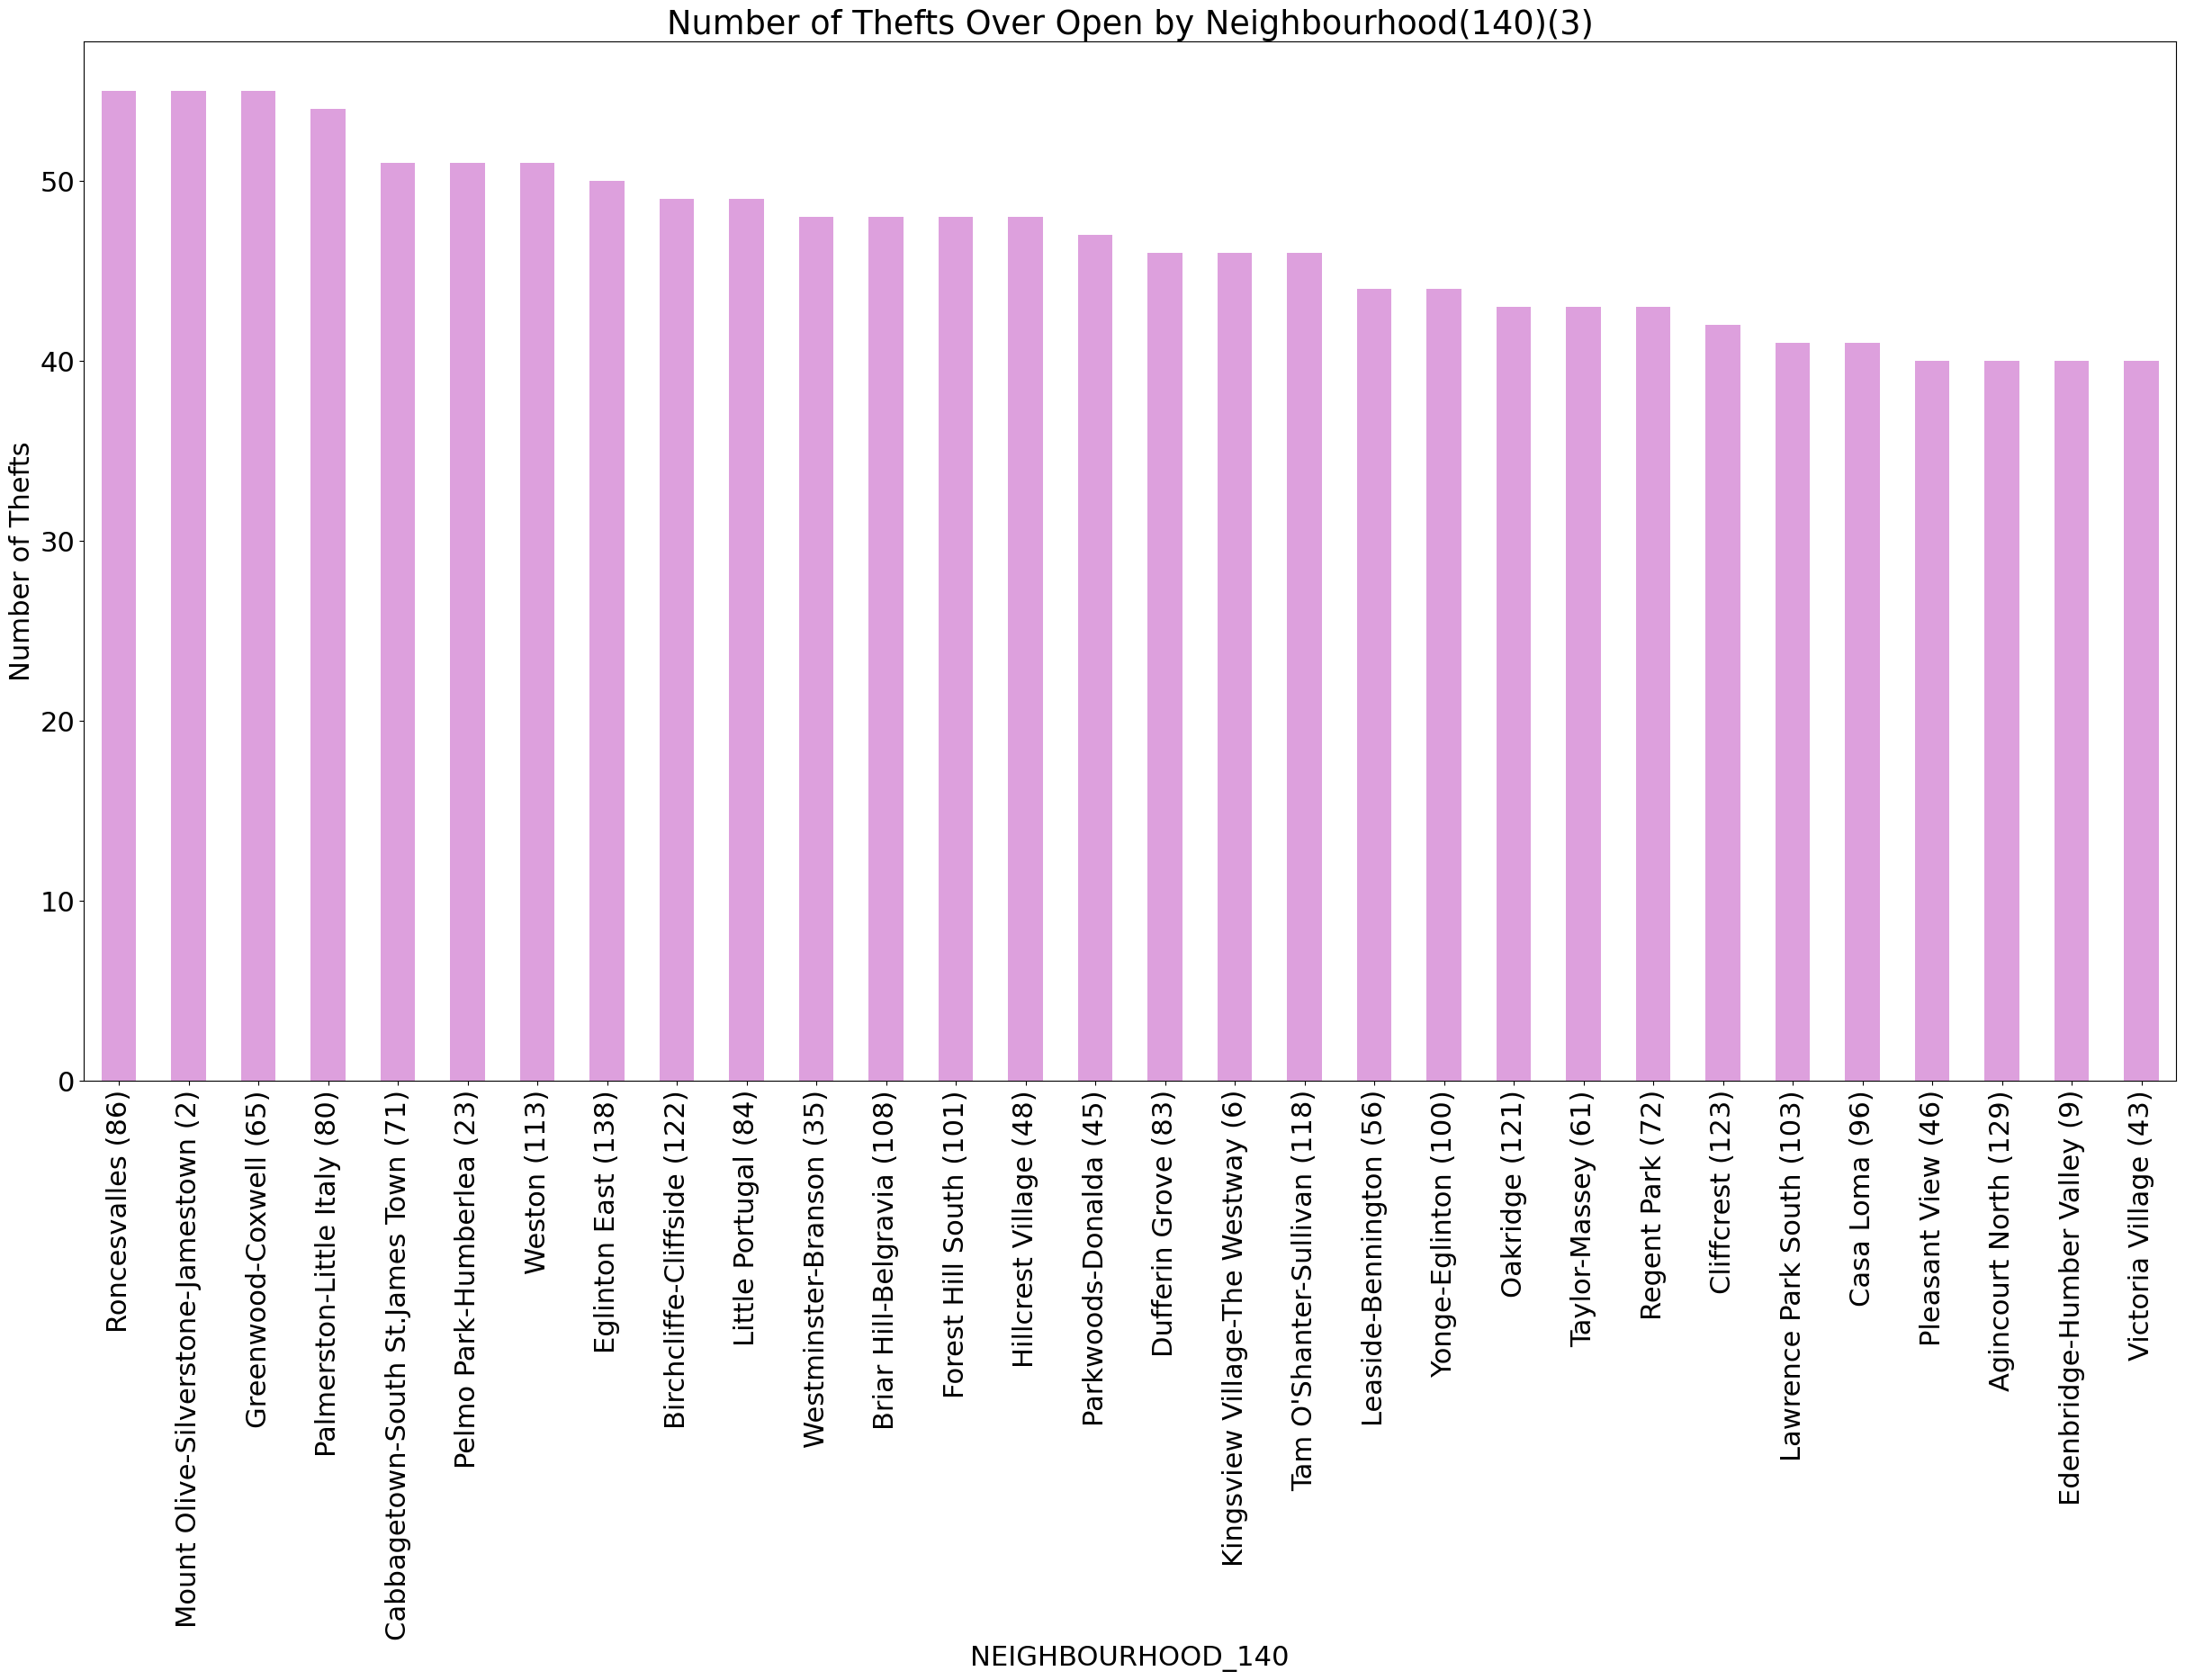

In [60]:
plot_pandas30 = theft_hood_count[61:91].plot.bar(color='plum')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Neighbourhood(140)(3)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

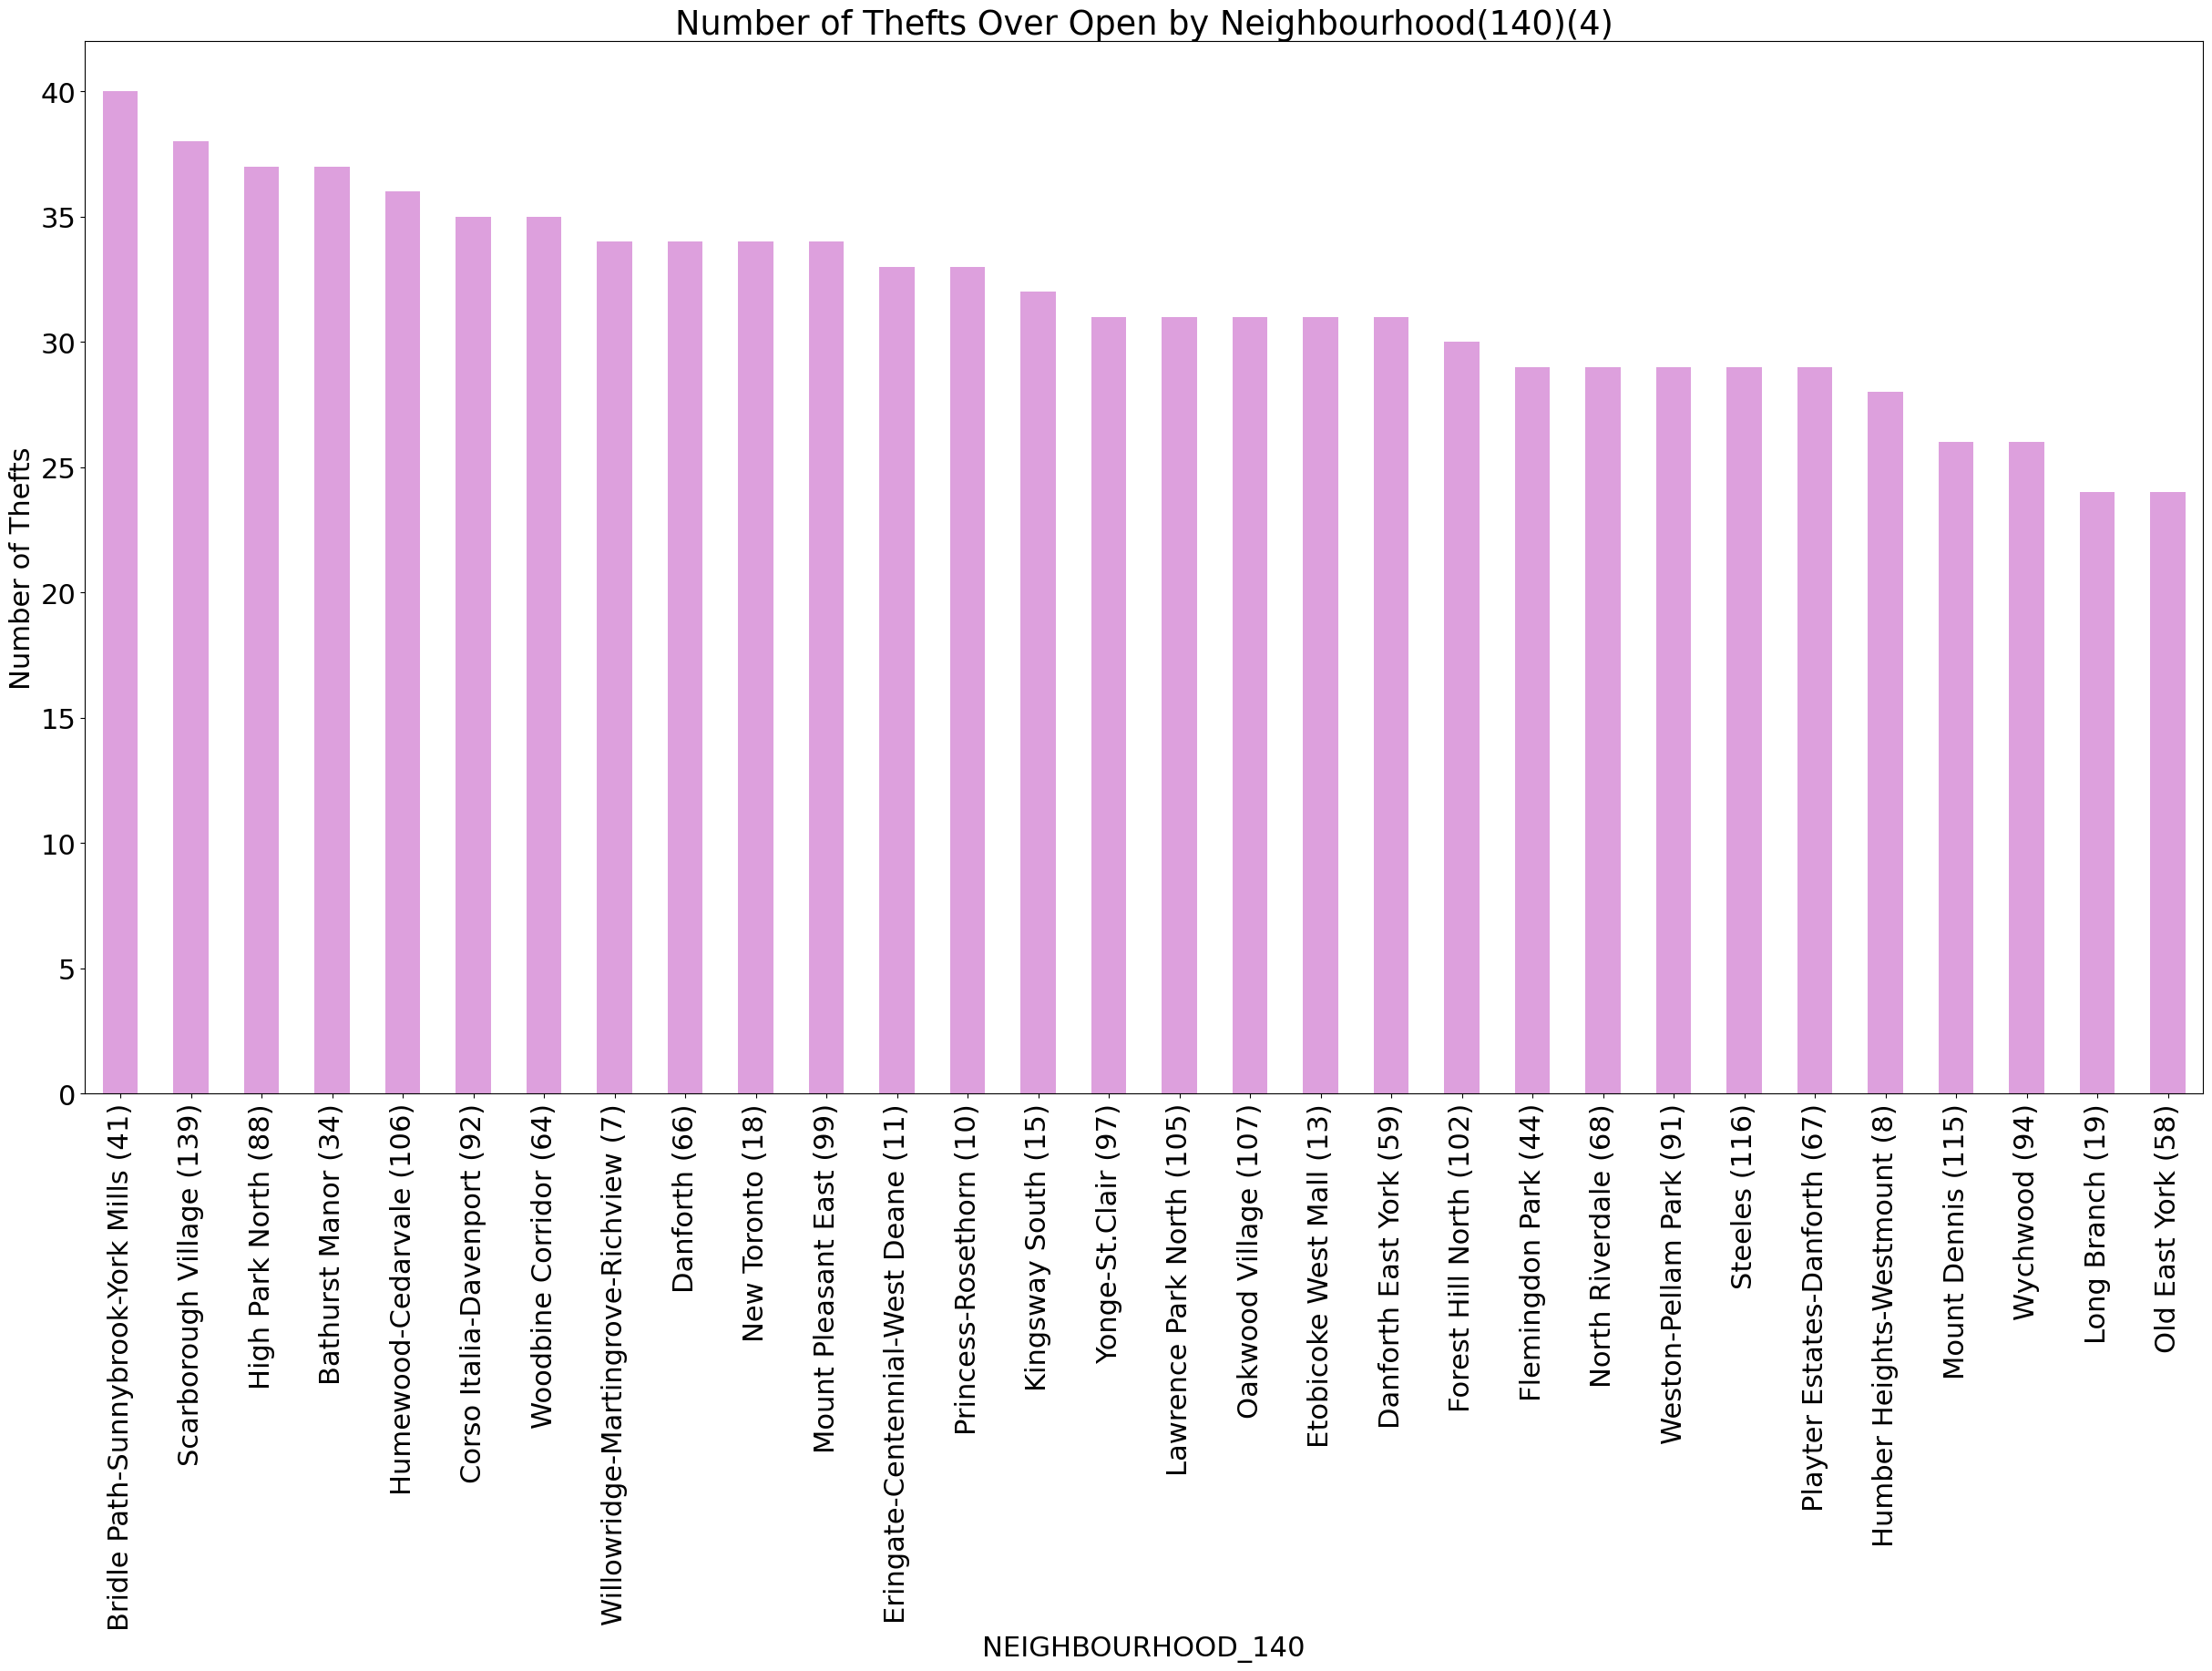

In [61]:
plot_pandas31 = theft_hood_count[91:121].plot.bar(color='plum')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Neighbourhood(140)(4)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

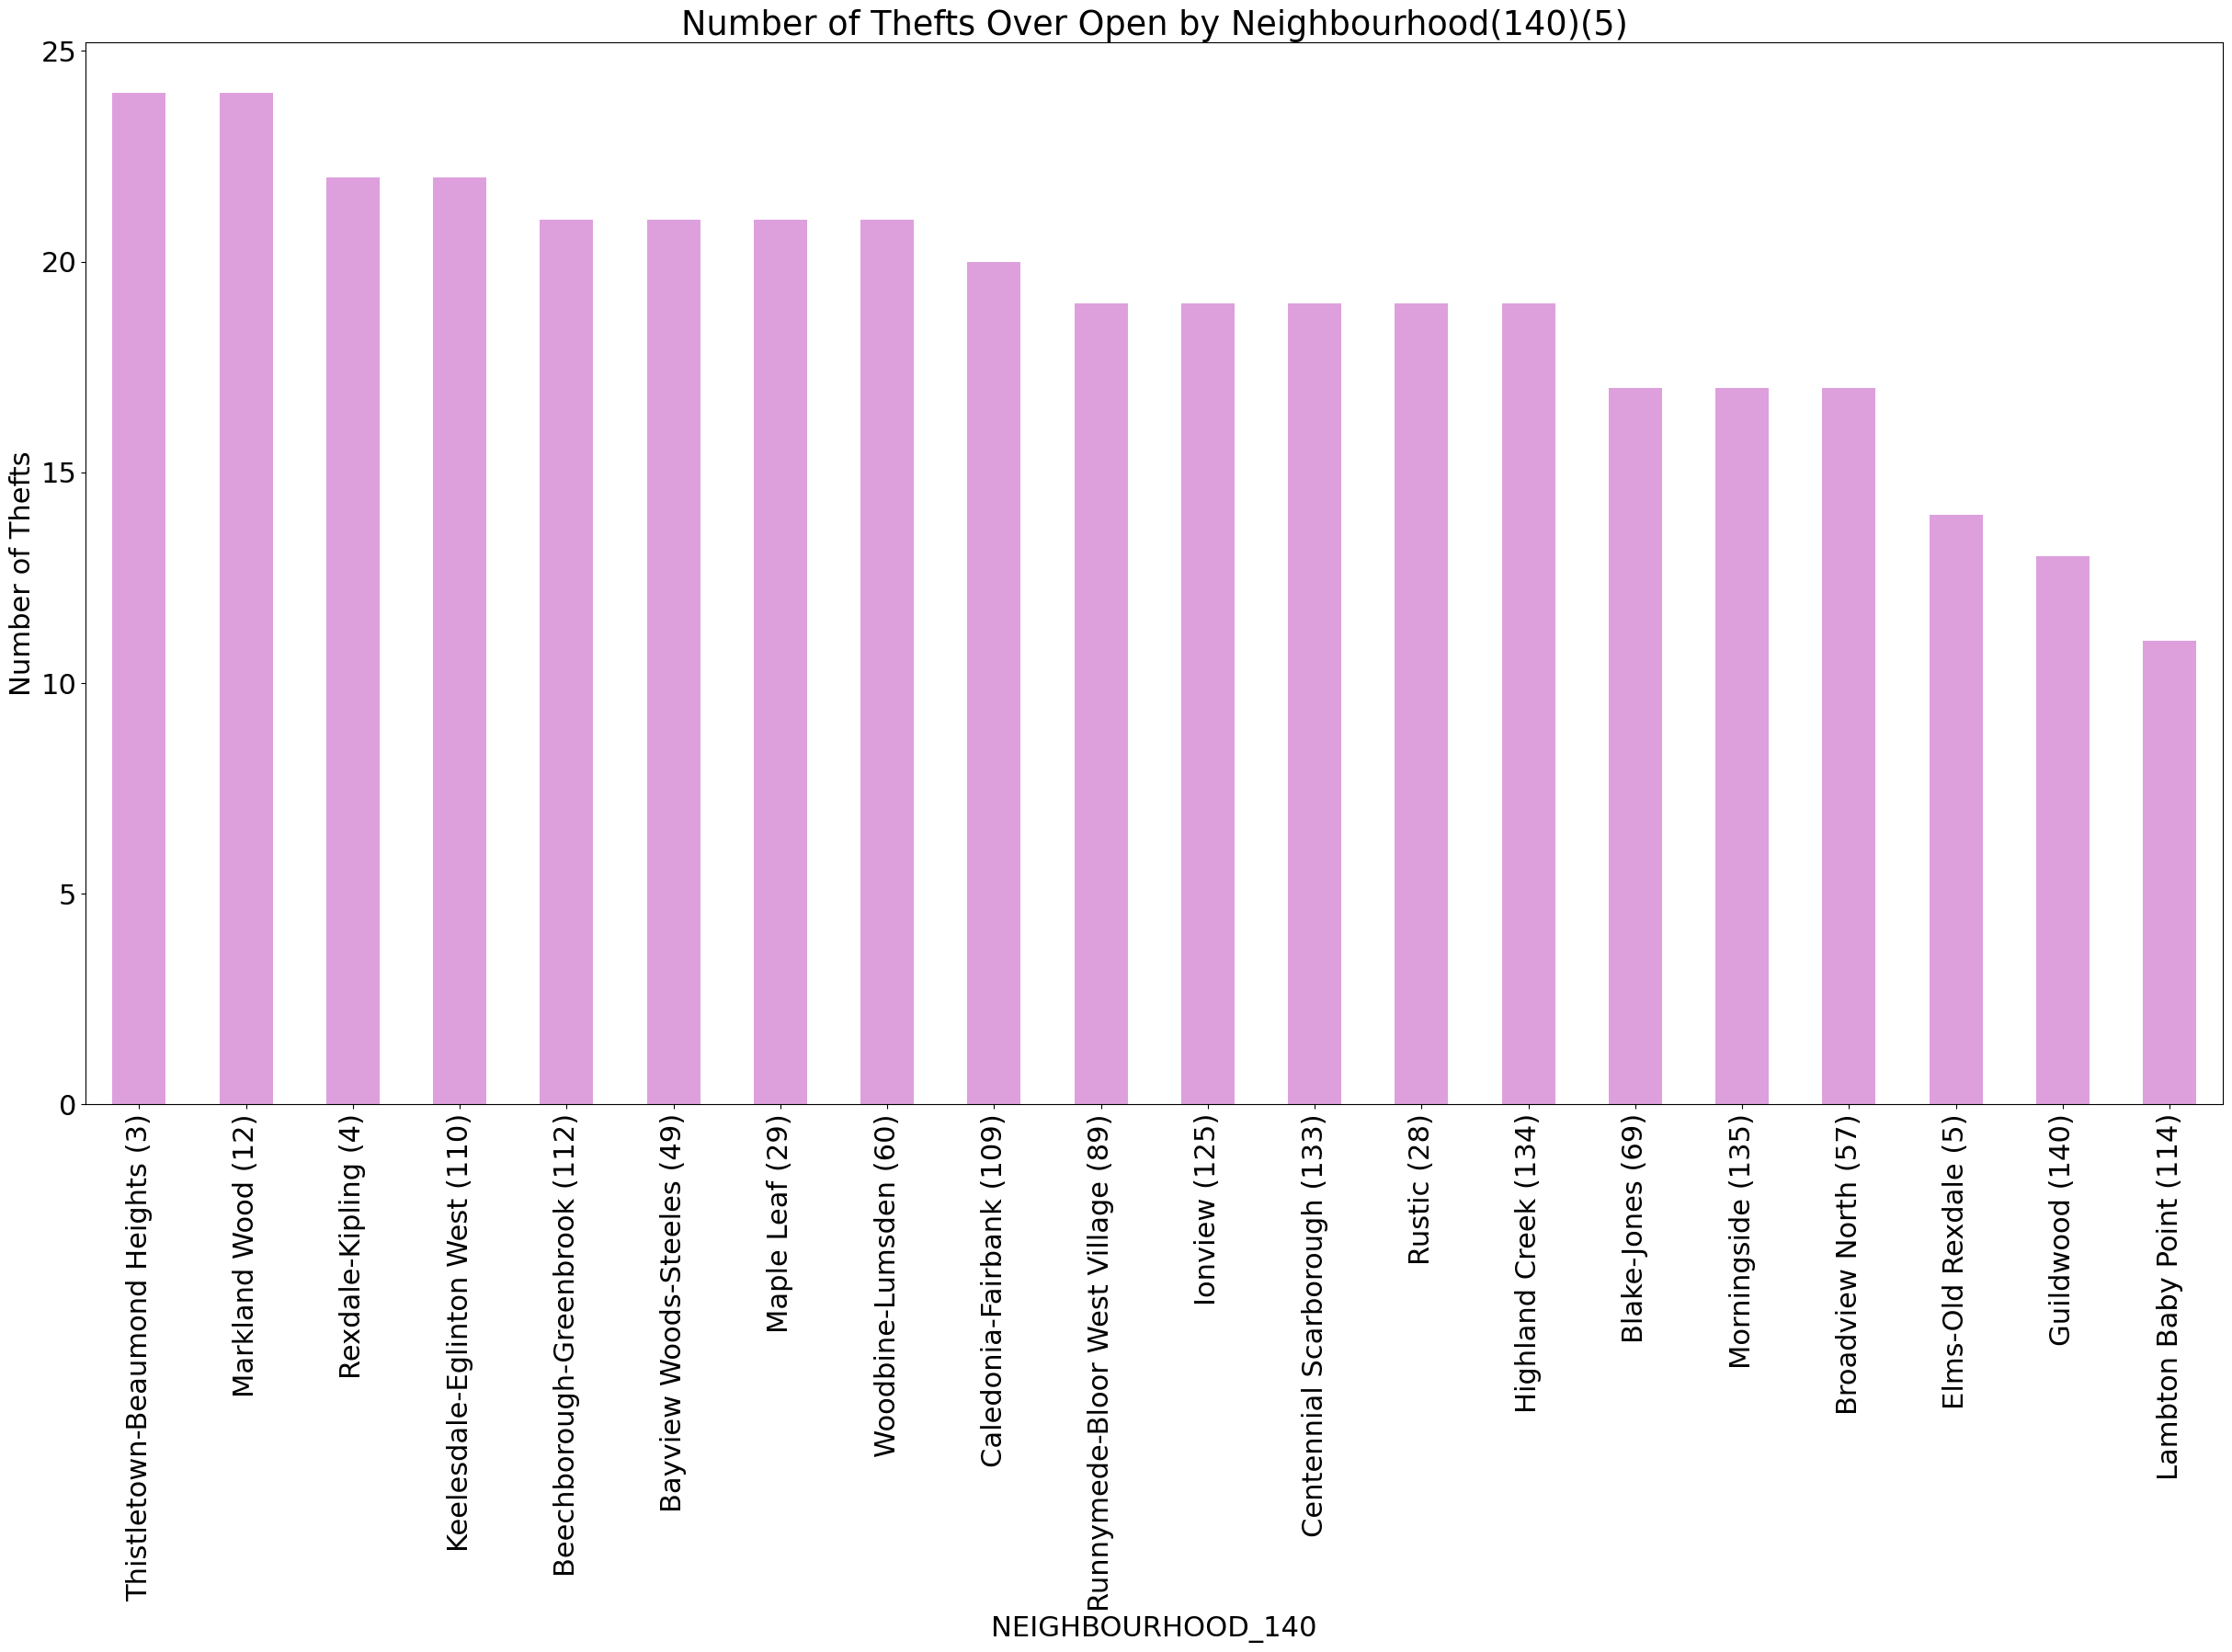

In [62]:
plot_pandas32 = theft_hood_count[121:141].plot.bar(color='plum')  
plt.xlabel("NEIGHBOURHOOD_140")
plt.ylabel("Number of Thefts")
plt.title("Number of Thefts Over Open by Neighbourhood(140)(5)")
plt.rcParams["figure.figsize"] = (30, 15)
plt.rcParams.update({'font.size': 22})

In [57]:
assault_metadata_sorted = pd.DataFrame().assign(Report_Year=assault_metadata['REPORT_YEAR'], Report_Month=assault_metadata['REPORT_MONTH'], Offence=assault_metadata['OFFENCE'], Neighbourhood=assault_metadata['NEIGHBOURHOOD_140'])
print(assault_metadata_sorted)

        Report_Year Report_Month                      Offence  \
0              2014      January  Administering Noxious Thing   
1              2014      January                      Assault   
2              2014      January                      Assault   
3              2014      January          Assault Bodily Harm   
4              2014      January                      Assault   
...             ...          ...                          ...   
173233         2022     December                      Assault   
173234         2022     December                      Assault   
173235         2022     December                      Assault   
173236         2022     December                      Assault   
173237         2022     December                      Assault   

                                 Neighbourhood  
0                        Lansing-Westgate (38)  
1                     North St.James Town (74)  
2                                Danforth (66)  
3       Waterfront Comm

In [58]:
assault_new_df = assault_metadata[['REPORT_YEAR', 'REPORT_MONTH', 'OFFENCE', 'NEIGHBOURHOOD_140']]
assault_new_df

REPORT_YEAR REPORT_MONTH                      OFFENCE  \
0              2014      January  Administering Noxious Thing   
1              2014      January                      Assault   
2              2014      January                      Assault   
3              2014      January          Assault Bodily Harm   
4              2014      January                      Assault   
...             ...          ...                          ...   
173233         2022     December                      Assault   
173234         2022     December                      Assault   
173235         2022     December                      Assault   
173236         2022     December                      Assault   
173237         2022     December                      Assault   

                             NEIGHBOURHOOD_140  
0                        Lansing-Westgate (38)  
1                     North St.James Town (74)  
2                                Danforth (66)  
3       Waterfront Communities-The Island (77)  
4                                          NSA  
...                                        ...  
173233                    Willowdale East (51)  
173234                  Parkwoods-Donalda (45)  
173235          Keelesdale-Eglinton West (110)  
173236                 Forest Hill North (102)  
173237                Rosedale-Moore Park (98)  

[173238 rows x 4 columns]

In [63]:
break_enter_metadata_sorted = pd.DataFrame().assign(Report_Year=break_and_enter_metadata['REPORT_YEAR'], Report_Month=break_and_enter_metadata['REPORT_MONTH'], Offence=break_and_enter_metadata['OFFENCE'], Neighbourhood=break_and_enter_metadata['NEIGHBOURHOOD_140'])
print(break_enter_metadata_sorted)

       Report_Year Report_Month                       Offence  \
0             2014      January                           B&E   
1             2014      January                  B&E W'Intent   
2             2014      January                  B&E W'Intent   
3             2014      January                           B&E   
4             2014      January                           B&E   
...            ...          ...                           ...   
62522         2022     December  Unlawfully In Dwelling-House   
62523         2022     December                  B&E W'Intent   
62524         2022     December                  B&E W'Intent   
62525         2022     December                           B&E   
62526         2022     December                           B&E   

                Neighbourhood  
0        South Riverdale (70)  
1           Dorset Park (126)  
2             West Hill (136)  
3      Trinity-Bellwoods (81)  
4       Newtonbrook West (36)  
...                       .

In [64]:
break_enter_new_df = break_and_enter_metadata[['REPORT_YEAR', 'REPORT_MONTH', 'OFFENCE', 'NEIGHBOURHOOD_140']]
break_enter_new_df

REPORT_YEAR REPORT_MONTH                       OFFENCE  \
0             2014      January                           B&E   
1             2014      January                  B&E W'Intent   
2             2014      January                  B&E W'Intent   
3             2014      January                           B&E   
4             2014      January                           B&E   
...            ...          ...                           ...   
62522         2022     December  Unlawfully In Dwelling-House   
62523         2022     December                  B&E W'Intent   
62524         2022     December                  B&E W'Intent   
62525         2022     December                           B&E   
62526         2022     December                           B&E   

            NEIGHBOURHOOD_140  
0        South Riverdale (70)  
1           Dorset Park (126)  
2             West Hill (136)  
3      Trinity-Bellwoods (81)  
4       Newtonbrook West (36)  
...                       ...  
62522  Parkwoods-Donalda (45)  
62523    South Riverdale (70)  
62524  Wexford/Maryvale (119)  
62525          Milliken (130)  
62526     Eglinton East (138)  

[62527 rows x 4 columns]

In [65]:
robbery_metadata_sorted = pd.DataFrame().assign(Report_Year=robbery_metadata['REPORT_YEAR'], Report_Month=robbery_metadata['REPORT_MONTH'], Offence=robbery_metadata['OFFENCE'], Neighbourhood=robbery_metadata['NEIGHBOURHOOD_140'])
print(robbery_metadata_sorted)

       Report_Year Report_Month                  Offence  \
0             2014      January        Robbery - Mugging   
1             2014      January      Robbery With Weapon   
2             2014      January   Robbery - Purse Snatch   
3             2014      January       Robbery - Business   
4             2014      January       Robbery - Swarming   
...            ...          ...                      ...   
30733         2022     December  Robbery - Home Invasion   
30734         2022     December       Robbery - Business   
30735         2022     December      Robbery With Weapon   
30736         2022     December       Robbery - Business   
30737         2022     December          Robbery - Other   

                     Neighbourhood  
0                              NSA  
1        Kensington-Chinatown (78)  
2                     Weston (113)  
3       Church-Yonge Corridor (75)  
4                              NSA  
...                            ...  
30733   Briar Hill-B

In [66]:
robbery_new_df = robbery_metadata[['REPORT_YEAR', 'REPORT_MONTH', 'OFFENCE', 'NEIGHBOURHOOD_140']]
robbery_new_df

REPORT_YEAR REPORT_MONTH                  OFFENCE  \
0             2014      January        Robbery - Mugging   
1             2014      January      Robbery With Weapon   
2             2014      January   Robbery - Purse Snatch   
3             2014      January       Robbery - Business   
4             2014      January       Robbery - Swarming   
...            ...          ...                      ...   
30733         2022     December  Robbery - Home Invasion   
30734         2022     December       Robbery - Business   
30735         2022     December      Robbery With Weapon   
30736         2022     December       Robbery - Business   
30737         2022     December          Robbery - Other   

                 NEIGHBOURHOOD_140  
0                              NSA  
1        Kensington-Chinatown (78)  
2                     Weston (113)  
3       Church-Yonge Corridor (75)  
4                              NSA  
...                            ...  
30733   Briar Hill-Belgravia (108)  
30734      Rockcliffe-Smythe (111)  
30735  Corso Italia-Davenport (92)  
30736      Rockcliffe-Smythe (111)  
30737         Little Portugal (84)  

[30738 rows x 4 columns]

In [67]:
theft_metadata_sorted = pd.DataFrame().assign(Report_Year=theft_over_open_metadata['REPORT_YEAR'], Report_Month=theft_over_open_metadata['REPORT_MONTH'], Offence=theft_over_open_metadata['OFFENCE'], Neighbourhood=theft_over_open_metadata['NEIGHBOURHOOD_140'])
print(theft_metadata_sorted)

       Report_Year Report_Month                        Offence  \
0             2014      January                     Theft Over   
1             2014      January                     Theft Over   
2             2014      January                     Theft Over   
3             2014      January                     Theft Over   
4             2014      January                     Theft Over   
...            ...          ...                            ...   
10740         2022     December                     Theft Over   
10741         2022     December  Theft From Motor Vehicle Over   
10742         2022     December  Theft From Motor Vehicle Over   
10743         2022     December  Theft From Motor Vehicle Over   
10744         2022     December                     Theft Over   

                   Neighbourhood  
0                            NSA  
1                  Bendale (127)  
2           Willowdale East (51)  
3           South Riverdale (70)  
4        Don Valley Village (47)

In [68]:
theft_new_df = theft_over_open_metadata[['REPORT_YEAR', 'REPORT_MONTH', 'OFFENCE', 'NEIGHBOURHOOD_140']]
theft_new_df

REPORT_YEAR REPORT_MONTH                        OFFENCE  \
0             2014      January                     Theft Over   
1             2014      January                     Theft Over   
2             2014      January                     Theft Over   
3             2014      January                     Theft Over   
4             2014      January                     Theft Over   
...            ...          ...                            ...   
10740         2022     December                     Theft Over   
10741         2022     December  Theft From Motor Vehicle Over   
10742         2022     December  Theft From Motor Vehicle Over   
10743         2022     December  Theft From Motor Vehicle Over   
10744         2022     December                     Theft Over   

               NEIGHBOURHOOD_140  
0                            NSA  
1                  Bendale (127)  
2           Willowdale East (51)  
3           South Riverdale (70)  
4        Don Valley Village (47)  
...                          ...  
10740  Pelmo Park-Humberlea (23)  
10741                 Annex (95)  
10742      Lansing-Westgate (38)  
10743      Newtonbrook East (50)  
10744              Bendale (127)  

[10745 rows x 4 columns]

In [ ]:
## Work in Progress

In [73]:
assault_and_break_enter_df = pd.merge(assault_new_df,break_enter_new_df, how="left", on = ("NEIGHBOURHOOD_140"))

In [74]:
assault_and_break_enter_df.head

REPORT_YEAR_x REPORT_MONTH_x                    OFFENCE_x  \
0                   2014        January  Administering Noxious Thing   
1                   2014        January  Administering Noxious Thing   
2                   2014        January  Administering Noxious Thing   
3                   2014        January  Administering Noxious Thing   
4                   2014        January  Administering Noxious Thing   
...                  ...            ...                          ...   
125676843           2022       December                      Assault   
125676844           2022       December                      Assault   
125676845           2022       December                      Assault   
125676846           2022       December                      Assault   
125676847           2022       December                      Assault   

                  NEIGHBOURHOOD_140  REPORT_YEAR_y REPORT_MONTH_y OFFENCE_y  
0             Lansing-Westgate (38)           2014        January       B&E  
1             Lansing-Westgate (38)           2014        January       B&E  
2             Lansing-Westgate (38)           2014        January       B&E  
3             Lansing-Westgate (38)           2014        January       B&E  
4             Lansing-Westgate (38)           2014        January       B&E  
...                             ...            ...            ...       ...  
125676843  Rosedale-Moore Park (98)           2022       December       B&E  
125676844  Rosedale-Moore Park (98)           2022       December       B&E  
125676845  Rosedale-Moore Park (98)           2022       December       B&E  
125676846  Rosedale-Moore Park (98)           2022       December       B&E  
125676847  Rosedale-Moore Park (98)           2022       December       B&E  

[125676848 rows x 7 columns]

In [ ]:
## **Find a way to merge all 4 dataframes to compare crime type prevelence per year/month/neighbourhood**